# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import random
import pandas as pd
import csv
from scipy import interpolate
#import Utilities


# Statistics and utility functions

In [2]:
def poisson_dist(k, rate):
    return (rate**k)/np.math.factorial(k) * np.exp(-rate)

def poisson_process(t, n, rate):
        return (rate*t)**n/np.math.factorial(n) * np.exp(-rate*t)

def local_variation(I):
    n = len(I)
    sum = 0
    for i in range(0, n-1):
        sum += ((I[i]-I[i+1])/(I[i]+I[i+1]))**2
    return 3/(n-1)*sum

def LVR(I, R):
    n = len(I)
    sum = 0
    for i in range(0, n-1):
        sum += (1 - (4*I[i]*I[i+1])/(I[i]+I[i+1])**2)*(1 + (4*R)/(I[i]+I[i+1]))
    return 3/(n-1)*sum

def generate_timings(I):
    sum = 0
    timings = []
    for i in I:
        sum += i
        timings.append(sum)
        if (sum >= 10):
            break
    return timings

#T is a list of spike timings.
def generate_ISI(T):
    ISI = []
    for i in range (0, len(T)-1):
        ISI.append(T[i+1]-T[i])
    return ISI
    
#Here, I is an ordered list of inter-spike intervals.
# use R = 5ms
def print_stats(I):
    print(f'Local Variation: {local_variation(I)}\nLvR: {LVR(I,.005)}\nMean: {np.mean(I)}\n'
          +f'Variance: {np.var(I)}\nStandard Deviation: {np.std(I)}')

def reorder(I_1):
    I_new = []
    for i in range(0, int(len(I_1)/2)):
        I_new.append(I_1[i])
        I_new.append(I_1[-(i+1)])
    return I_new

def reorder_2(I):
    I_new = []
    x = int(len(I)/2)
    for i in range(0, x):
        x
    

# Utility Functions and File Management

In [3]:
#create an event graph of timing sequence.
def graph_timings(T):
    figure, graph = plt.subplots()
    graph.eventplot(T, orientation="horizontal", linewidth=0.75, linelengths = 0.5, lineoffsets = 0)
    graph.axes.get_yaxis().set_visible(False)
    plt.xlabel('time (s)')
    plt.show()

#export timing to file
def export_timing(T, file_name):
    output_file = open('./timing_output/'+file_name+'.txt', "w")
    np.savetxt(output_file, T, fmt = "%.16f")
    output_file.close()
    return True

#export ISI array to file
def export_ISI(I, file_name):
    output_file = open('./ISI_output/'+file_name+'.txt', "w")
    np.savetxt(output_file, I, fmt = "%.16f")
    output_file.close()
    return True

# Data Input -- Experiment 2/25/2022


# Poisson spiking

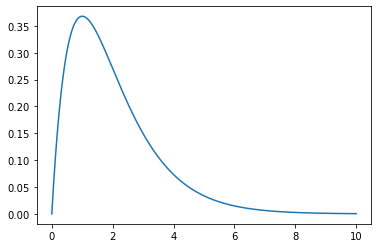

In [4]:
rate = 1
t = np.linspace(0, 10, 1000)
#sample from this -- hopefully there's a 
vals = poisson_process(t, 1, rate)
fig, graph = plt.subplots()
for k in range (1, 2):
    vals = poisson_process(t, k, rate)
    graph.plot(t, vals)
plt.show()

kList = np.linspace(1, 20, 20)
vals = []
for k in range(1,21):
    vals.append(poisson_dist(k, rate))

#graph.plot(kList, vals)
    
#plt.show()


# Evaluating existing timings

# Generating spike intervals from distribution

Local Variation: 0.5859100129450191
LvR: 0.6307723743230762
Mean: 0.2067915768087724
Variance: 0.018991560957672085
Standard Deviation: 0.1378098724971186


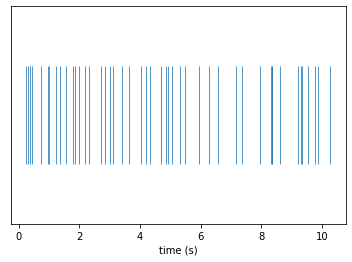

Local Variation: 0.862877569863413
LvR: 0.8997119130669957
Mean: 0.20679157680877236
Variance: 0.018991560957672085
Standard Deviation: 0.1378098724971186


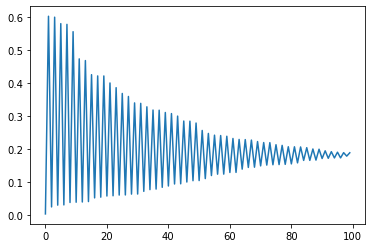

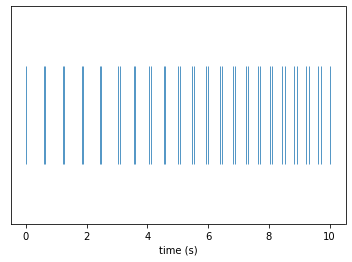

[0.0029546583040277463, 0.6065206717197307, 0.6307521299222365, 1.2314866593254883, 1.261104957045104, 1.8422501804089393, 1.8725953890714946, 2.451476395906919, 2.4891769346090333, 3.0458320742772935, 3.0842849981686165, 3.558361540954194, 3.597511365763582, 4.066430328567193, 4.1068833313358395, 4.532911856969344, 4.584543798856083, 5.006818393100016, 5.060654866963232, 5.482783588568441, 5.540099936910983, 5.940909341325281, 5.998992774864929, 6.385518086978275, 6.445712920470137, 6.814695387793082, 6.87526653185682, 7.235098886193736, 7.2982386864975055, 7.638490597421547, 7.701841969683576, 8.040758606937889, 8.112257182468277, 8.440636662602618, 8.517366173500836, 8.835970588457865, 8.914336822408414, 9.232450384982002, 9.31623299273226, 9.627341946754257, 9.715148915392358, 10.022994026411366]


True

In [5]:
#using a poisson process
intervals = []
rate = 1
for i in range (0, 100):
    x = random.random()*10
    y = random.random()*0.4
    while y > poisson_process(x, 1, rate):
        x = random.random()*10
        y = random.random()*0.4
    intervals.append(x/10)


#intervals = np.random.gamma(.01, size = 100)
print_stats(intervals)
timings = generate_timings(intervals)
graph_timings(timings)

I_1 = np.sort(intervals)
I_new = []
for i in range(0, int(len(I_1)/2)):
    I_new.append(I_1[i])
    I_new.append(I_1[-(i+1)])
    
I_1 = I_new.copy()
plt.plot(I_1)
print_stats(I_1)
tI_1 = generate_timings(I_1)
graph_timings(tI_1)
print(tI_1)

export_timing(tI_1, 'sample_timing_sorted_LV_'+str(round(local_variation(I_1),3)))

Local Variation: 0.08111213356095774
LvR: 0.08141140511278908
Mean: 5.762625758432286
Variance: 6.633276807255364
Standard Deviation: 2.5755148625576525


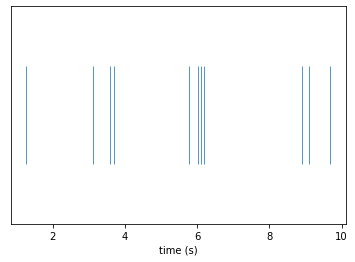

Local Variation: 0.3626163933364165
LvR: 0.36892345139891153
Mean: 5.0
Variance: 10.0
Standard Deviation: 3.1622776601683795


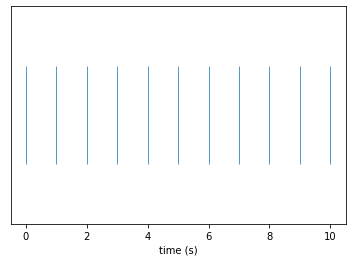

index: 0, Name: EXP_stim_10Hz_for_10sec_LV_0.00_lognormal.txt


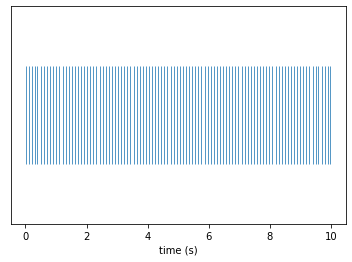

index: 1, Name: EXP_stim_10Hz_for_10sec_LV_0.39_gamma.txt


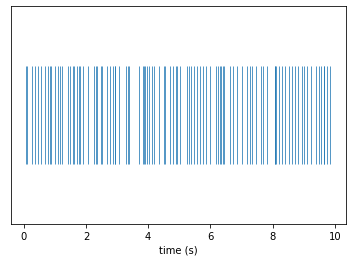

index: 2, Name: EXP_stim_10Hz_for_10sec_LV_1.00_gamma.txt


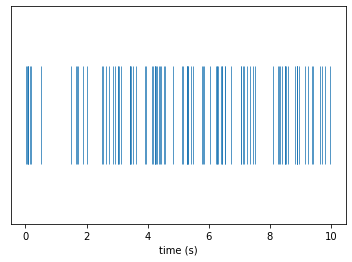

index: 3, Name: EXP_stim_10Hz_for_10sec_LV_1.28_exponential.txt


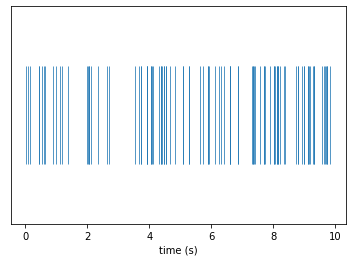

index: 4, Name: EXP_stim_20Hz_for_10sec_LV_0.38_gamma.txt


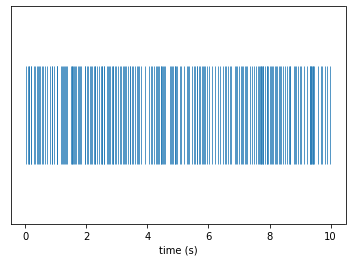

index: 5, Name: EXP_stim_20Hz_for_10sec_LV_1.01_gamma.txt


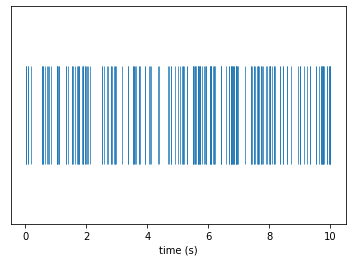

index: 6, Name: EXP_stim_20Hz_for_10sec_LV_1.24_optimize.txt


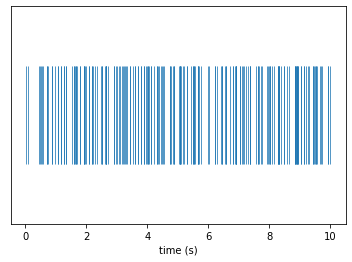

In [6]:
import os
def timing_to_arrayf(filename):
    I = []
    with open(filename) as f:
        lines = f.readlines()
        for l in lines:
            I.append(float(l))
    return I

file_list = os.listdir('./timing_data/timings_used/')

samples = []
counter = 0
samples_order = [.38,1.01, 1.24, .39, 0, 1.00, 1.28]
demo = np.sort(np.random.rand(11)*10)
print_stats(demo)
graph_timings(demo)

demo_0 = np.linspace(0, 10, 11)
print_stats(demo_0)
graph_timings(demo_0)

for name in file_list:
    timings = timing_to_arrayf('./timing_data/timings_used/'+name)
    samples.append(timings)
    intervals = generate_ISI(timings)
    #print_stats(reorder(intervals))
    print(f'index: {counter}, Name: {name}')
    #print_stats(intervals[:int(len(intervals)/2)])
    #print_stats(intervals[int(len(intervals)/2):])
    graph_timings(timings)
    
    counter+=1


spikes10 = [samples[4], samples[3], samples[5], samples[6]]
spikes20 = [np.linspace(0, 10, 200), samples[0], samples[1], samples[2]]

In [ ]:
print_stats(generate_ISI(demo))
print_stats(generate_ISI(demo_0))

Local Variation: 1.0408833071762427
LvR: 1.0571784019975463
Mean: 0.9010299504948804
Variance: 0.41891079801297054
Standard Deviation: 0.6472331867364115
Local Variation: 0.0
LvR: 0.0
Mean: 1.0
Variance: 0.0
Standard Deviation: 0.0


# Experiment file import functions

In [7]:
def experiment_import(file_name, title = '', date = '', header_rows = 3, timing_column = 0, trials = 5, rounds = 4):
    file_array = np.genfromtxt(file_name, delimiter = ',')[header_rows:]
    file_timing = file_array[:,timing_column]
    dop_current = []
    dop_levels = []
    dop_norm20 = []
    dop_norm10 = []
    
    for i in range(rounds):
        offset = i * trials * 4 + 1*(i+1)
        for j in range(trials):
            dop_current.append(file_array[:,offset+j])
            dop_levels.append(file_array[:,offset+trials + j])
            dop_norm20.append(file_array[:,offset + 2*trials + j])
            dop_norm10.append(file_array[:,offset + 3*trials + j])
            
    return np.array(file_timing), np.array(dop_current).T, np.array(dop_levels).T, np.array(dop_norm10).T, np.array(dop_norm20).T

def trial_average(trials):
    DopAvg = []
    for i in range(4):
        x = np.zeros(len(trials[:,i]))
        for j in range(0,5):
            x += trials[:,i*5 + j]
        DopAvg.append(x/5)
    return DopAvg

def graphIndividual(data, timings, labels, title):
    return 0

    
def graphAverage(data, timings, labels, title, trials = 5, start = 0, stop = 250, error = False, save = False, df = False):
    figure, graph = plt.subplots()
    leng = 0
    if df:
        leng = data.size()
    else:
        leng = len(data)
    for i in range(leng):
        graph.plot(timings[start:stop], data[i][start:stop])
        y_err = 2*np.std(data[i])/np.sqrt(trials)
        if error:
            tar = 4
            time_compressed = []
            t_c = []
            errX_TOT = []
            errY_TOT = []
            for k in range(len(data)):
                time_comp_s = []
                for j in range(len(data[i])):
                    if j%tar == 0:
                        if len(t_c) < len(data[k])/tar:
                            t_c.append(timings[j])
                        time_comp_s.append(data[k][j])
                errX_TOT.append(np.argmax(data[k])/5)
                errY_TOT.append(np.max(data[k]))
                time_compressed.append(time_comp_s)
            graph.errorbar(errX_TOT[i], errY_TOT[i], yerr = y_err, color = 'black', ecolor = 'black', elinewidth = 1, fmt = 'o', capsize = 3, capthick = 1)
        #graph.errorbar(Dop_20_timing[0:250], DopAvg[i][0:250], errorevery = 50, yerr = y_err, elinewidth = 2, capsize = 3, capthick = 1,  )
    graph.set_title(f'{title}')
    graph.set_xlabel('time (s)')
    graph.set_ylabel('Dopamine Concentration (nM)')
    plt.legend(labels)
    plt.show()
    if save:
        plt.savefig('./Graphs_exp/'+ title + '.png', bbox_inches='tight')
        
def graphDataLV(data, LV, title = "Data vs. LV"):
    figure, graph = plt.subplots()
    counter = 0
    for i in data:
        lv = [LV[counter]]*len(i)
        graph.scatter(i, lv, marker = 'x', s = 11)
        counter+=1
        graph.set_yticks(LV)
        graph.set_ylabel('LV')
        graph.set_xlabel('Dopamine Concentration (nM)')
    plt.title(title)
    plt.legend(LV)
    plt.show()
    
        
def graphLVData(data, LV, title = "LV vs. Data", error = False, max = False, tri = 5):
    figure, graph = plt.subplots()
    counter = 0
    for i in data:
        lv = LV[counter]
        d = 0
        y_err = 2*np.std(i)/np.sqrt(tri) #assumes average
        if max == True:
            d = np.max(i)
        else:
            d = np.mean(i)
        if error:
            graph.errorbar(lv, d, yerr = y_err, ecolor = 'black', elinewidth = 1, fmt = 'o', capsize = 3, capthick = 1)
        else:
            lv = [LV[counter]]*len(i)
            graph.scatter(lv, i,marker = 'o', s = 11)
        counter+=1
        graph.set_xticks(LV)
        graph.set_xlabel('LV')
        graph.set_ylabel('Dopamine Concentration (nM)')
    plt.title(title)
    plt.legend(LV)
    plt.show() 

def plotCDF(Data, LV, title = ""):
    figure, graph = plt.subplots()
    for i in range(len(Data)):
        x = np.sort(Data[i])
        y = 1. * np.arange(len(Data[i])) / (len(Data[i]) - 1)
        plt.plot(x, y)
    plt.title(title)
    plt.set_xlabel('Dopamine Concentration (nM)')
    plt.legend(LV)
    plt.show()
    
def plotPDF(Data, LV, title = "", bin = 50):
    figure, graph = plt.subplots()
    for i in range(len(Data)):
        figure, graph = plt.subplots()
        graph.hist(Data[i], density = True, bins = bin)
        plt.title(title)
        graph.set_xlabel('Dopamine Concentration (nM)')
        plt.show()
    
LV_20 = [0.00, 0.38, 1.01, 1.24]
LV_10 = [0.00, 0.39, 1.00, 1.28]

# Difference Schemes and Combined Graphing

In [10]:
#defunct, largely
def print_dop_stats(D):
    print(f'Variance: {np.var(D)}\nStandard Deviation: {np.std(D)}')
def time_avg_dop(D, D_times, n):
    return 0

def interpolate_trace(timings, data, deriv = 0):
    x =np.linspace(timings[0], timings[-1], len(timings)*4)
    f = interpolate.splrep(timings, data, s=0) #interp1d(timings, data, kind='nearest')
    y = interpolate.splev(x, f, der=deriv)
    return x, y

def forward_difference(trace):
    arr = []
    time = [0.1]
    dt = 0.2
    for i in range(1,len(trace)):
        arr.append((trace[i]-trace[i-1])/dt)
        time.append(time[i-1]+dt)
    return time[0:-1], arr

def second_central_difference(trace):
    arr = []
    time = [0.1]
    dt = 0.2
    for i in range(1,len(trace)-1):
        arr.append((trace[i+1]-2*trace[i] + trace[i-1])/dt**2)
        time.append(time[i-1]+dt)
    return time[0:-1], arr

def graph_differences(trace, timing, samps = [], gsamps = False, title = "",smoothed = False, error = False, accel = True, vel = True, main = True, wind = 20, tstart = 0, tend = 500, legend = LV_20):
    for i in range(len(trace)):
        maxPos = np.argmax(trace[i])
        max0 = np.max(trace[i])
        time, forward_diffArr = interpolate_trace(timing, trace[i], deriv = 1)
        time2, scd_arr = interpolate_trace(timing, trace[i], deriv = 2)
        if smoothed:
            df= dv = da = None
            if main:
                df = pd.DataFrame(np.transpose(trace), index = timing).ewm(span = wind).mean()
                df.plot()
            if vel:
                dv = pd.DataFrame(np.transpose(forward_diffArr), index = time).ewm(span = wind).mean()
                dv.plot()
            if accel:
                da = pd.DataFrame(np.transpose(scd_arr), index = time2).ewm(span = wind).mean()
                da.plot()
            if gsamps:
                plt.eventplot(10+np.array(samps)[i], orientation="horizontal", linewidth=0.5, linelengths = 100, lineoffsets = 0, color = "gray")
            #plt.show()
            plt.title(f"LV ={legend[i]}, {title}")
            plt.xlabel('time (s)')
            plt.ylabel('Dopamine (nM/s)')
            plt.legend(['dC/dt', 'Pulse Train'])
            #plt.clf()
        else:
            figure, graph = plt.subplots()
            if main:
                graph.plot(timing[0:maxPos], trace[i, 0:maxPos])
            if vel:
                graph.plot(time, forward_diffArr)
            if accel:
                graph.plot(time2, scd_arr)
            plt.title(title)
            graph.set_xlabel('time (s)')
            plt.show()


# Import experiment data through 4/8/2022
Excluding 2/25 initially due to formatting issues.



In [11]:
#file imports, of the form: timing, current, dopamine level, first normalization, second normalization (re experiment excel files)
t10_4822, current10_4822, dop10_4822, norm1010_4822, norm1020_4822 = experiment_import('./Experiment_files_4-18/20220408_10Hz.csv')
t20_4822, current20_4822, dop20_4822, norm2010_4822, norm2020_4822 = experiment_import('./Experiment_files_4-18/20220408_20Hz.csv')
t10_4122, current10_4122, dop10_4122, norm1010_4122, norm1020_4122 = experiment_import('./Experiment_files_4-18/20220401_10Hz.csv')
t20_4122, current20_4122, dop20_4122, norm2010_4122, norm2020_4122 = experiment_import('./Experiment_files_4-18/20220401_20Hz.csv')
t10_31822, current10_31822, dop10_31822, norm1010_31822, norm1020_31822 = experiment_import('./Experiment_files_4-18/20220318_10Hz.csv')
t20_31822, current20_31822, dop20_31822, norm2010_31822, norm2020_31822 = experiment_import('./Experiment_files_4-18/20220318_20Hz.csv')
t10_32822, current10_32822, dop10_32822, norm1010_32822, norm1020_32822 = experiment_import('./Experiment_files_4-18/20220328_10Hz.csv')
t20_32822, current20_32822, dop20_32822, norm2010_32822, norm2020_32822 = experiment_import('./Experiment_files_4-18/20220328_20Hz.csv')

# Graphing/analysis

C:\Users\Stephen Cowen\AppData\Local\Temp\ipykernel_15612\3567377600.py:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.eventplot(10+np.array(samps)[i], orientation="horizontal", linewidth=0.5, linelengths = 100, lineoffsets = 0, color = "gray")


TypeError: unsupported operand type(s) for +: 'int' and 'list'

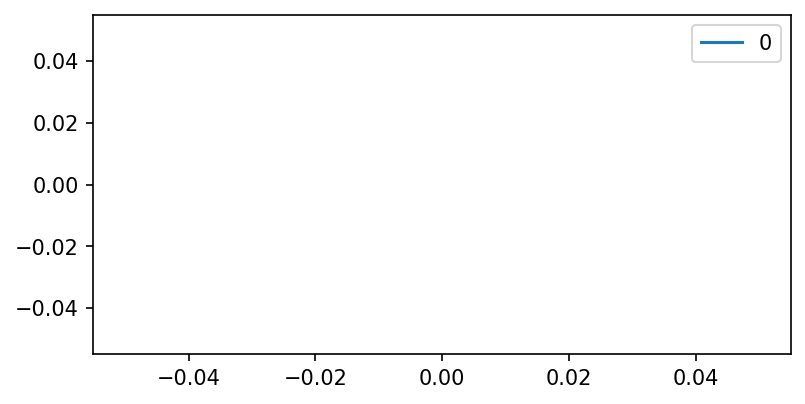

In [12]:
#size constraints for images
plt.rcParams["figure.figsize"] = (6,3)
plt.rcParams["figure.dpi"] = 150

Avg10 = trial_average(dop10_4822)
#graphAverage(Avg10, t10_4822, LV_10, 'Average for 10Hz Trials, 4/8/2022', error = True)
#graphLVData(Avg10, LV_10)
#print(dop10_4122[0])
#a, b = interpolate_trace(t10_4122[0:250], np.array(Avg10)[0, 0:250], deriv = 1)
#figure, graph = plt.subplots()
#graph.plot(a, b)

Avg10 = trial_average(norm1010_4122)
#df = pd.DataFrame(np.transpose(Avg10), index = t10_4822).ewm(span = 20).mean()
#df.plot()
#plotPDF(np.array(Avg10)[:,0:250], LV_10, "4/1/22 PDF")



#plt.legend(LV_10)
#print("10Hz trials -- Velocity")
Avg10 = np.array(Avg10)
Avg10 = Avg10[:,10:100]
#TenHz_Input = np.transpose(np.array(dop20_4122))[0:4, 10:100] 

graph_differences(Avg10, t10_4122[10:100], samps = spikes10, gsamps = True, 
                  title = "10Hz", smoothed = True, error = False, 
                  accel = False, vel = True, main = False, wind = 10, legend = LV_10)


#graphAverage(Avg10, t10_4122, LV_10, 'Average for 10Hz Trials, 4/1/2022', error = False)
#graphAverage(, t10_4122, LV_10, 'Average for 10Hz Trials, 4/1/2022', error = False, df = True)

Avg20 = trial_average(dop20_4122)
Avg20 = np.array(Avg20)

graph_differences(Avg20[:,10:100], t20_4122[10:100], samps = spikes20, gsamps = True, 
                  title = "20Hz", smoothed = True, error = False, 
                  accel = False, vel = True, main = False, wind = 10, legend = LV_20)
#print("20Hz trials -- Velocity")


#graphLVData(Avg10, LV_10, error = True, max = True, title = "4/1/22 10Hz LV vs Data, 95% CI, Max values")
#graphLVData(Avg10, LV_10, error = True, max = False, title = "4/1/22 10Hz LV vs Data, 95% CI, Mean values")


Avg10 = trial_average(dop10_32822)
#graphAverage(Avg10, t10_32822, LV_10, 'Average for 10Hz Trials, 3/28/2022', error = False)

#plotCDF(Avg10, LV_10, "3/28/22 CDF")



#graphLVData(Avg10, LV_10, error = True, max = True, title = "3/28/22 10Hz LV vs Data, 95% CI, Max values")


Avg10 = trial_average(dop10_31822)
#graphAverage(Avg10, t10_31822, LV_10, 'Average for 10Hz Trials, 3/18/2022', error = False)
#graphLVData(Avg10, LV_10, error = True, max = True, title = "3/18/22 10Hz LV vs Data, 95% CI, Max values")
#plotCDF(np.array(Avg10)[:,50:100], LV_10, title = "3/18/22 CDF")



Normalized_Avg_10hz = norm1020_4822 + norm1020_4122 + norm1020_31822 + norm1020_32822
Avg_Norm_1010 = trial_average(Normalized_Avg_10hz/4)
#graphAverage(Avg_Norm_1010, t10_31822, LV_10, 'Normalized Average for All 10Hz Trials 3-18-4-8', error = True, trials = 20, save = True)


Avg20 = trial_average(dop20_4822)
plt.clf()
#graphAverage(Avg20, t20_4822, LV_20, 'Average for 20Hz Trials, 4/8/2022', error = True)
#plotCDF(Avg20, LV_20, title = "4/8/22 CDF")
Avg20 = trial_average(dop20_4122)
#graphAverage(Avg20, t20_4122, LV_20, 'Average for 20Hz Trials, 4/1/2022', error = False)
#graphLVData(Avg20, LV_20, error = True, max = True, title = "4/8/22 20Hz LV vs Data, 95% CI, Max values")



Avg20 = trial_average(dop20_32822)
#graphAverage(Avg20, t20_32822, LV_20, 'Average for 20Hz Trials, 3/28/2022', error = False)

Avg20 = trial_average(dop20_31822)
#graphAverage(Avg20, t20_31822, LV_20, 'Average for 20Hz Trials, 3/18/2022', error = False)


Normalized_Avg_20hz = norm2010_4822 + norm2010_4122 + norm2010_31822 + norm2010_32822
Avg_Norm_2020 = trial_average(Normalized_Avg_20hz/4)
#graphAverage(Avg_Norm_2020, t20_4822, LV_20, 'Normalized Average for All 20Hz Trials 3-18-4-8', stop = 500, error = True, trials = 20, save = True)

#graphLVData(Avg_Norm_2020, LV_20, error = True, max = True, title = "All Norms 20Hz LV vs Data, 95% CI, Max values", tri = 20)





# Modeling v.5

Here, we implement the following model for total dopamine released, based on the mean accumulation of dopamine released per spike.
$$C_{total} = \sum_{k \in T} R_k$$

We aim to define $R_k$ based on the recurrence relation defined in the grant, which takes into account reuptake and release, combined with kinetics described in the Montague model.

Define:
- $T_1$ as the reuptake timeframe
- $T_2$ as the facilitation timeframe

The first term describes average reuptake of current dopamine based on probabilty of release $p_0$ across the last interspike interval, while the second term describes the total released during the interspike interval subject to some cap K.

We have 
$$R_k = (1 - p_0)R_{k - 1}e^{-(t_k - t_{k-1})/T_1} + p_0*K*(1 - e^{-(t_k - t_{k - 1})/T_2})$$



In [49]:
from sklearn.metrics import mean_squared_error

#modified dopamine function for given spike train -- t is the spike timings
def total_d_k(t, k, timestamps = np.linspace(0, 20,1000), dop_readings = np.zeros(900), currDop = 0, lag = 0):
    tot = 0
    p_0 = 0.998 #probability of release -- determine this by velocity values, empirically?
    R_k = currDop
    T_1 = .01
    T_2 = .08
    K = 10 #arbitrary for now -- available dopamine.
    #past = k - lag -- implement this later.
    past = 0
    #TODO: implement here cumulative current control
    for i in range(past, k):
        tot += R_k
        R_k += (1 - p_0)*R_k * np.exp(-1/T_1*(t[i+1] - t[i])) + p_0*K*(1 - np.exp(-1/T_2*(t[i+1] - t[i])))
        K = K - R_k
    return R_k, tot

#mean spike dopamine release -- grant
def mean_spike_dop_release(t, k):
    p_0 = 0.3
    N_k = .001
    gamma = 100
    lamb = 1
    n_s =  1
    for i in range(0, k):
        N_k += (1 - p_0)*N_k * np.exp(-gamma*(t[i+1] - t[i])) + p_0*n_s*(1 - np.exp(-gamma*(t[i+1] - t[i]))) #- np.exp(-gamma*(t[i+1] - t[i])/2)*N_k
    return N_k

def graph_sample_mean_spike_dop(sample, lag_val = 1, curr_level = 0.001, data = [], show_spikes = False):
    dop_vals = [curr_level]
    for i in range(lag_val, len(sample)):
        #dop_vals.append(mean_spike_dop_release(sample, i))
        dop_vals.append(total_d_k(sample, i, currDop = dop_vals[i-1 - lag_val], lag = lag_val)[1])
    figure, graph = plt.subplots()
    
    if len(data)>0:
        graph.plot(np.linspace(10, 20, len(data)), data, color = "red")
        print(f"RMSE: {np.sqrt(mean_squared_error(data, dop_vals[0:len(data)]))}")
    graph.plot(sample[lag_val - 1:]+np.ones(len(sample[lag_val - 1:]))*10, dop_vals)
    
    if show_spikes:
        plt.eventplot(np.ones(len(sample))*10 + np.array(sample), orientation="horizontal", linewidth=0.5, linelengths = 100, lineoffsets = 0, color = "gray")

    plt.show()

RMSE: 181.93760551487748


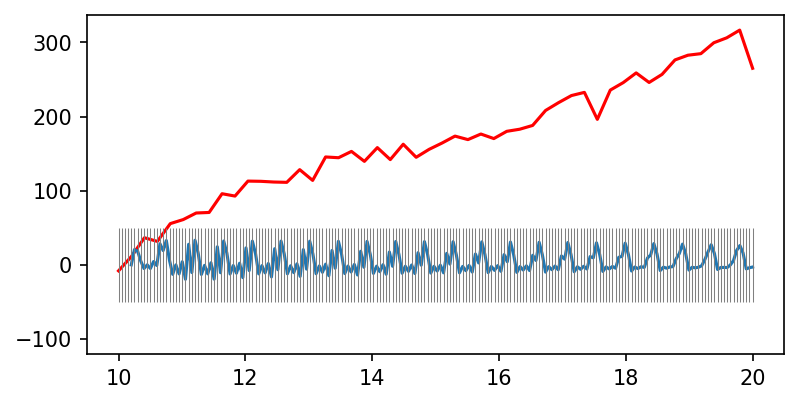

RMSE: 244.99474563640518


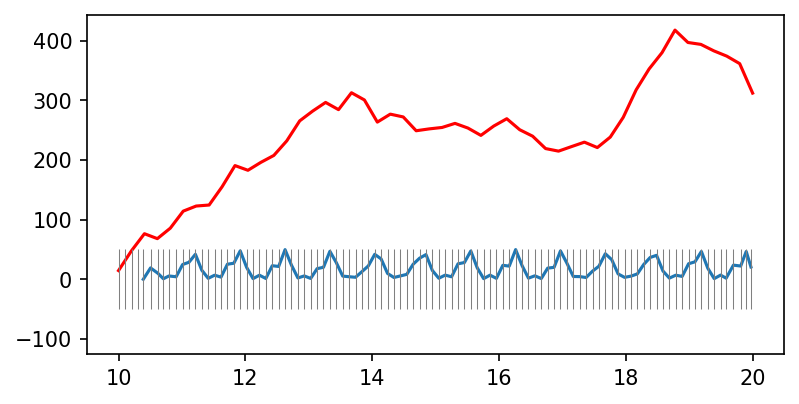

RMSE: 213571939.22701767


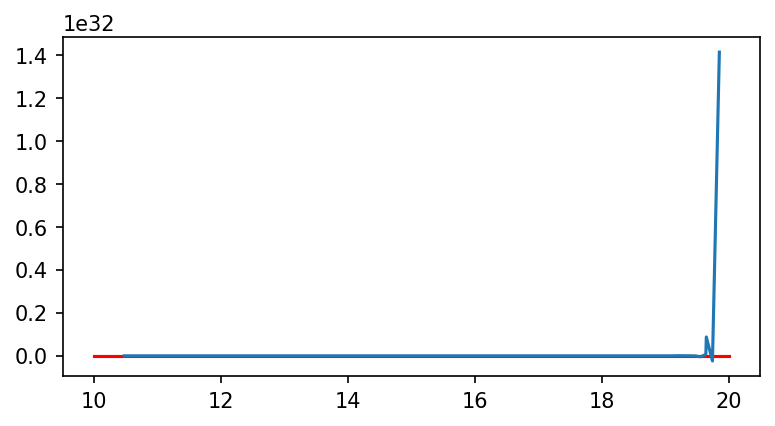

RMSE: 1370826848278.2817


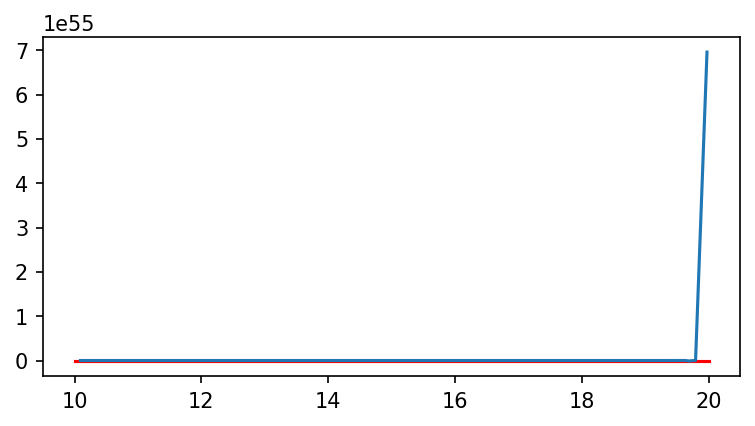

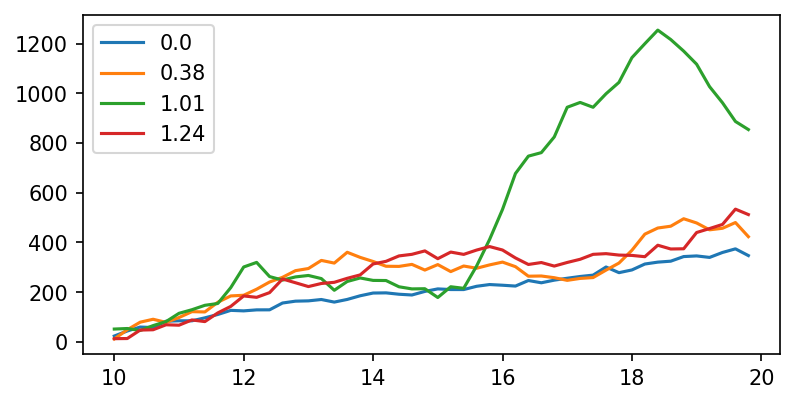

In [50]:

for i in range(len(spikes20)):
    #print(print_stats(generate_ISI(spikes20[i])))
    graph_sample_mean_spike_dop(np.array(spikes20[i]), lag_val = 5, curr_level = 0.001, data = np.transpose(np.array(dop20_4122))[i*5 + 1, 50:100], show_spikes = True)#np.ones(len (spikes20[i]))*10)##np.append(i, 20))
    plt.show()



figure, graph = plt.subplots()
graph.plot(t20_4122[50:100], np.transpose(np.array(dop20_4122))[0, 50:100])
graph.plot(t20_4122[50:100], np.transpose(np.array(dop20_4122))[5, 50:100])
graph.plot(t20_4122[50:100], np.transpose(np.array(dop20_4122))[10, 50:100])
graph.plot(t20_4122[50:100], np.transpose(np.array(dop20_4122))[15, 50:100])
plt.legend(LV_20)

plt.show()

#plt.eventplot(np.ones(len(spikes20[2]))*10 + np.array(spikes20[2]), orientation="horizontal", linewidth=0.75, linelengths = 0.5, lineoffsets = 0)




# Autocorrelation and Autoregression

0      -4.266313
1       9.848915
2       3.627433
3      11.744335
4       2.668267
         ...    
895   -21.849705
896   -11.041360
897     9.652330
898    12.133365
899    21.550825
Length: 900, dtype: float64


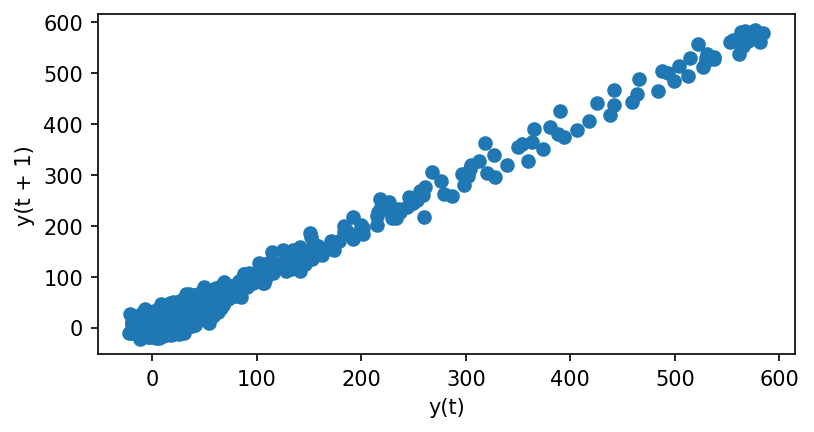

        t-1     t+1
t-1  1.0000  0.9926
t+1  0.9926  1.0000


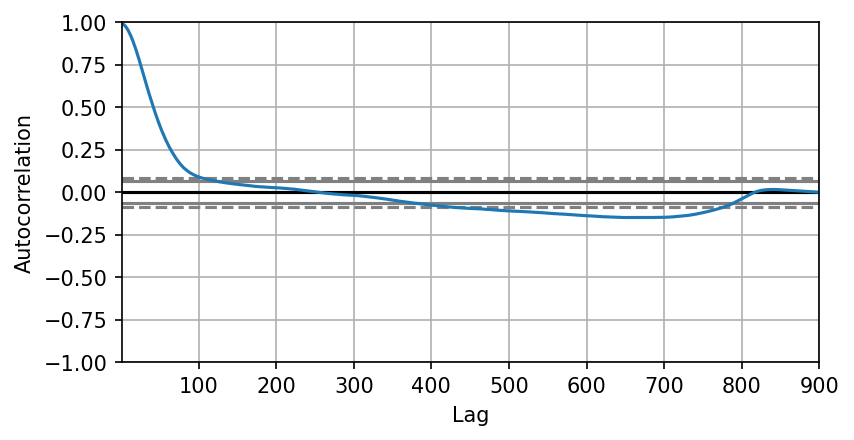

c:\ProgramData\Anaconda3v2\envs\spyder-env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\ProgramData\Anaconda3v2\envs\spyder-env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\ProgramData\Anaconda3v2\envs\spyder-env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn

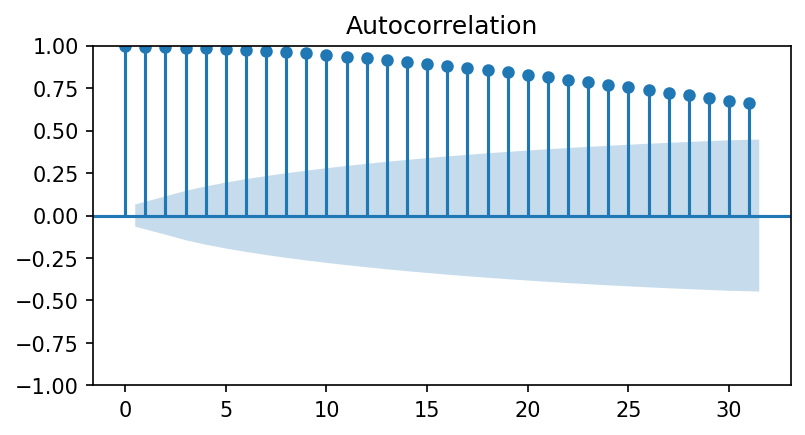

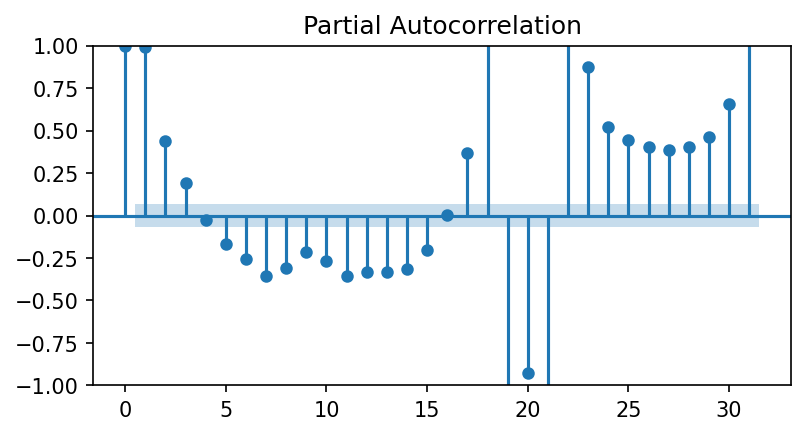

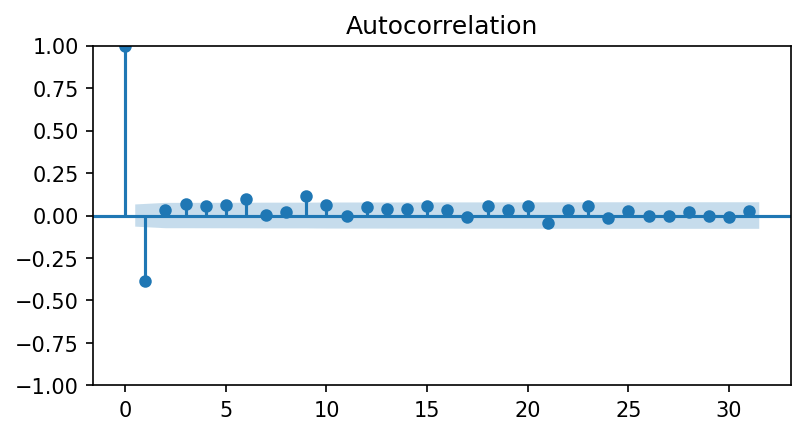

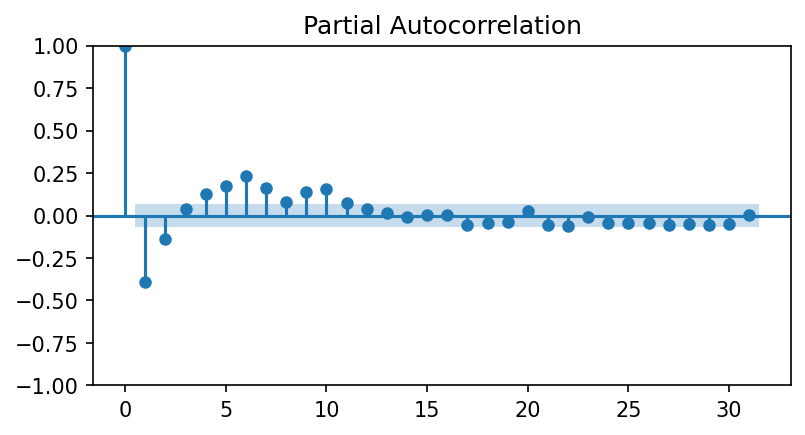

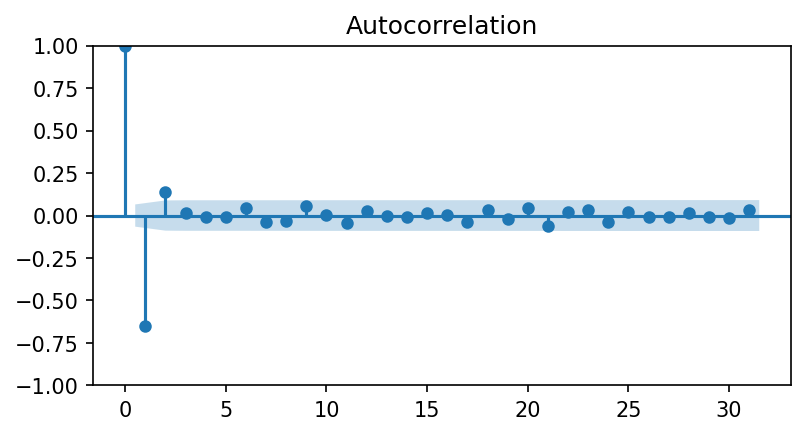

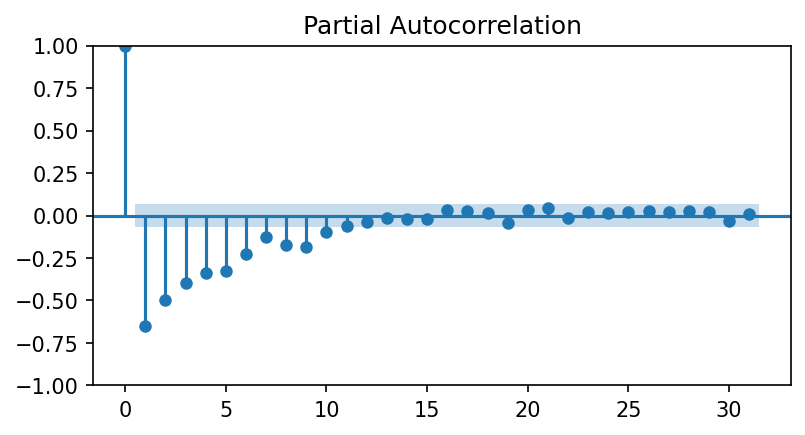

Test RMSE: 39.658


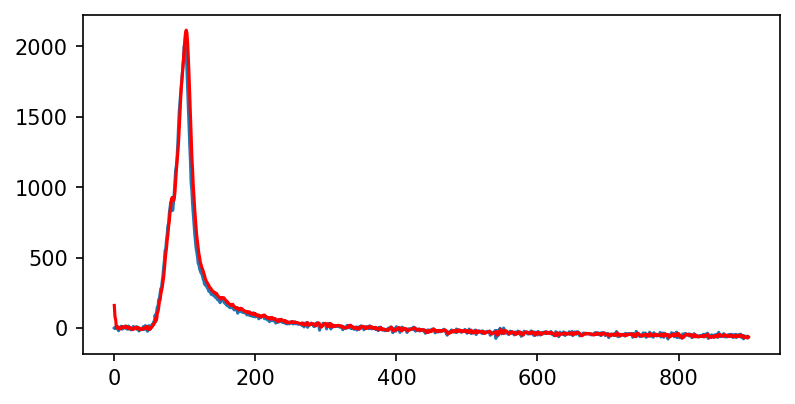

In [52]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
from pandas import DataFrame, concat
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt



series = pd.Series(dop20_32822[:, 0])
series2 = pd.Series(dop20_31822[:, 15])
print(series)
#series = pd.Series(Avg20[0])
lag_plot(series)
pyplot.show()


#Pearson Coeff
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

autocorrelation_plot(series)
pyplot.show()

plot_acf(series, lags=31)
plot_pacf(series, lags = 31)
plot_acf(series.diff().dropna(), lags=31)
plot_pacf(series.diff().dropna(), lags = 31)
plot_acf(series.diff().diff().dropna(), lags=31)
plot_pacf(series.diff().diff().dropna(), lags = 31)
#plot_pacf
pyplot.show()


X = series.values
p = 5
train, test = series.values[10:70], series2.values
# train autoregression
window = 3
model = AutoReg(train, lags=p)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -230.574
Date:                Mon, 25 Jul 2022   AIC                            471.149
Time:                        18:34:49   BIC                            481.537
Sample:                             0   HQIC                           475.204
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0990      3.159     -0.031      0.975      -6.291       6.093
ar.L2         -0.1772      1.440     -0.123      0.902      -2.999       2.645
ar.L3          0.0609      1.014      0.060      0.9

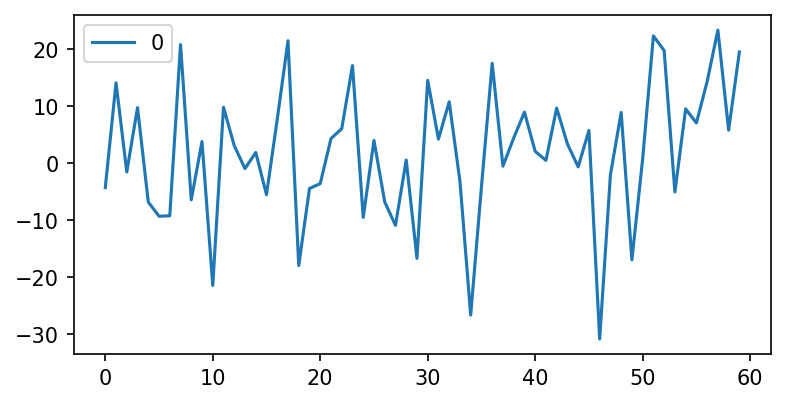

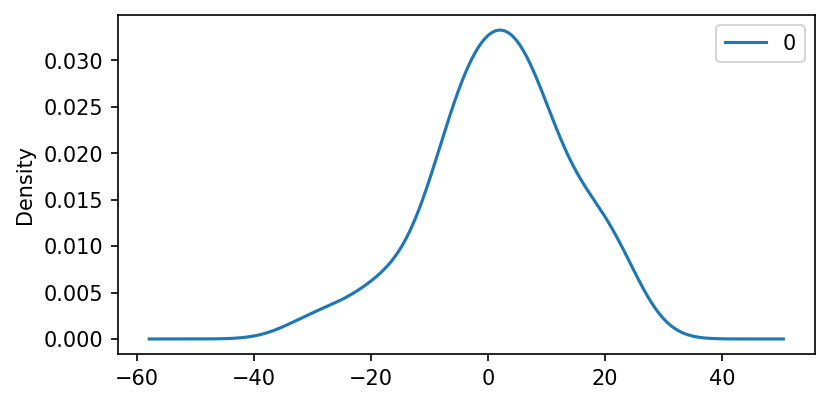

               0
count  60.000000
mean    1.884201
std    11.907389
min   -30.831113
25%    -4.577148
50%     2.592161
75%     9.586755
max    23.369717


In [53]:
#ARIMA

model = ARIMA(series[0:60], order=(3,1,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

c:\ProgramData\Anaconda3v2\envs\spyder-env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 17.931


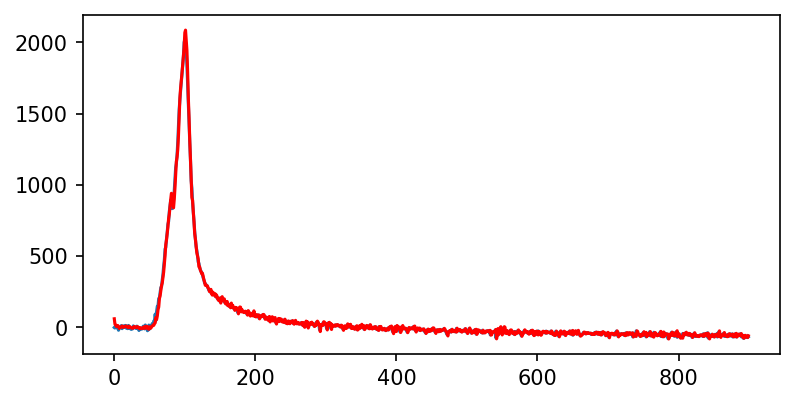

In [54]:
train, test = series.values[0:60], series2.values
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# Import experiment data 4/01/2022

In [55]:
#20HZ dop 5 trials per stim, 4 stims [0.00, 0.38, 1.01, 1.24]LV
Dop_20_318 = np.genfromtxt('./Experiment31822/20220318 data.csv', delimiter=',')[2:]
Dop_20_timing = Dop_20_318[:,0]
Dop_20_318 = Dop_20_318[:, 21:]
print(Dop_20_318)
Dop_10_318 = np.genfromtxt('./Experiment31822/10_20220318 data.csv', delimiter=',')[2:]
Dop_10_timing = Dop_10_318[:,0]
Dop_10_318 = Dop_10_318[:, 21:]
print(Dop_10_318)

DopAvg = []
for i in range(0, 4):
    x = np.zeros(len(Dop_10_318[:,i]))
    for j in range(0,5):
        x += Dop_10_318[:,i*4 + j]
    DopAvg.append(x/5)
    
tar = 4
time_compressed = []
t_c = []
errX_TOT = []
errY_TOT = []
for i in range(len(DopAvg)):
    time_comp_s = []
    #ER_xS = []
    #ER_S = []
    for j in range(len(DopAvg[i])):
        #if np.argmax(DopAvg[i] == j):
        #    ER_xS.append(Dop_20_timing[j])
        #    ER_S.append(DopAvg[i][j])
        if j%tar == 0:
            if len(t_c) < len(DopAvg[i])/tar:
                t_c.append(Dop_10_timing[j])
            time_comp_s.append(DopAvg[i][j])
       # if j%(10*tar) == 0:
           # ER_xS.append(Dop_20_timing[j])
           # ER_S.append(DopAvg[i][j])
    errX_TOT.append(np.argmax(DopAvg[i])/5)
    errY_TOT.append(np.max(DopAvg[i]))
    time_compressed.append(time_comp_s)
    
        
        
figure, graph = plt.subplots()


for i in range(len(time_compressed)):
    graph.plot(t_c, time_compressed[i])
    graph.set_title(f'Aggregate Average Concentration, 1x/sec')
    graph.set_xlabel('time (s)')
    graph.set_ylabel('Dopamine Concentration (nM)')
plt.legend(LV_20)
plt.show()


for i in range(len(time_compressed)):
    figure, graph = plt.subplots()
    graph.plot(t_c, time_compressed[i])
    graph.set_title(f'LV: {LV_20[i]}, Average Concentration')
    graph.set_xlabel('time (s)')
    graph.set_ylabel('Dopamine Concentration (nM)')
    plt.show()


figure, graph = plt.subplots()

for i in range(len(DopAvg)):
    graph.plot(Dop_10_timing[0:250], DopAvg[i][0:250])
    y_err = np.std(DopAvg[i])
    graph.errorbar(errX_TOT[i], errY_TOT[i], yerr = y_err, color = 'black', ecolor = 'black', elinewidth = 1, fmt = 'o', capsize = 3, capthick = 1,  )
    #graph.errorbar(Dop_20_timing[0:250], DopAvg[i][0:250], errorevery = 50, yerr = y_err, elinewidth = 2, capsize = 3, capthick = 1,  )
    graph.set_title(f'Aggregate Average Concentration 3/18 - Normalized Data')
    graph.set_xlabel('time (s)')
    graph.set_ylabel('Dopamine Concentration (nM)')
plt.legend(LV_10)
plt.savefig('./Graphs_exp/3-18_10hz_Normalized_max_SD.png', bbox_inches='tight')
plt.show()
    

for i in range(len(DopAvg)):
    figure, graph = plt.subplots()
    graph.plot(Dop_20_timing, DopAvg[i])
    graph.set_title(f'LV: {LV_20[i]}, Average Concentration')
    graph.set_xlabel('time (s)')
    graph.set_ylabel('Dopamine Concentration (nM)')
    plt.show()

FileNotFoundError: ./Experiment31822/20220318 data.csv not found.

# Dopamine release based on spike trains

Here, we use the Montague 2004 model:
$$\frac{dC}{dt} = p(t)A(t) - V_m(1 + \frac{K_m}{C})^{-1}$$

$$p(t) = \frac{\sum_i \exp(-\frac{(t - t_i)}{T_R})}{T_R}$$

$$A(t) = a_0 \prod_j I_j(t)$$

$$I_j(t) = k_j (1 - \exp(-\frac{t}{T_j}))$$

This is under the assumption of I(0) = 0.  Note that we have the following variables:
- $t_i$ is the time of the ith spike initiation
- $T_R$ is the time constant of the electrochemical probe
- $T_j$ are the time constants related to first-order kinetics.
- $k_j$ are facilitation/depression coefficients
- $C$ is the current dopamine level
- $V_m$ is the maximal velocity of dopamine reuptake
- $K_m$ is the associated affinity constant


$K_m$ and $V_m$ are empirically derived to be $0.2\mu M$ and $4.0 \frac{\mu M}{s}$, respectively.

In [56]:
def Wightman_model(x, r, C_p, V_m, K_m):
    return r*C_p - V_m*(1/(1 + K_m/x[0])) - x[1]

#here, we have the following arguments:
#x is a vector containing current dopamine level
#coeffs = [T_1, k_1, T_2, k_2, T_3, k_3]
#T_i is time constant associated with ith exponential
#k_i is kick associated with ith exponential, k_i > 1 -> facilitation, k_i < 1 -> depression
#V_m is the maximal velocity for dopamine reuptake via Michaelis-Menten kinetics
#empirically-determined value for V_m is 4.0um/sec
#K_m is the associated affinity constant
#empirically-determined value for K_m is 0.2um
#spike_timings is a list of the pulse initiation times
#T_R is the time constant of the electrochemical probe used (low-pass filtering via Bath et al., 2000).
def Montague_model(t, x, V_m, K_m, a_0, coeffs, spike_timings, T_R):
    k = (p(t, spike_timings, T_R)*A(t, a_0, coeffs) - V_m*(1/(1 + K_m/x[0])))
    #if (t > 10):
        #print(f't: {t}, k: {k}, x: {x[0]}, p: {p(t, spike_timings, T_R)}, A: {A(t, a_0, coeffs)}, second_term: {V_m*(1/(1 + K_m/x[0]))}')
    return k

def p(t, spike_timings, T_R):
    sum = 0
    for i in spike_timings:
        #pay attention only to spikes in the past.
        if (t - i) >= 0:
            sum += eps(t, T_R, i)
    return sum
    #models exact impulse times

#A function via Montague et. al 2004
#Dynamic gain control of release, limited here to three exponential "hidden" dynamic processes
def A(t, a_0, coeffs):
    I_list = []
    for i in range(0,int(len(coeffs)/2)):
        T = coeffs[i*2]
        k = coeffs[i*2 + 1]
        I_list.append(k*(1 - np.exp((-t/T))))
    
    return a_0*np.prod(I_list)
    
def eps(t, T_R, t_i):
    return 1/T_R*np.exp(-(t - t_i)/T_R)

def graph_sample_mean_spike_dop(sample):
    dop_vals = []
    for i in range(0, len(sample)):
        #dop_vals.append(mean_spike_dop_release(sample, i))
        dop_vals.append(total_d_k(sample, i)[1])
    figure, graph = plt.subplots()
    graph.plot(sample, dop_vals)
    plt.show()





# Application of Montague to 10Hz and 20Hz spike timings

In [57]:
from scipy.integrate import solve_ivp

T_R = 2
V_m = 4
K_m = .2
a_0 = 10 #irregular interburst interval from Montague 2004
c = [.001]
coeffs = [.45, 1.01, .35, .984, 600, .99] #standard values from paper -- T1 k1 T2 k2 T3 k3 -- can add more if necessary in pairs

results = 0
solutions_LV20 = []
end = 20
#spikes20[1] = np.zeros(len(spikes20[1]))
#spikes20[1][0] = 1
for i in range(0,len(spikes20)):
    spike_timings = spikes20[i]
    res = solve_ivp(Montague_model, (0,end), c, method = 'RK45', 
                  args = (V_m, K_m, a_0, coeffs, spike_timings, T_R), dense_output = True)
    solutions_LV20.append(res)

solutions_LV10 = []
c = [0.001]
for i in range(len(spikes10)):
    spike_timings = spikes10[i]
    res = solve_ivp(Montague_model, (0,end), c, method = 'RK45', 
                  args = (V_m, K_m, a_0, coeffs, spike_timings, T_R), dense_output = True)
    solutions_LV10.append(res)
    






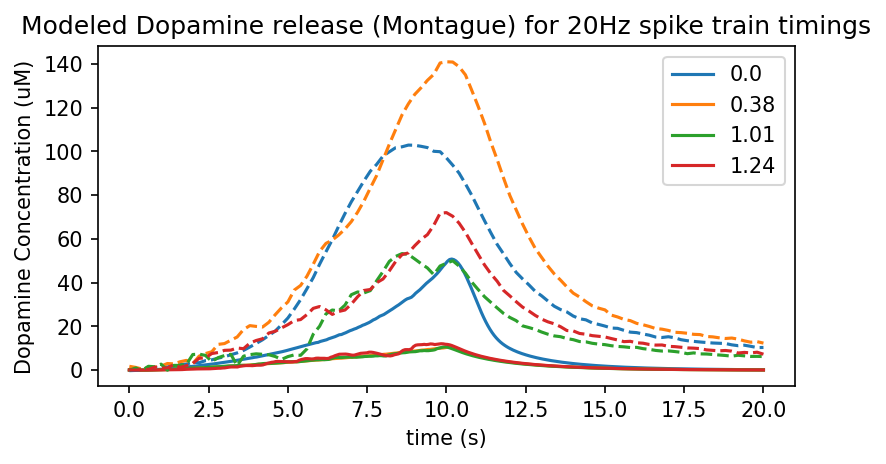

In [58]:
t = np.linspace(0, 20, 300)
figure, graph = plt.subplots()
#graph.plot(t, sol.sol(t)[0])
for i in solutions_LV20:
    graph.plot(t, i.sol(t)[0]*80)

#testing versus 4/1/22 20Hz normalized
plt.gca().set_prop_cycle(None)
Avg_Norm_2020 = trial_average(norm2020_31822)
time_domain = np.linspace(0, 20, 101)

for i in Avg_Norm_2020:
    graph.plot(time_domain, i[50:151],linestyle = 'dashed')

plt.ylabel('Dopamine Concentration (uM)')
plt.xlabel('time (s)')
plt.title('Modeled Dopamine release (Montague) for 20Hz spike train timings')
plt.legend(LV_20)
plt.show()

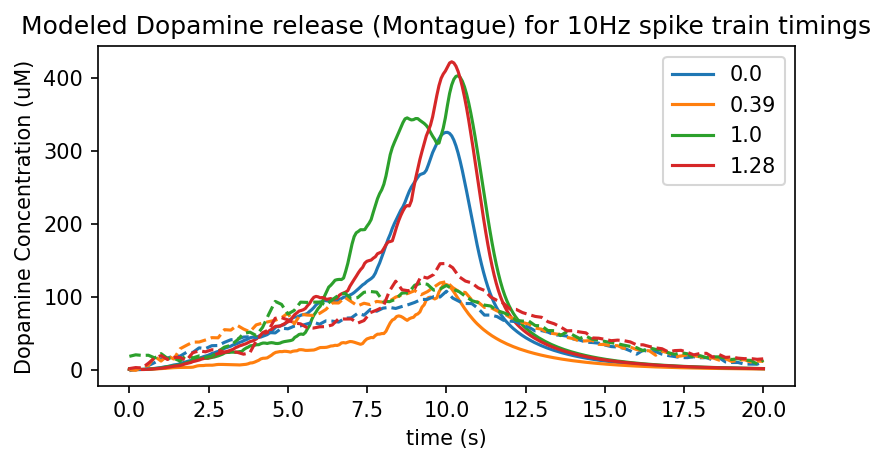

In [59]:
figure, graph = plt.subplots()
for i in solutions_LV10:
    graph.plot(t, i.sol(t)[0]*550)

plt.gca().set_prop_cycle(None)
Avg_Norm_1010 = trial_average(norm1010_4822)
time_domain = np.linspace(0, 20, 101)
for i in Avg_Norm_1010:
    graph.plot(time_domain, i[50:151],linestyle = 'dashed')
    
plt.ylabel('Dopamine Concentration (uM)')
plt.xlabel('time (s)')
plt.title('Modeled Dopamine release (Montague) for 10Hz spike train timings')
plt.legend(LV_10)
plt.show()

In [ ]:
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
def MontOpt(params, spike_timings, dopamine, t = 10):
    a = solve_ivp(Montague_model, [0,t+1], [0.001], method = 'RK45', 
                  args = (4, .2, 10, [.4, 1.01, .35, .98, 600, .99], spike_timings, 2),#args = (4, 0.2, 20, params[4:], spike_timings, 2), 
                  dense_output = True)
    t = np.linspace(0, int(t/5), t + 1)
    sum = 0
    for i in range(len(t)):
        sum += abs(dopamine[i] - a.sol(t[i])[0])
    #print(f'x: {a.sol(10)[0]}, params: {params}, sum: {sum}')
    return sum
    
def solveMont(params, spike_timings, t):
    a = solve_ivp(Montague_model, [0,t], [0.001], method = 'RK45', 
                  args = (params[1], params[2], params[3], params[4:], spike_timings, params[0]), 
                  dense_output = True)
    return a
%time    
#first thing to try is to optimize the parameters given a data set. We aim to minimize the functional above.
x = [2, 4, .2, 10, .4, 1.01, 3.5, .98, 600, .99]
res = minimize(MontOpt, x, args = (spikes20[1], np.array(Avg_Norm_2020)[1,50:151], 30), tol = 1e-3)
%time  
print(res)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.62 µs
      fun: 505.0448947097085
 hess_inv: array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
      jac: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 11
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([2.00e+00, 4.00e+00, 2.00e-01, 1.00e+01, 4.00e-01, 1.01e+00,
       3.50e+00, 9.80e-01, 6.00e+02, 9.90e-01])


In [ ]:
print(res.x)
x = [2.5, 4, .2, 10, 4, 1.01, .05, .7, 600, .90]
sol = solveMont(x, spikes20[1], 30)
print(sol)


[2.00e+00 4.00e+00 2.00e-01 1.00e+01 4.00e-01 1.01e+00 3.50e+00 9.80e-01
 6.00e+02 9.90e-01]
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 1904
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fdde4660340>
   status: 0
  success: True
        t: array([ 0.        ,  0.03476076,  0.08624545,  0.14066163,  0.20378073,
        0.27934255,  0.36221069,  0.42535294,  0.48849519,  0.55693205,
        0.6253689 ,  0.68066695,  0.73305076,  0.81598376,  0.8720102 ,
        0.92003425,  0.9662451 ,  1.06420023,  1.14852718,  1.20252197,
        1.24907868,  1.29563539,  1.35007689,  1.40173384,  1.50036228,
        1.55985067,  1.61660133,  1.6698011 ,  1.72300087,  1.77505856,
        1.82645864,  1.88219169,  1.93558392,  1.9919712 ,  2.04483021,
        2.09541611,  2.1422381 ,  2.19894622,  2.25565434,  2.30547882,
        2.35310353,  2.41131471,  2.46704431,  2.52607727,  2.58555605,
        2.6461572

[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6
  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4
  5.6  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2
  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.
 11.2 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8
 14.  14.2 14.4 14.6 14.8 15.  15.2 15.4 15.6 15.8 16.  16.2 16.4 16.6
 16.8 17.  17.2 17.4 17.6 17.8 18.  18.2 18.4 18.6 18.8 19.  19.2 19.4
 19.6 19.8 20.  20.2 20.4 20.6 20.8 21.  21.2 21.4 21.6 21.8 22.  22.2
 22.4 22.6 22.8 23.  23.2 23.4 23.6 23.8 24.  24.2 24.4 24.6 24.8 25.
 25.2 25.4 25.6 25.8 26.  26.2 26.4 26.6 26.8 27.  27.2 27.4 27.6 27.8
 28.  28.2 28.4 28.6 28.8 29.  29.2 29.4 29.6 29.8 30. ]


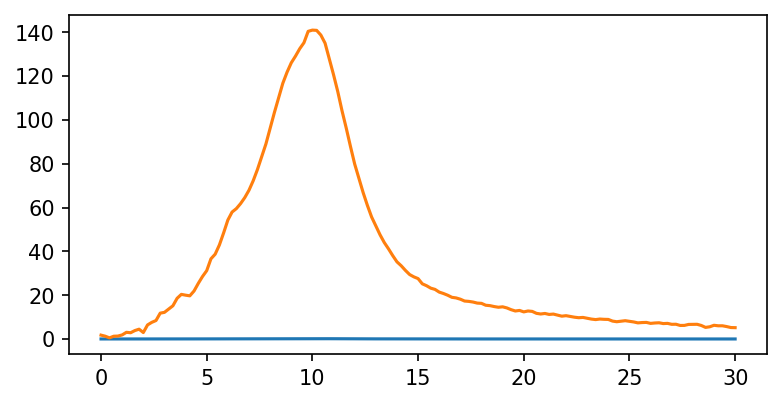

In [ ]:
t = np.linspace(0, 30, 151)
print(t)
figure, graph = plt.subplots()
graph.plot(t, sol.sol(t)[0])
graph.plot(t, np.array(Avg_Norm_2020)[1,50:201])

Local Variation: 0.004475688526416219
LvR: 0.004923769444523783
Mean: 0.10060381042971552
Variance: 3.189434857185153e-05
Standard Deviation: 0.005647508173686119
None


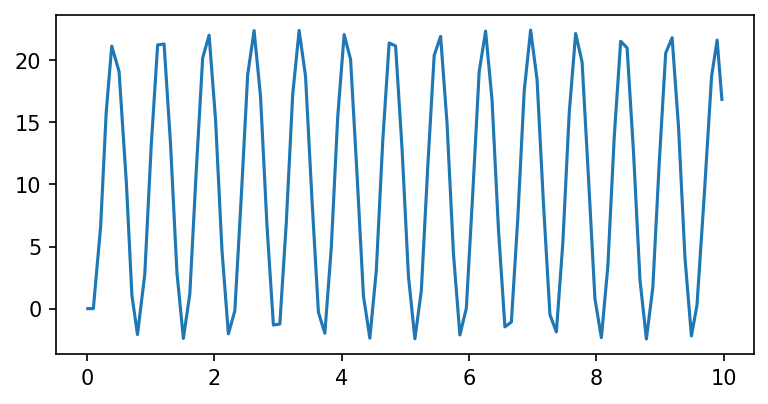

Local Variation: 0.3910090179605507
LvR: 0.4398118637829832
Mean: 0.09886870541697203
Variance: 0.0027017154715634527
Standard Deviation: 0.05197802873872241
None


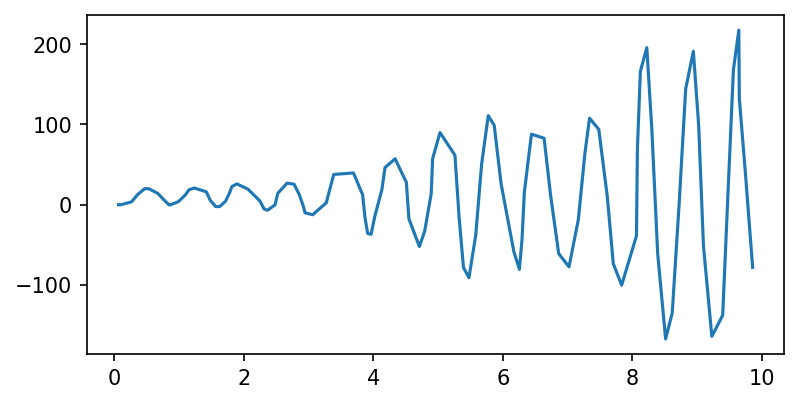

Local Variation: 1.0033591111758322
LvR: 1.18128122016095
Mean: 0.1006103581181535
Variance: 0.019289422610836778
Standard Deviation: 0.1388863658205397
None


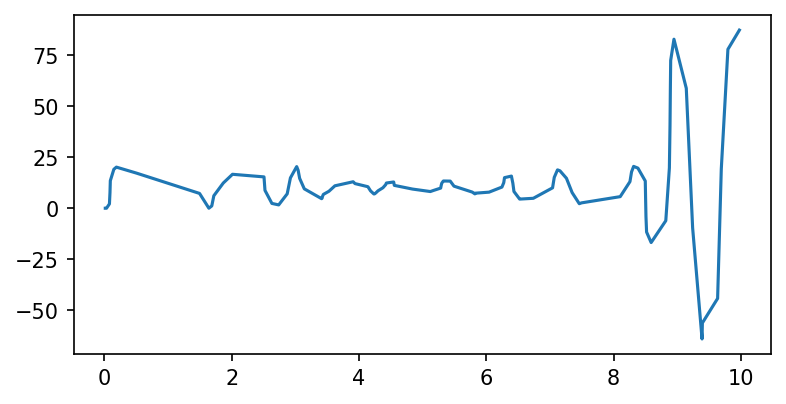

Local Variation: 1.2781431331166513
LvR: 1.495625935379196
Mean: 0.09910691700630582
Variance: 0.016780130439956128
Standard Deviation: 0.12953814279954814
None


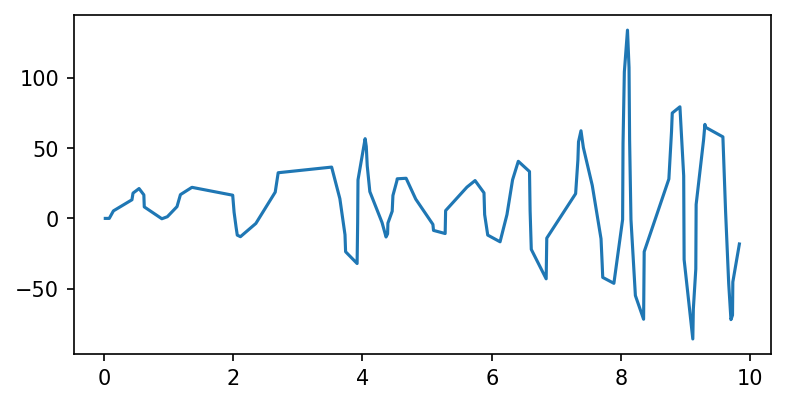

Local Variation: 0.37811467028370366
LvR: 0.46664183539472703
Mean: 0.050111795750343885
Variance: 0.0007783424529965192
Standard Deviation: 0.02789878945396232
None


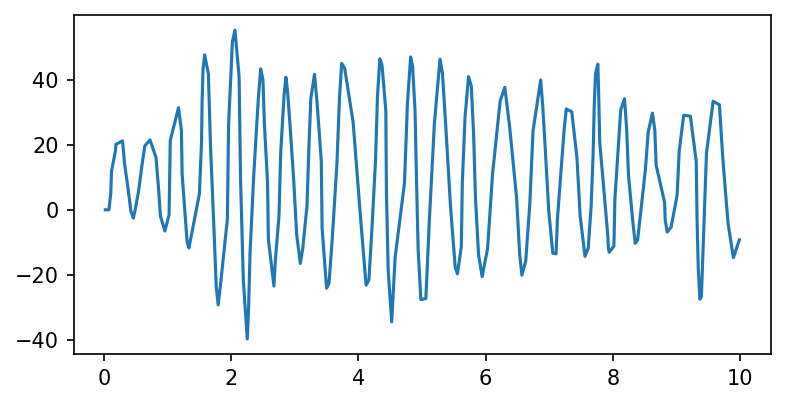

Local Variation: 1.0134995882073807
LvR: 1.2898635684657827
Mean: 0.05015417321042754
Variance: 0.004087214675110489
Standard Deviation: 0.06393132780656514
None


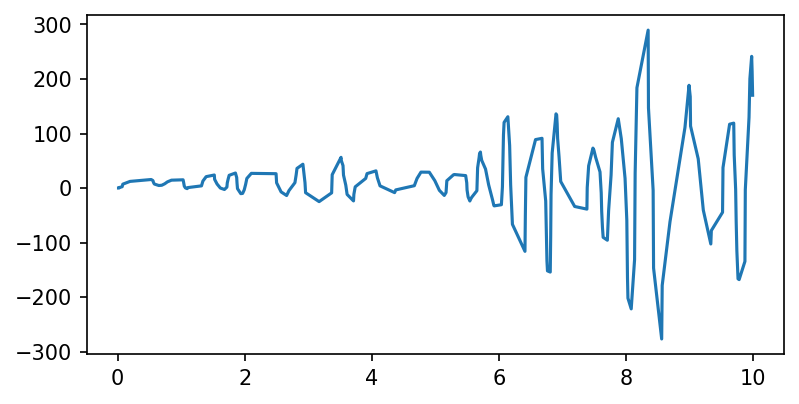

Local Variation: 1.235774495009032
LvR: 1.5432174013307813
Mean: 0.05018190954773869
Variance: 0.002882986118142456
Standard Deviation: 0.05369344576521846
None


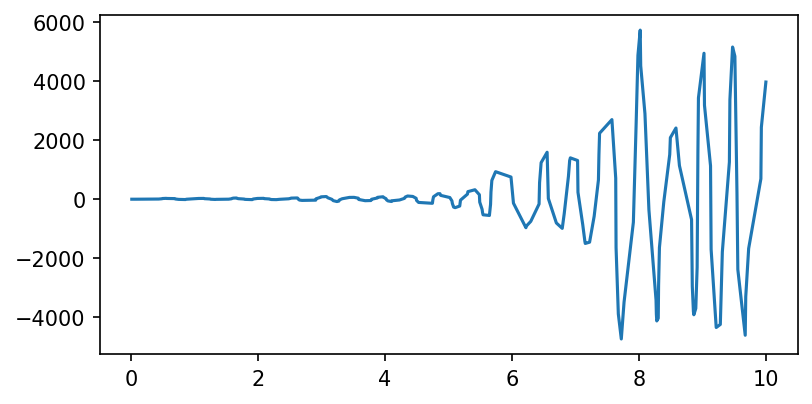

In [60]:
#Using model from grant
for i in samples:
    print(print_stats(generate_ISI(i)))
    graph_sample_mean_spike_dop(i)


NameError: name 'solveMont' is not defined

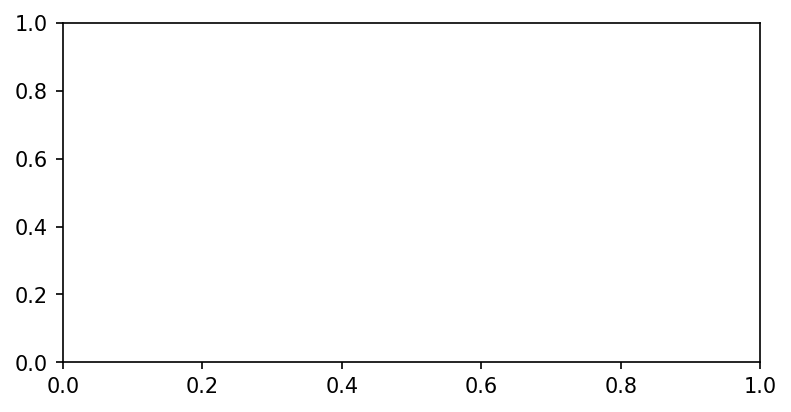

In [61]:
figure, graph = plt.subplots()
for i in range(0, 3):
    sol = solveMont(res.x, Stim_20[:,i*2], 20)
    t = np.linspace(0, 20, 300)
    graph.plot(t, sol.sol(t)[0])
plt.show()

In [62]:
LV_20 = [0.00, 0.38, 1.01, 1.24]
print('----------20Hz---------')
for i in range(0, len(Dop_20[0])):
    figure, graph = plt.subplots()
    print(f'20Hz | LV: {LV_20[int(i/5)]} Trial: {i%5+1}')
    sol = solveMont(res.x, Stim_20[:,int(i/5)*2], 20)
    graph.plot(Dop_20_timing[50:151]-10, Dop_20[50:151,i], linewidth = .5)
    t = np.linspace(0, 20, 300)
    graph.plot(t, sol.sol(t)[0])
    graph_timings(Stim_20[:,int(i/5)*2])
    plt.show()

----------20Hz---------


NameError: name 'Dop_20' is not defined

# Generating timings with prescribed LV

In [13]:
#given LV, generate ISI and timings

#aim for optimization, with randomly generated starting vectors

tol = 0.001
LV_list = [0, .5, 1, 1.5, 2, 2.5]
num_spikes = 100

list = np.random.rand(100, 1)
list = list/sum(list)*10
print(sum(list))
print_stats(list)



print(list)

[10.]
Local Variation: [0.5620263]
LvR: [0.65167004]
Mean: 0.10000000000000002
Variance: 0.0029689569794186525
Standard Deviation: 0.05448813613456284
[[0.00728872]
 [0.01135078]
 [0.03256448]
 [0.06925676]
 [0.12806048]
 [0.07856372]
 [0.10219023]
 [0.04968829]
 [0.13283506]
 [0.15143418]
 [0.04318511]
 [0.08595247]
 [0.14596582]
 [0.15378014]
 [0.02008893]
 [0.02509736]
 [0.04474439]
 [0.06637168]
 [0.09996541]
 [0.11245789]
 [0.14402679]
 [0.18441546]
 [0.09296358]
 [0.00769212]
 [0.08323158]
 [0.08897741]
 [0.10605599]
 [0.15719738]
 [0.13294234]
 [0.15325517]
 [0.07140445]
 [0.08355831]
 [0.01393746]
 [0.10934682]
 [0.10659244]
 [0.14382514]
 [0.10385662]
 [0.005365  ]
 [0.09828142]
 [0.03583877]
 [0.12405948]
 [0.13544033]
 [0.1837858 ]
 [0.13735918]
 [0.11056482]
 [0.1536199 ]
 [0.0853543 ]
 [0.0126002 ]
 [0.15504498]
 [0.09851125]
 [0.04656995]
 [0.05450604]
 [0.15029582]
 [0.02285683]
 [0.13897438]
 [0.11575885]
 [0.07070486]
 [0.02466284]
 [0.08441484]
 [0.0033619 ]
 [0.17634

In [ ]:
t10, current10, dop10, norm1010, norm1020 = experiment_import('./Experiment40122/10_20220401 data.csv')
t20, current20, dop20, norm2010, norm2020 = experiment_import('./Experiment40122/20_20220401 data.csv')

DopAvg = []
for i in range(0, 4):
    x = np.zeros(len(dop10[:,i]))
    for j in range(0,5):
        x += dop10[:,i*5 + j]
    DopAvg.append(x/5)

figure, graph = plt.subplots()
for i in range(len(time_compressed)):
    y_err = np.std(time_compressed[i])
    graph.errorbar(t_c, time_compressed[i], yerr = y_err)
    graph.set_title(f'Aggregate Average Concentration, 1x/sec')
    graph.set_xlabel('time (s)')
    graph.set_ylabel('Dopamine Concentration (nM)')
plt.legend(LV_10)
plt.show()


for i in range(len(time_compressed)):
    figure, graph = plt.subplots()
    graph.plot(t_c, time_compressed[i])
    graph.set_title(f'LV: {LV_20[i]}, Average Concentration')
    graph.set_xlabel('time (s)')
    graph.set_ylabel('Dopamine Concentration (nM)')
    plt.show()


for i in range(len(DopAvg)):
    #print(f'LV: {LV_20[i]}, Stats: {print_dop_stats(DopAvg[i])})
    figure, graph = plt.subplots()
    graph.plot(t10, DopAvg[i])
    graph.set_title(f'LV: {LV_10[i]}, Average Concentration')
    graph.set_xlabel('time (s)')
    graph.set_ylabel('Dopamine Concentration (nM)')
    plt.show()
    
#graph.plot(Stim_10_timing_000, Stim_10[:, 1])



# Import experiment data 2/25

(900, 20)


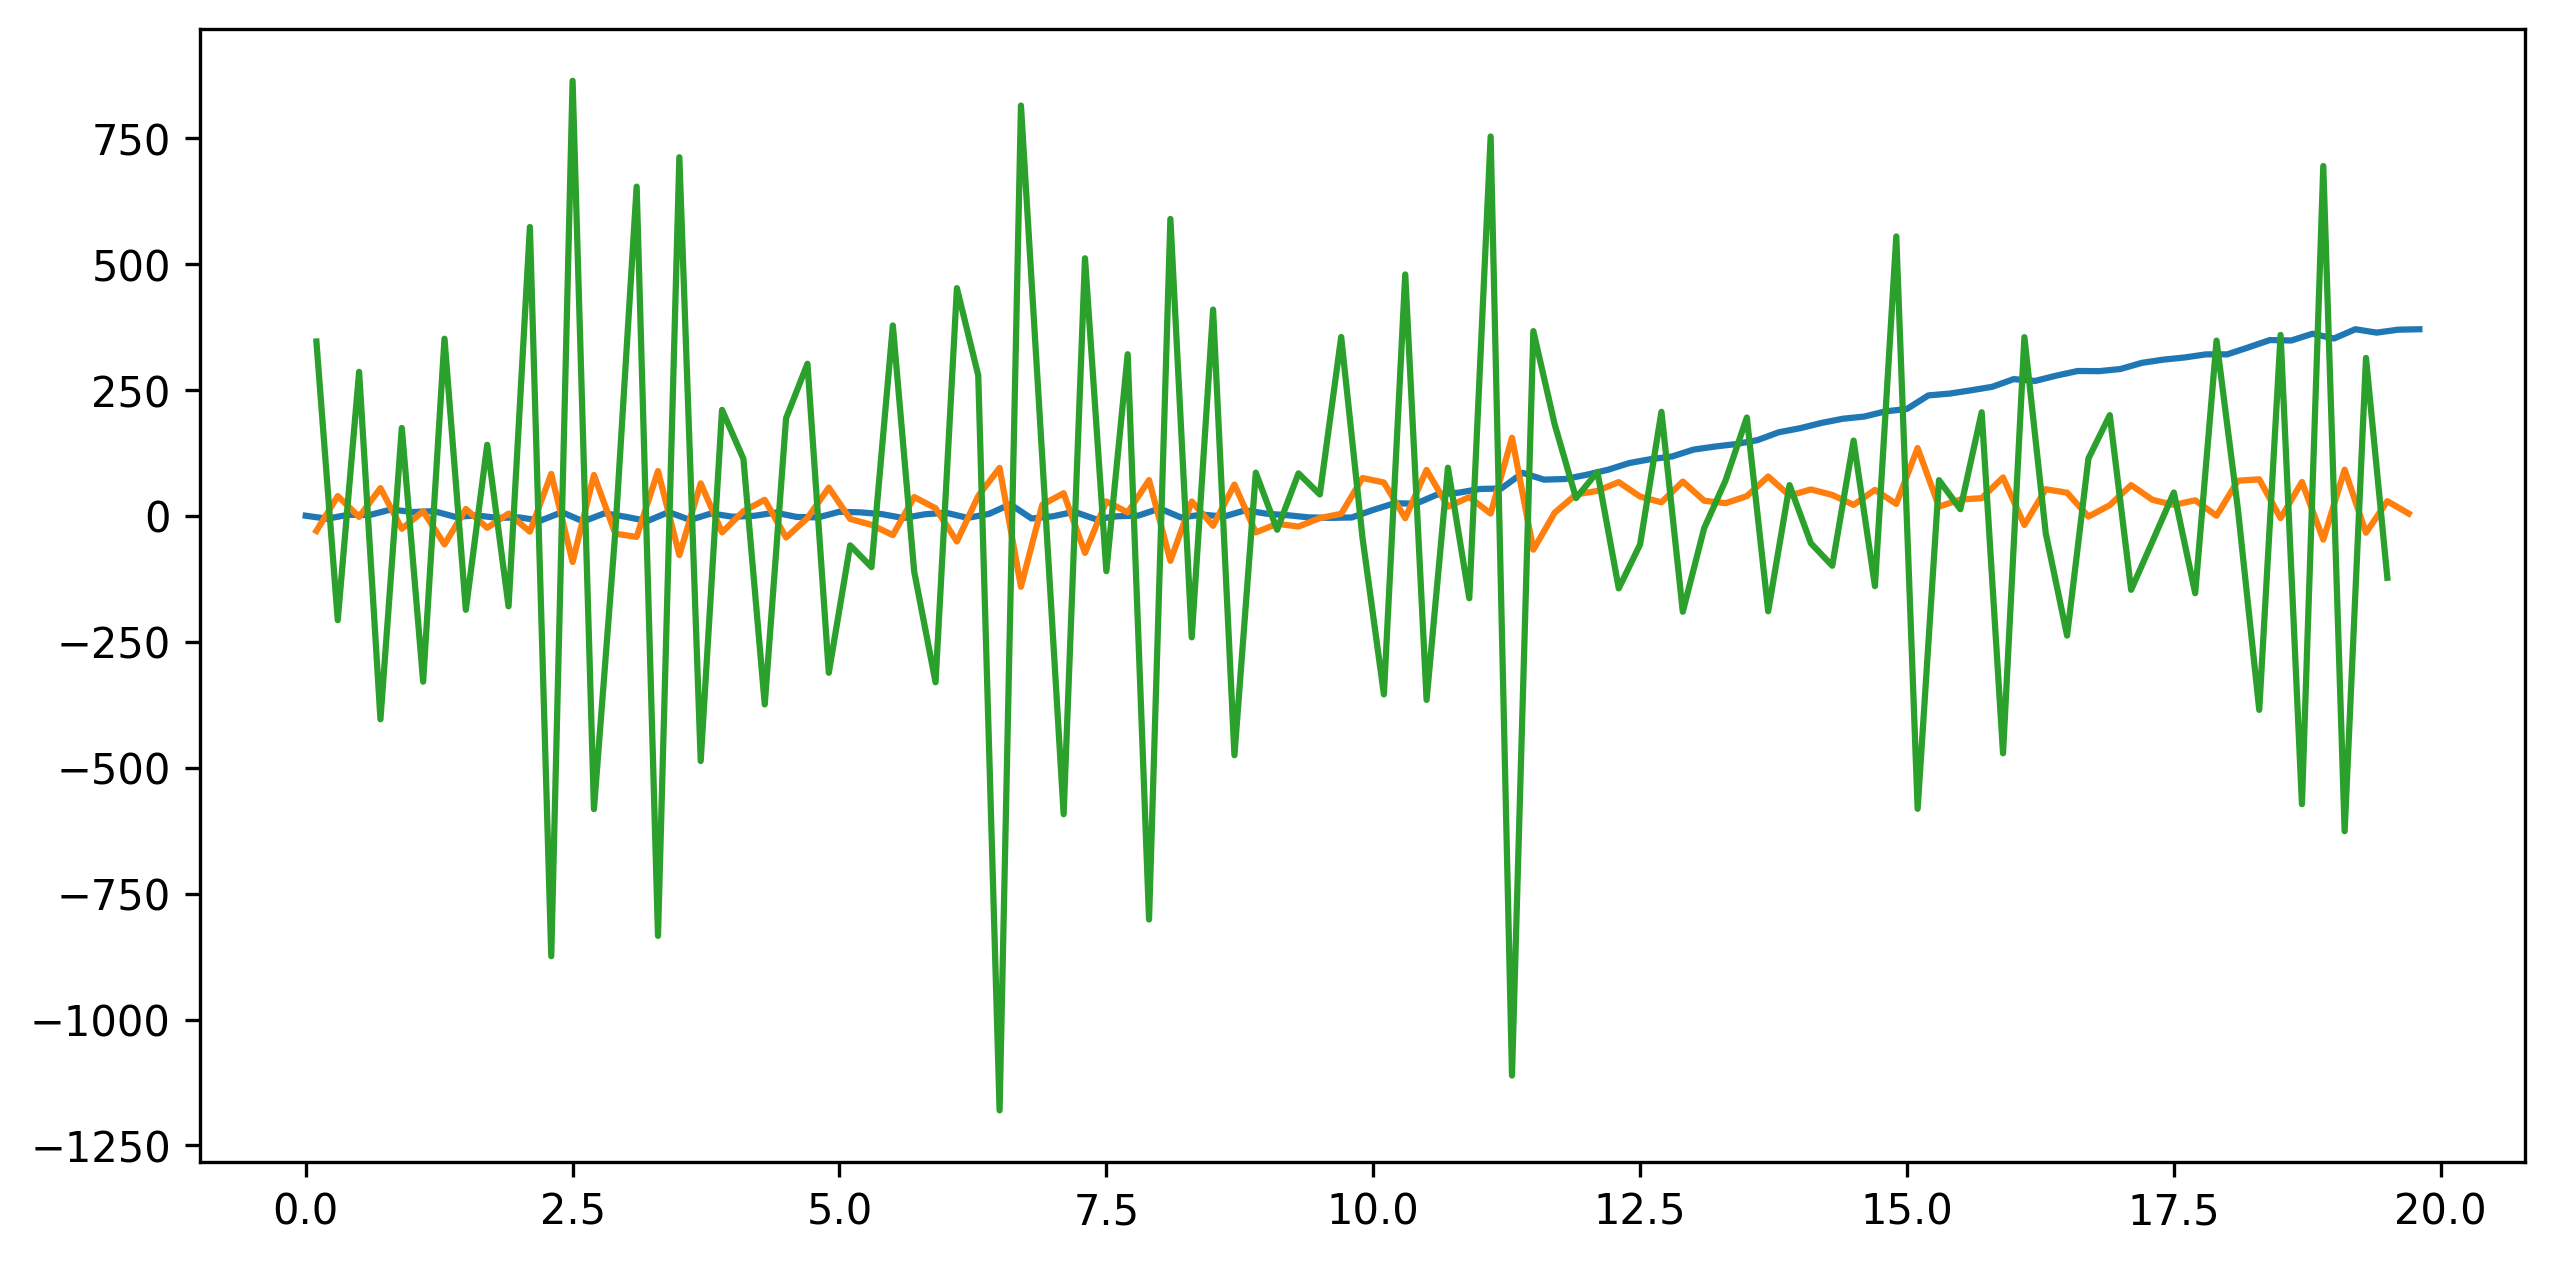

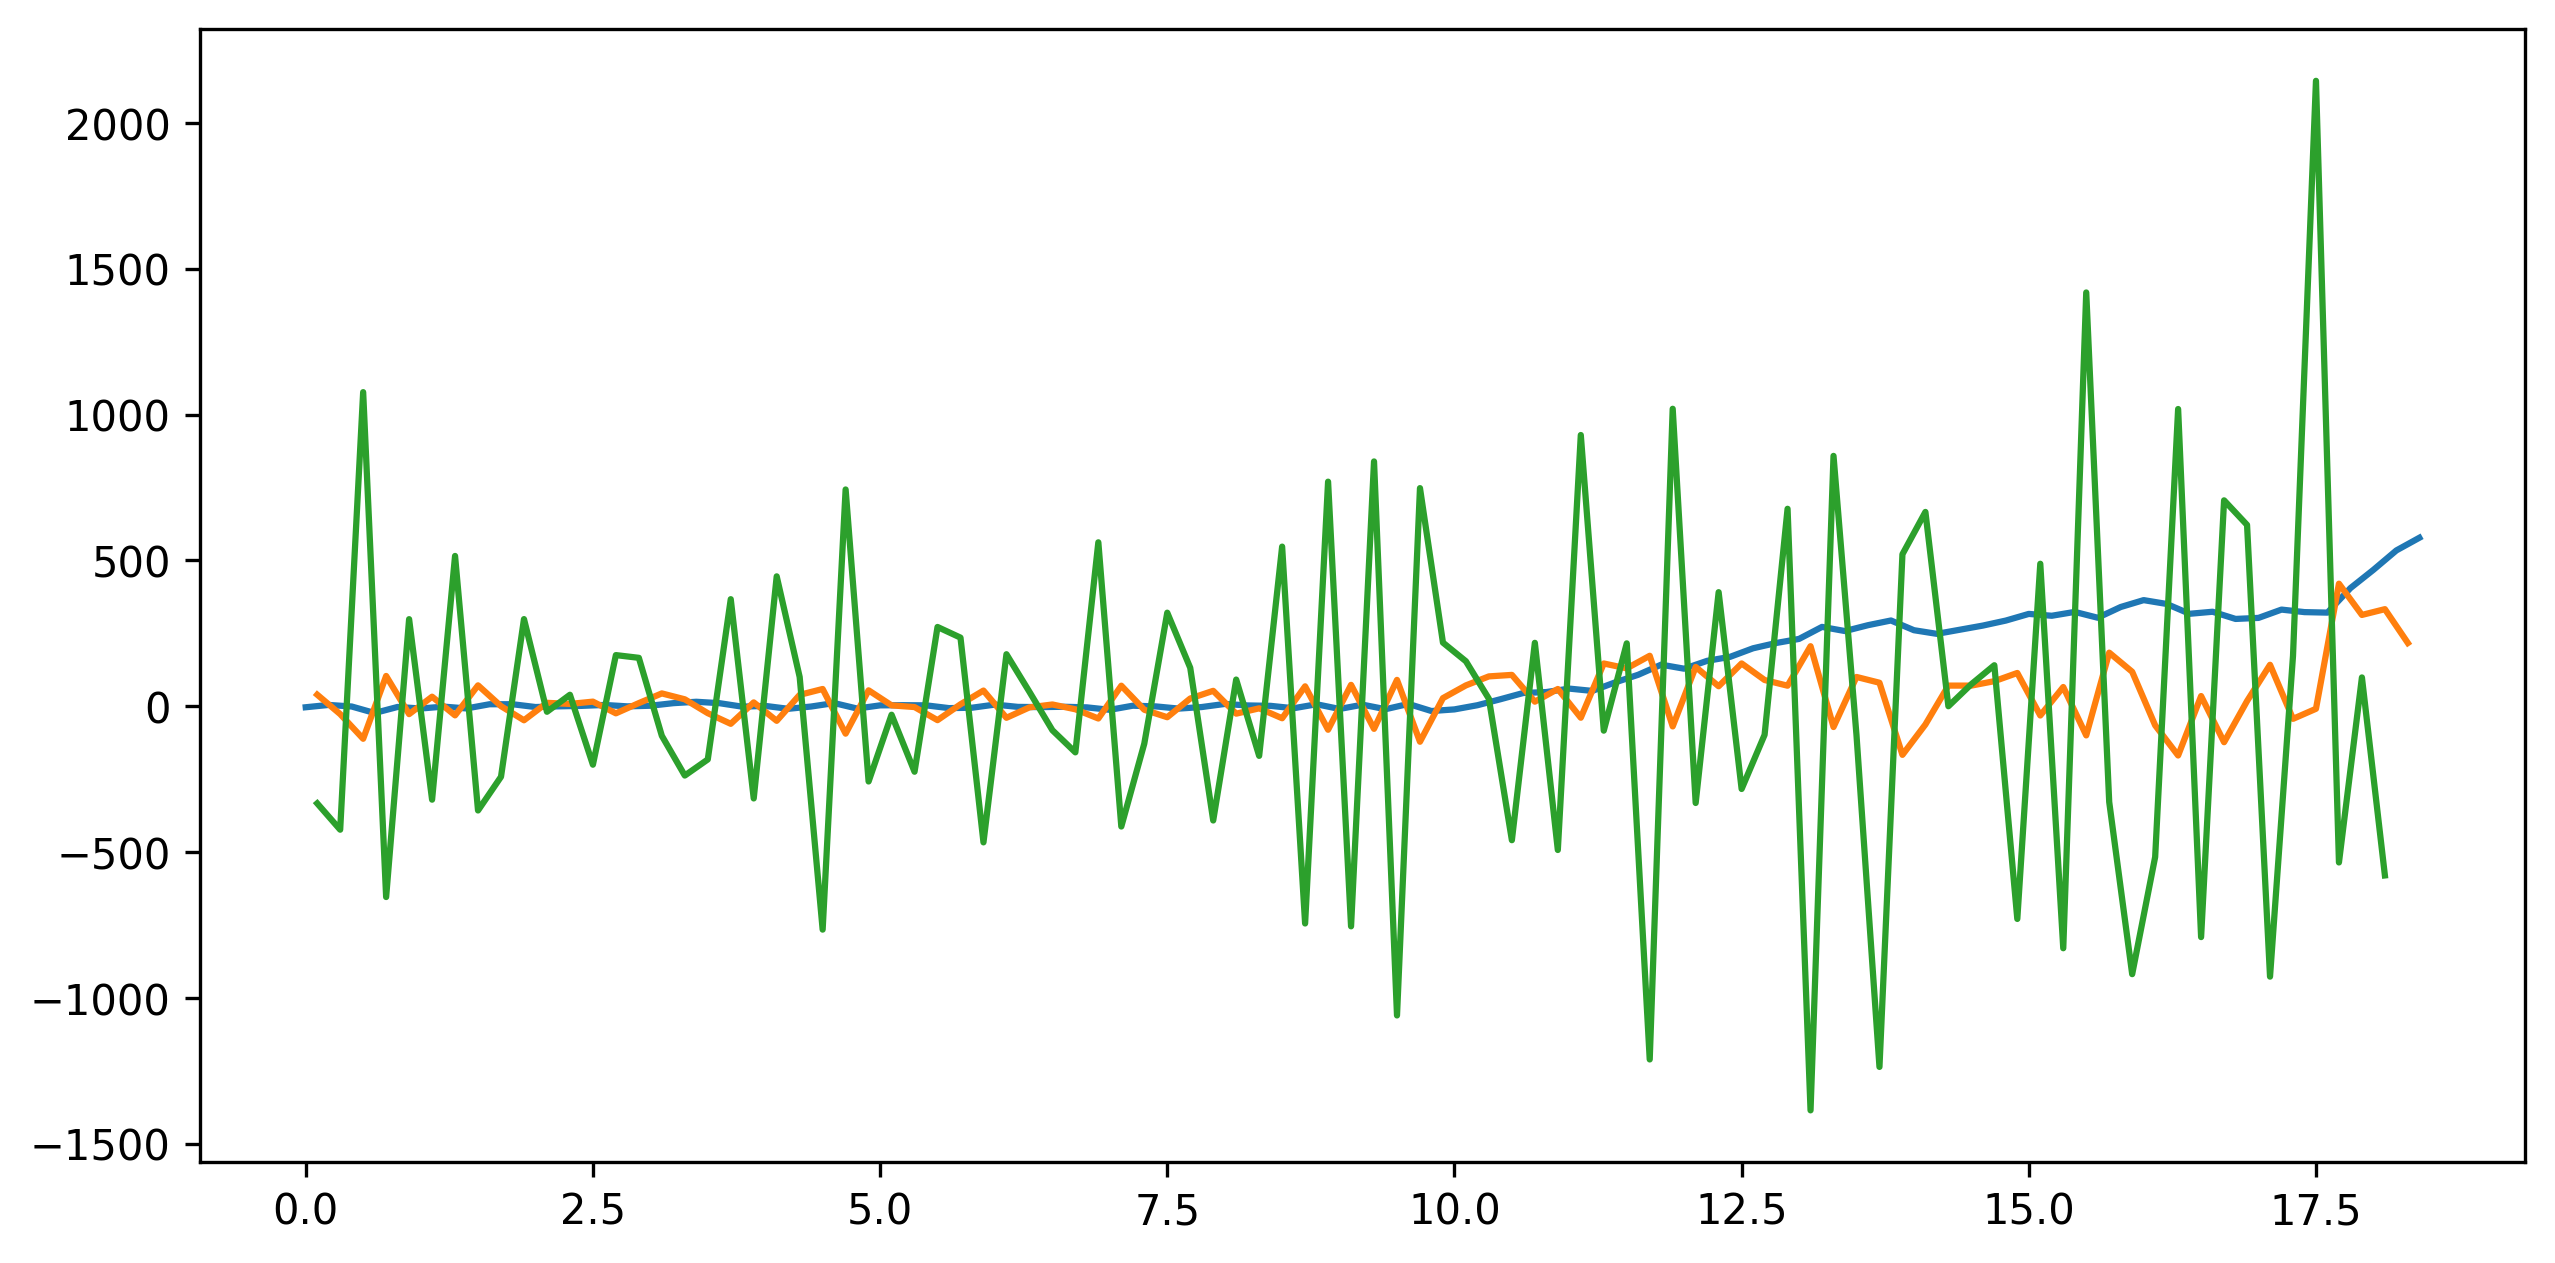

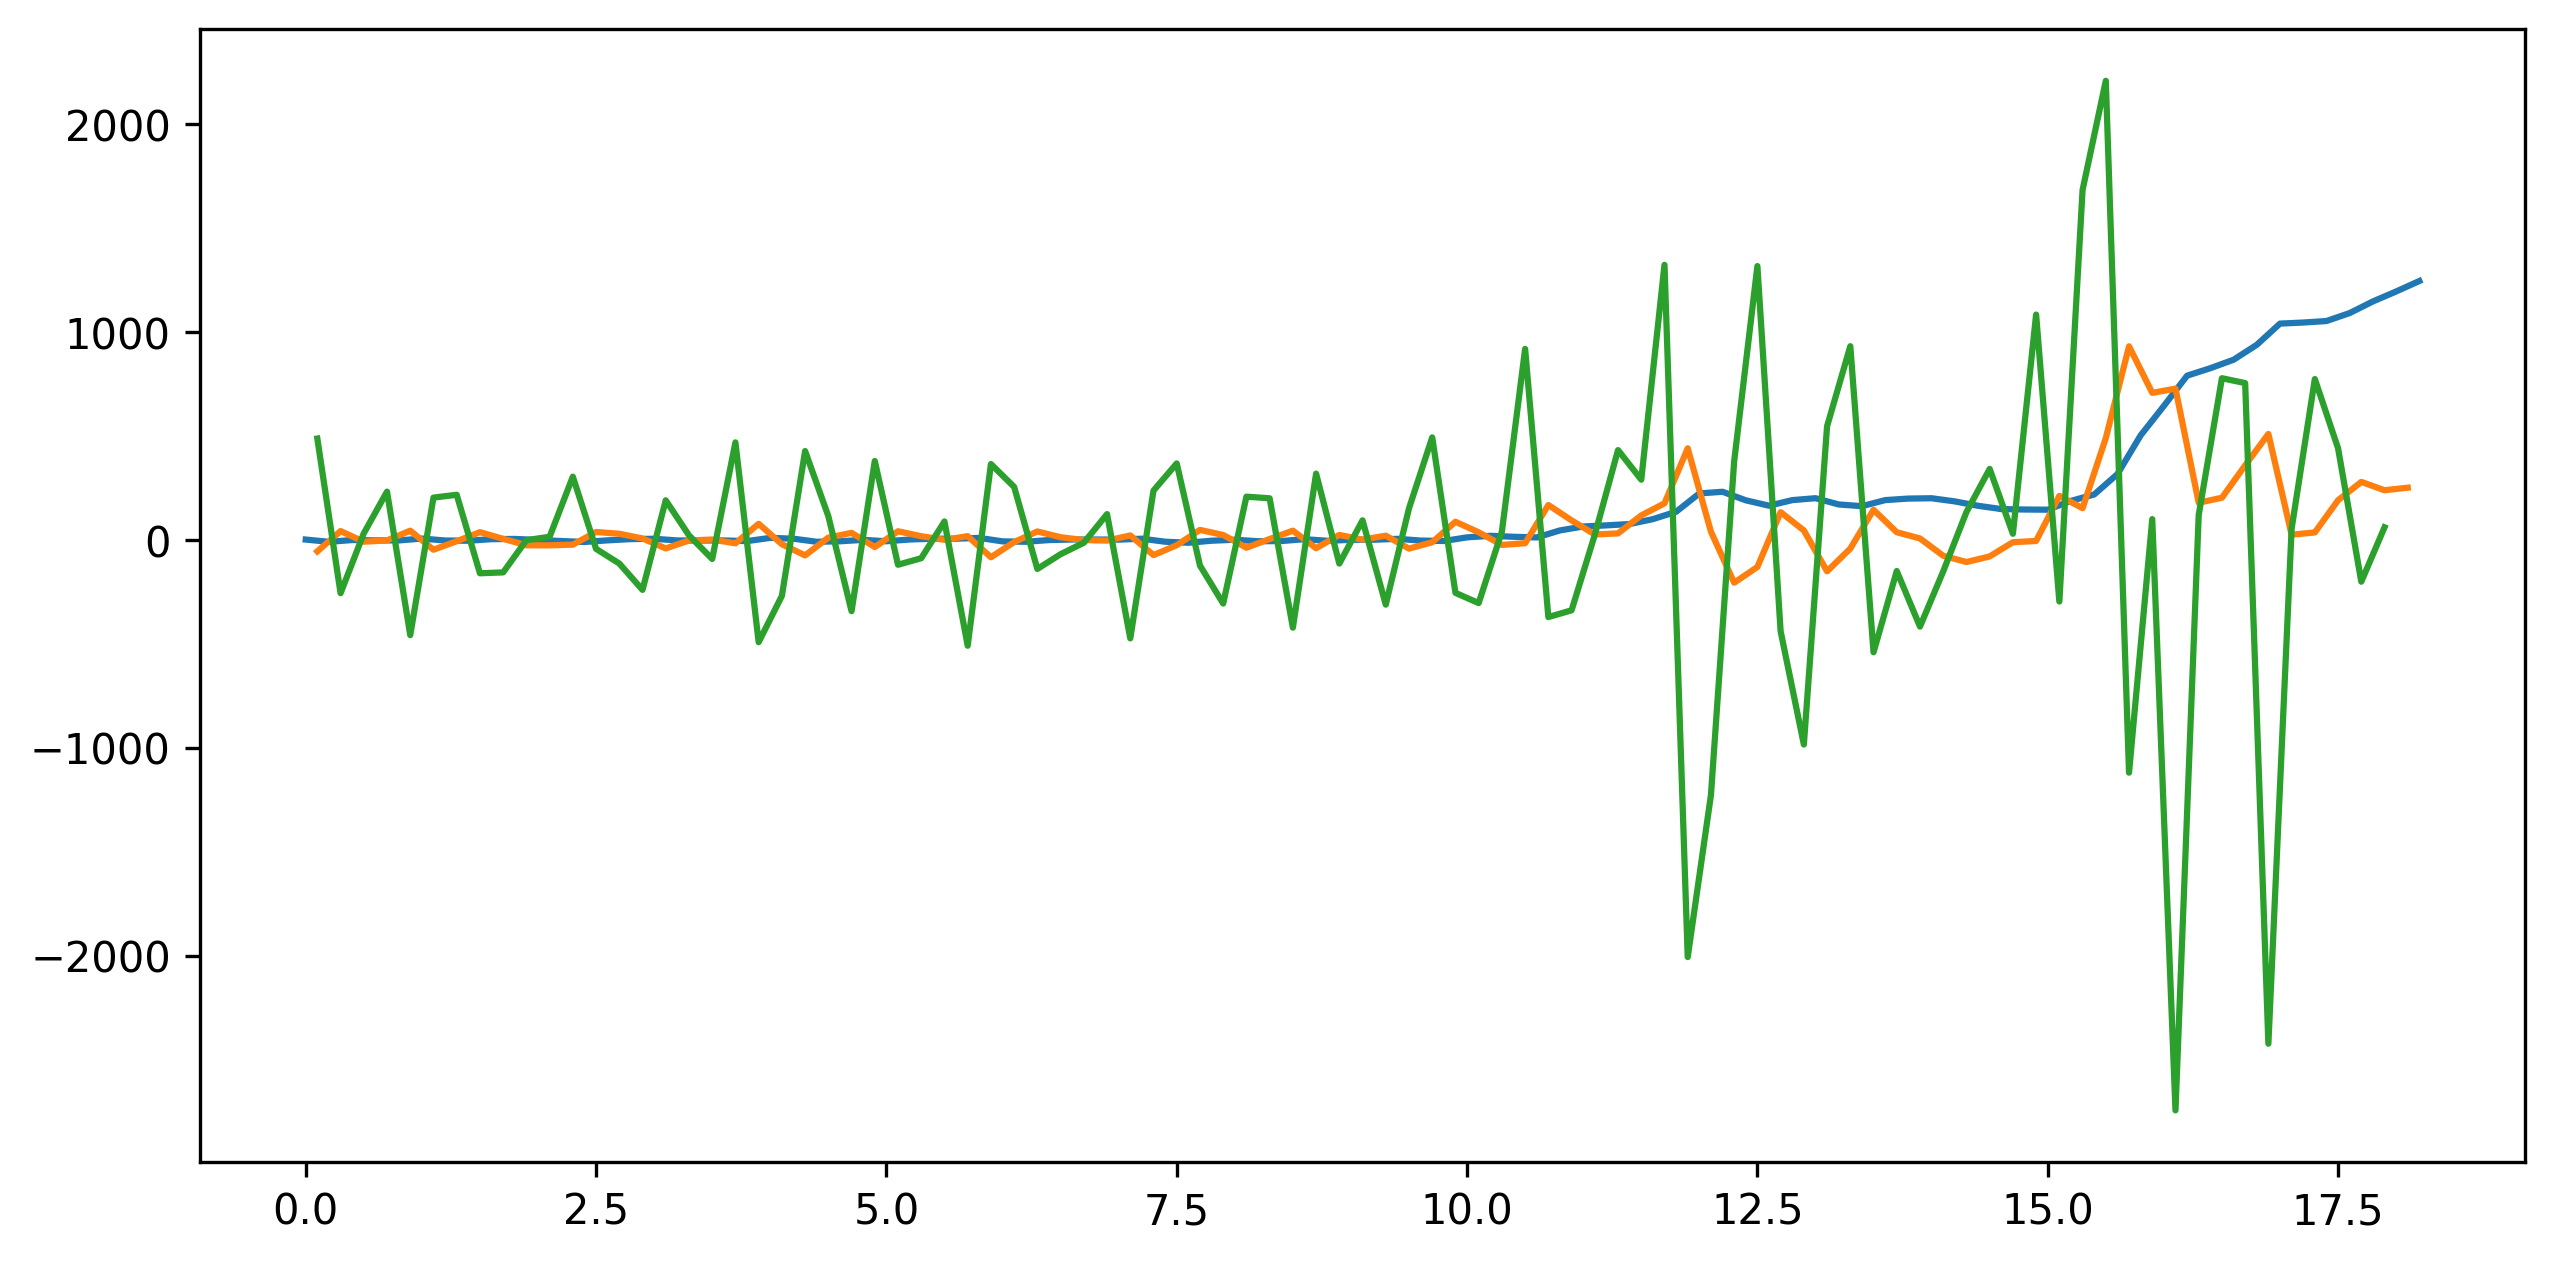

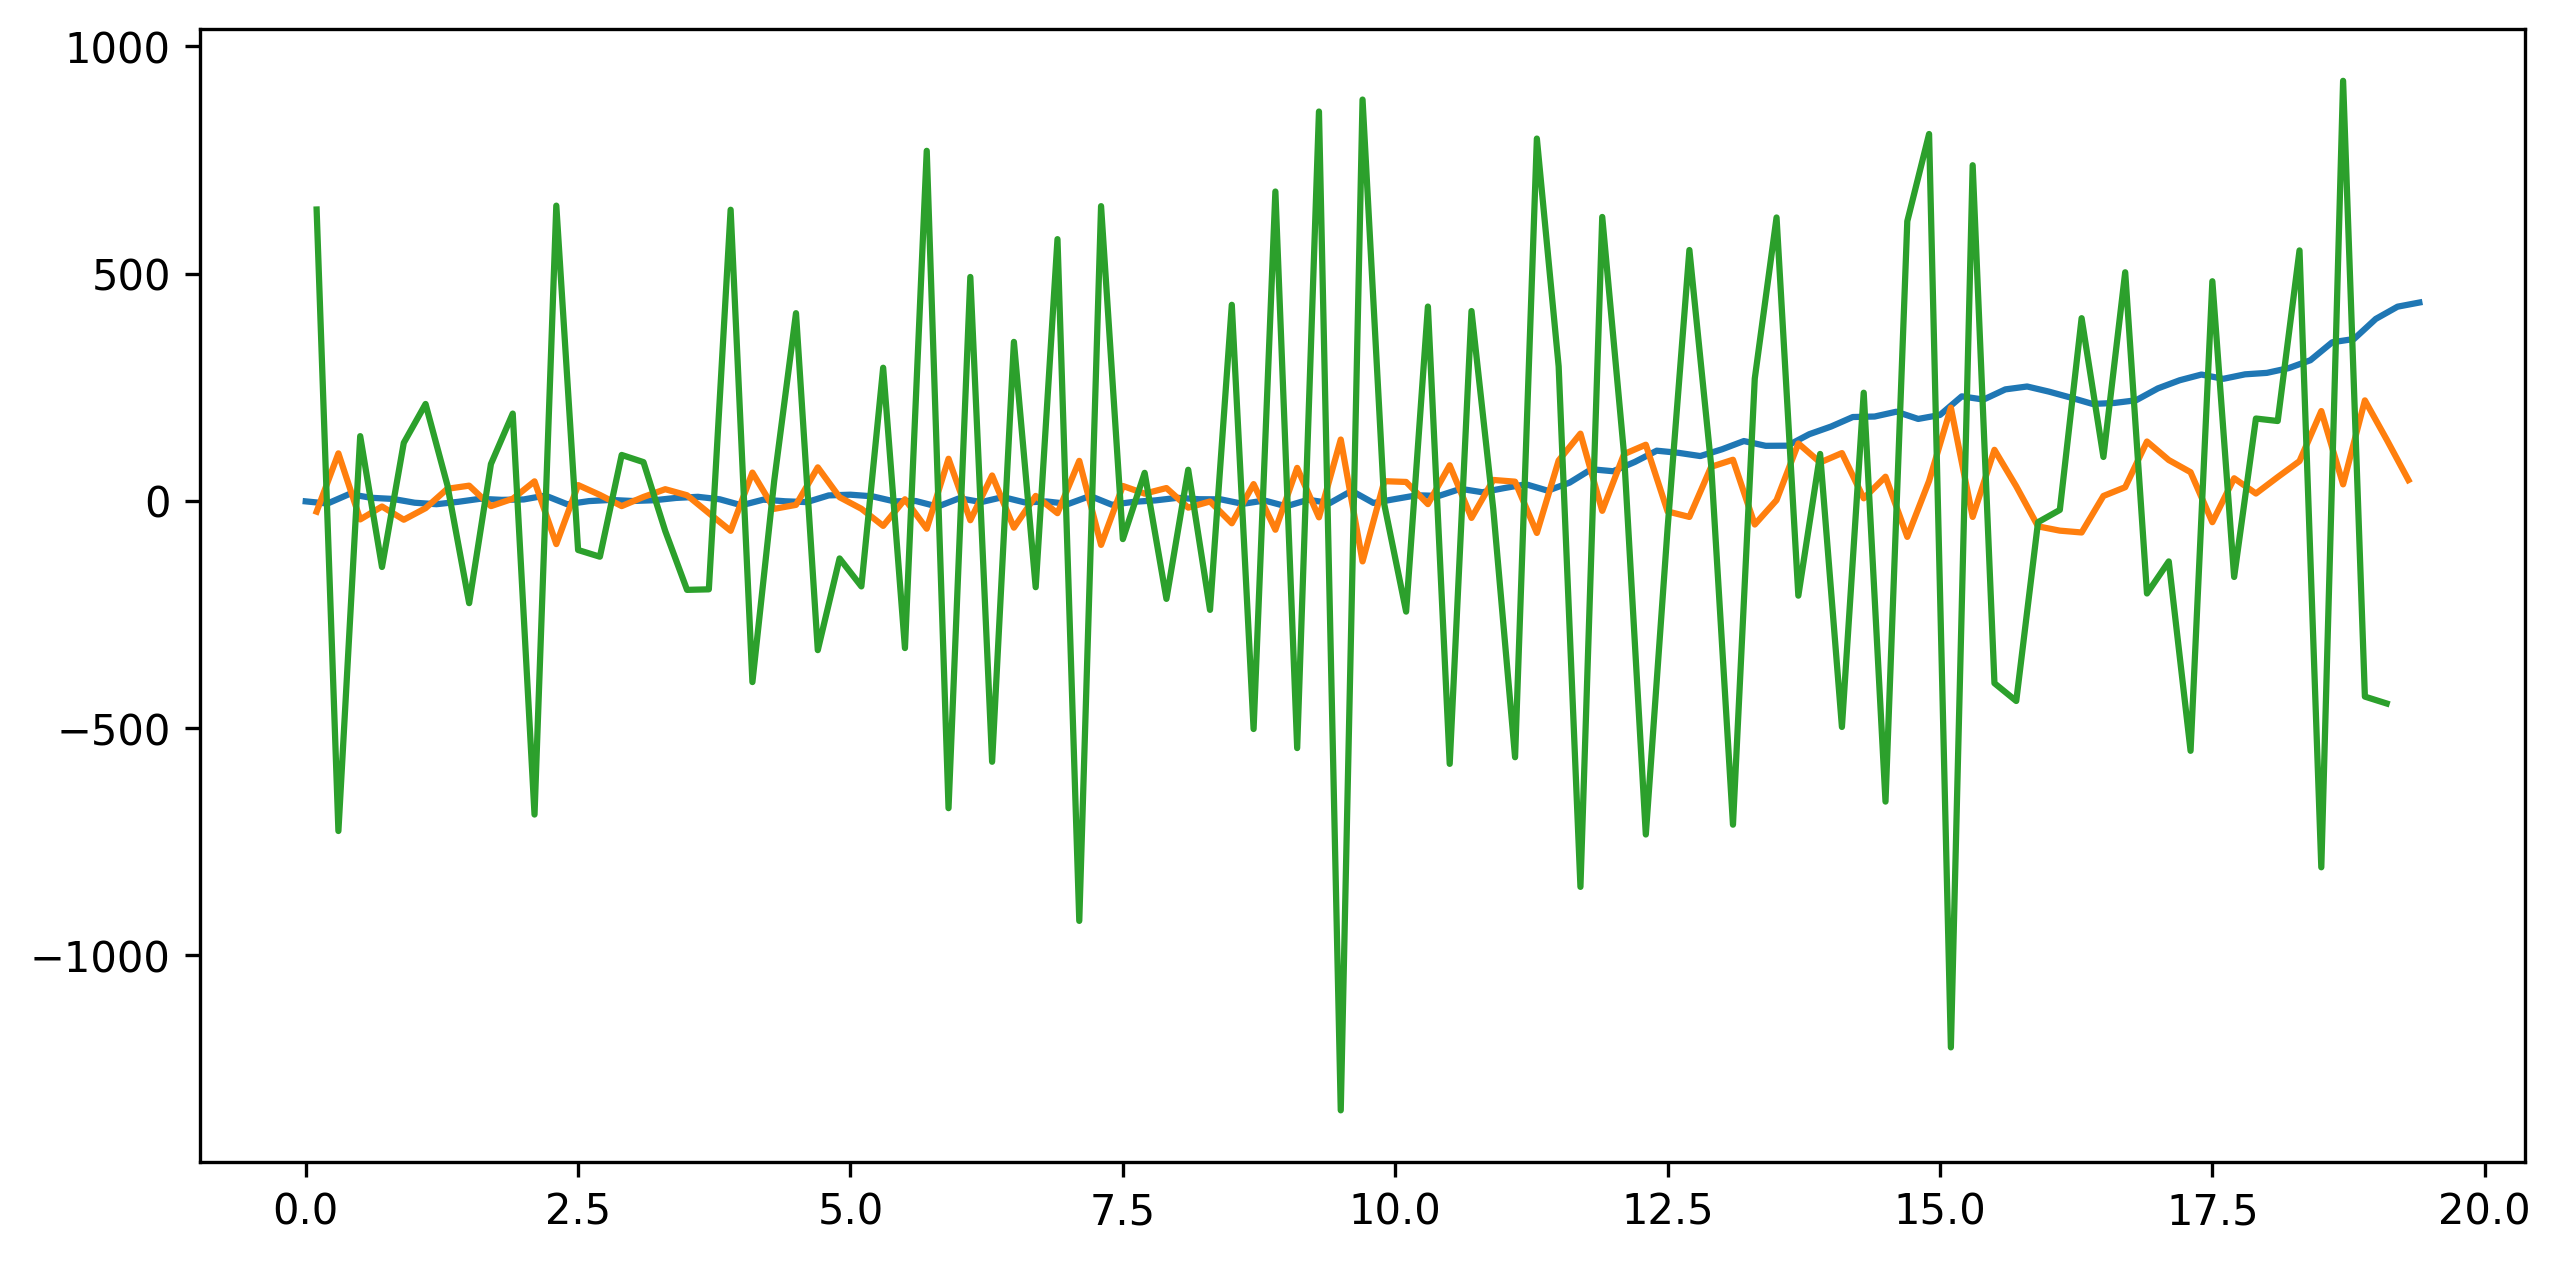

In [ ]:
#10HZ dop 5 trials per stim, 4 stims [0.00, 0.39, 1.00, 1.28]LV
Dop_10 = np.genfromtxt('./Experiment22022_5/220225_concentration_vs_time_data_10HzDop.csv', delimiter=',')[2:]
Dop_10_timing = Dop_10[:,0]
Dop_10 = Dop_10[:, 1:]
#print(Dop_10)
#print(len(Dop_10))
#print(len(Dop_10[0]))
#Time (s) | Amplitude (V) for each LV, 8 cols total.
Stim_10 = np.genfromtxt('./Experiment22022_5/220225_concentration_vs_time_data_10HzStim.csv', delimiter=',')[2:]
Stim_10_timing_000 = Stim_10[:,0]
#20HZ dop 5 trials per stim, 4 stims [0.00, 0.38, 1.01, 1.24]LV
Dop_20 = np.genfromtxt('./Experiment22022_5/220225_concentration_vs_time_data_20HzDop.csv', delimiter=',')[2:]
Dop_20_timing = Dop_20[:,0]
Dop_20 = Dop_20[:, 1:]
print(Dop_20.shape)
#Time (s) | Amplitude (V) for each LV, 8 cols total.
Stim_20 = np.genfromtxt('./Experiment22022_5/220225_concentration_vs_time_data_20HzStim.csv', delimiter=',')[2:]
#print(Dop_10)
#print(Dop_20[50:100,0])
#LV_10 = [0.00, 0.39, 1.00, 1.28]
#print('----------10Hz---------')
#for i in range(0, len(Dop_10[0])):
#    figure, graph = plt.subplots()
#    print(f'10Hz | LV: {LV_10[int(i/5)]} Trial: {i%5+1}')
#    graph.plot(Dop_10_timing[50:100], Dop_10[50:100,i], linewidth = .5)
#    plt.show()
#    
##AVG_20 = np.ones((len(Dop_20), 4))
##AVG_20[:,0] = np.sum(Dop_20[:, 0:5])/5
##print(AVG_20[:,0])
LV_20 = [0.00, 0.38, 1.01, 1.24]
LV_10 = [0.00, 0.39, 1.00, 1.28]
#print('----------20Hz---------')
#for i in range(0, len(Dop_20[0])):
#    figure, graph = plt.subplots()
#    print(f'20Hz | LV: {LV_20[int(i/5)]} Trial: {i%5+1}')
#    graph.plot(Dop_20_timing[50:151], Dop_20[50:151,i], linewidth = .5)
#    
#    plt.show()
#DopAvg = []
#for i in range(0, 4):
#    x = np.zeros(len(Dop_20[:,i]))
#    for j in range(0,5):
#        x += Dop_20[:,i*4 + j]
#    DopAvg.append(x/5)
#print(len(DopAvg))



DopAvg = []
for i in range(0, 4):
    x = np.zeros(len(Dop_20[:,i]))
    for j in range(0,5):
        x += Dop_20[:,i*5 + j]
    DopAvg.append(x/5)

DopAvg = np.array(DopAvg)

for i in range(4):
    maxPos = np.argmax(DopAvg[i])
    max0 = np.max(DopAvg[i])
    time, forward_diffArr = forward_difference(DopAvg[i, 0:maxPos])
    time2, scd_arr = second_central_difference(DopAvg[i, 0:maxPos])

    figure, graph = plt.subplots()
    graph.plot(Dop_10_timing[0:maxPos], DopAvg[i, 0:maxPos])
    graph.plot(time, forward_diffArr)
    graph.plot(time2, scd_arr)
    plt.show()



#tar = 4
#time_compressed = []
#t_c = []
#errX_TOT = []
#errY_TOT = []
#for i in range(len(DopAvg)):
#    time_comp_s = []
#    #ER_xS = []
#    #ER_S = []
#    for j in range(len(DopAvg[i])):
#        #if np.argmax(DopAvg[i] == j):
#        #    ER_xS.append(Dop_20_timing[j])
#        #    ER_S.append(DopAvg[i][j])
#        if j%tar == 0:
#            if len(t_c) < len(DopAvg[i])/tar:
#                t_c.append(Dop_10_timing[j])
#            time_comp_s.append(DopAvg[i][j])
#       # if j%(10*tar) == 0:
#           # ER_xS.append(Dop_20_timing[j])
#           # ER_S.append(DopAvg[i][j])
#    errX_TOT.append(np.argmax(DopAvg[i])/5)
#    errY_TOT.append(np.max(DopAvg[i]))
#    time_compressed.append(time_comp_s)
#    
#
#for i in range(len(time_compressed)):
#    y_err = np.std(time_compressed[i])
#    graph.errorbar(t_c, time_compressed[i], yerr = y_err)
#    graph.set_title(f'Aggregate Average Concentration, 1x/sec')
#    graph.set_xlabel('time (s)')
#    graph.set_ylabel('Dopamine Concentration (nM)')
#plt.legend(LV_20)
#plt.show()
#
#
#for i in range(len(time_compressed)):
#    figure, graph = plt.subplots()
#    graph.plot(t_c[0:100], time_compressed[i][100])
#    graph.set_title(f'LV: {LV_20[i]}, Average Concentration')
#    graph.set_xlabel('time (s)')
#    graph.set_ylabel('Dopamine Concentration (nM)')
#    plt.show()
#
#
#figure, graph = plt.subplots()
#print(len(DopAvg))
#
#
#for i in range(len(DopAvg)):
#    graph.plot(Dop_10_timing[0:250], DopAvg[i][0:250])
#    y_err = np.std(DopAvg[i])
#    graph.errorbar(errX_TOT[i], errY_TOT[i], yerr = y_err, color = 'black', ecolor = 'black', elinewidth = 1, fmt = 'o', capsize = 3, capthick = 1,  )
#    #graph.errorbar(Dop_20_timing[0:250], DopAvg[i][0:250], errorevery = 50, yerr = y_err, elinewidth = 2, capsize = 3, capthick = 1,  )
#    graph.set_title(f'Aggregate Average Concentration 2/25')
#    graph.set_xlabel('time (s)')
#    graph.set_ylabel('Dopamine Concentration (nM)')
#plt.legend(LV_10)
#plt.savefig('./Graphs_exp/2-25_10hz_max_SD.png', bbox_inches='tight')
#plt.show()
#    
#
#for i in range(len(DopAvg)):
#    #print(f'LV: {LV_20[i]}, Stats: {print_dop_stats(DopAvg[i])})
#    figure, graph = plt.subplots()
#    graph.plot(Dop_20_timing, DopAvg[i])
#    graph.set_title(f'LV: {LV_20[i]}, Average Concentration')
#    graph.set_xlabel('time (s)')
#    graph.set_ylabel('Dopamine Concentration (nM)')
#    plt.show()
#    
##graph.plot(Stim_10_timing_000, Stim_10[:, 1])


# Experiment 3/28, with then without normalization

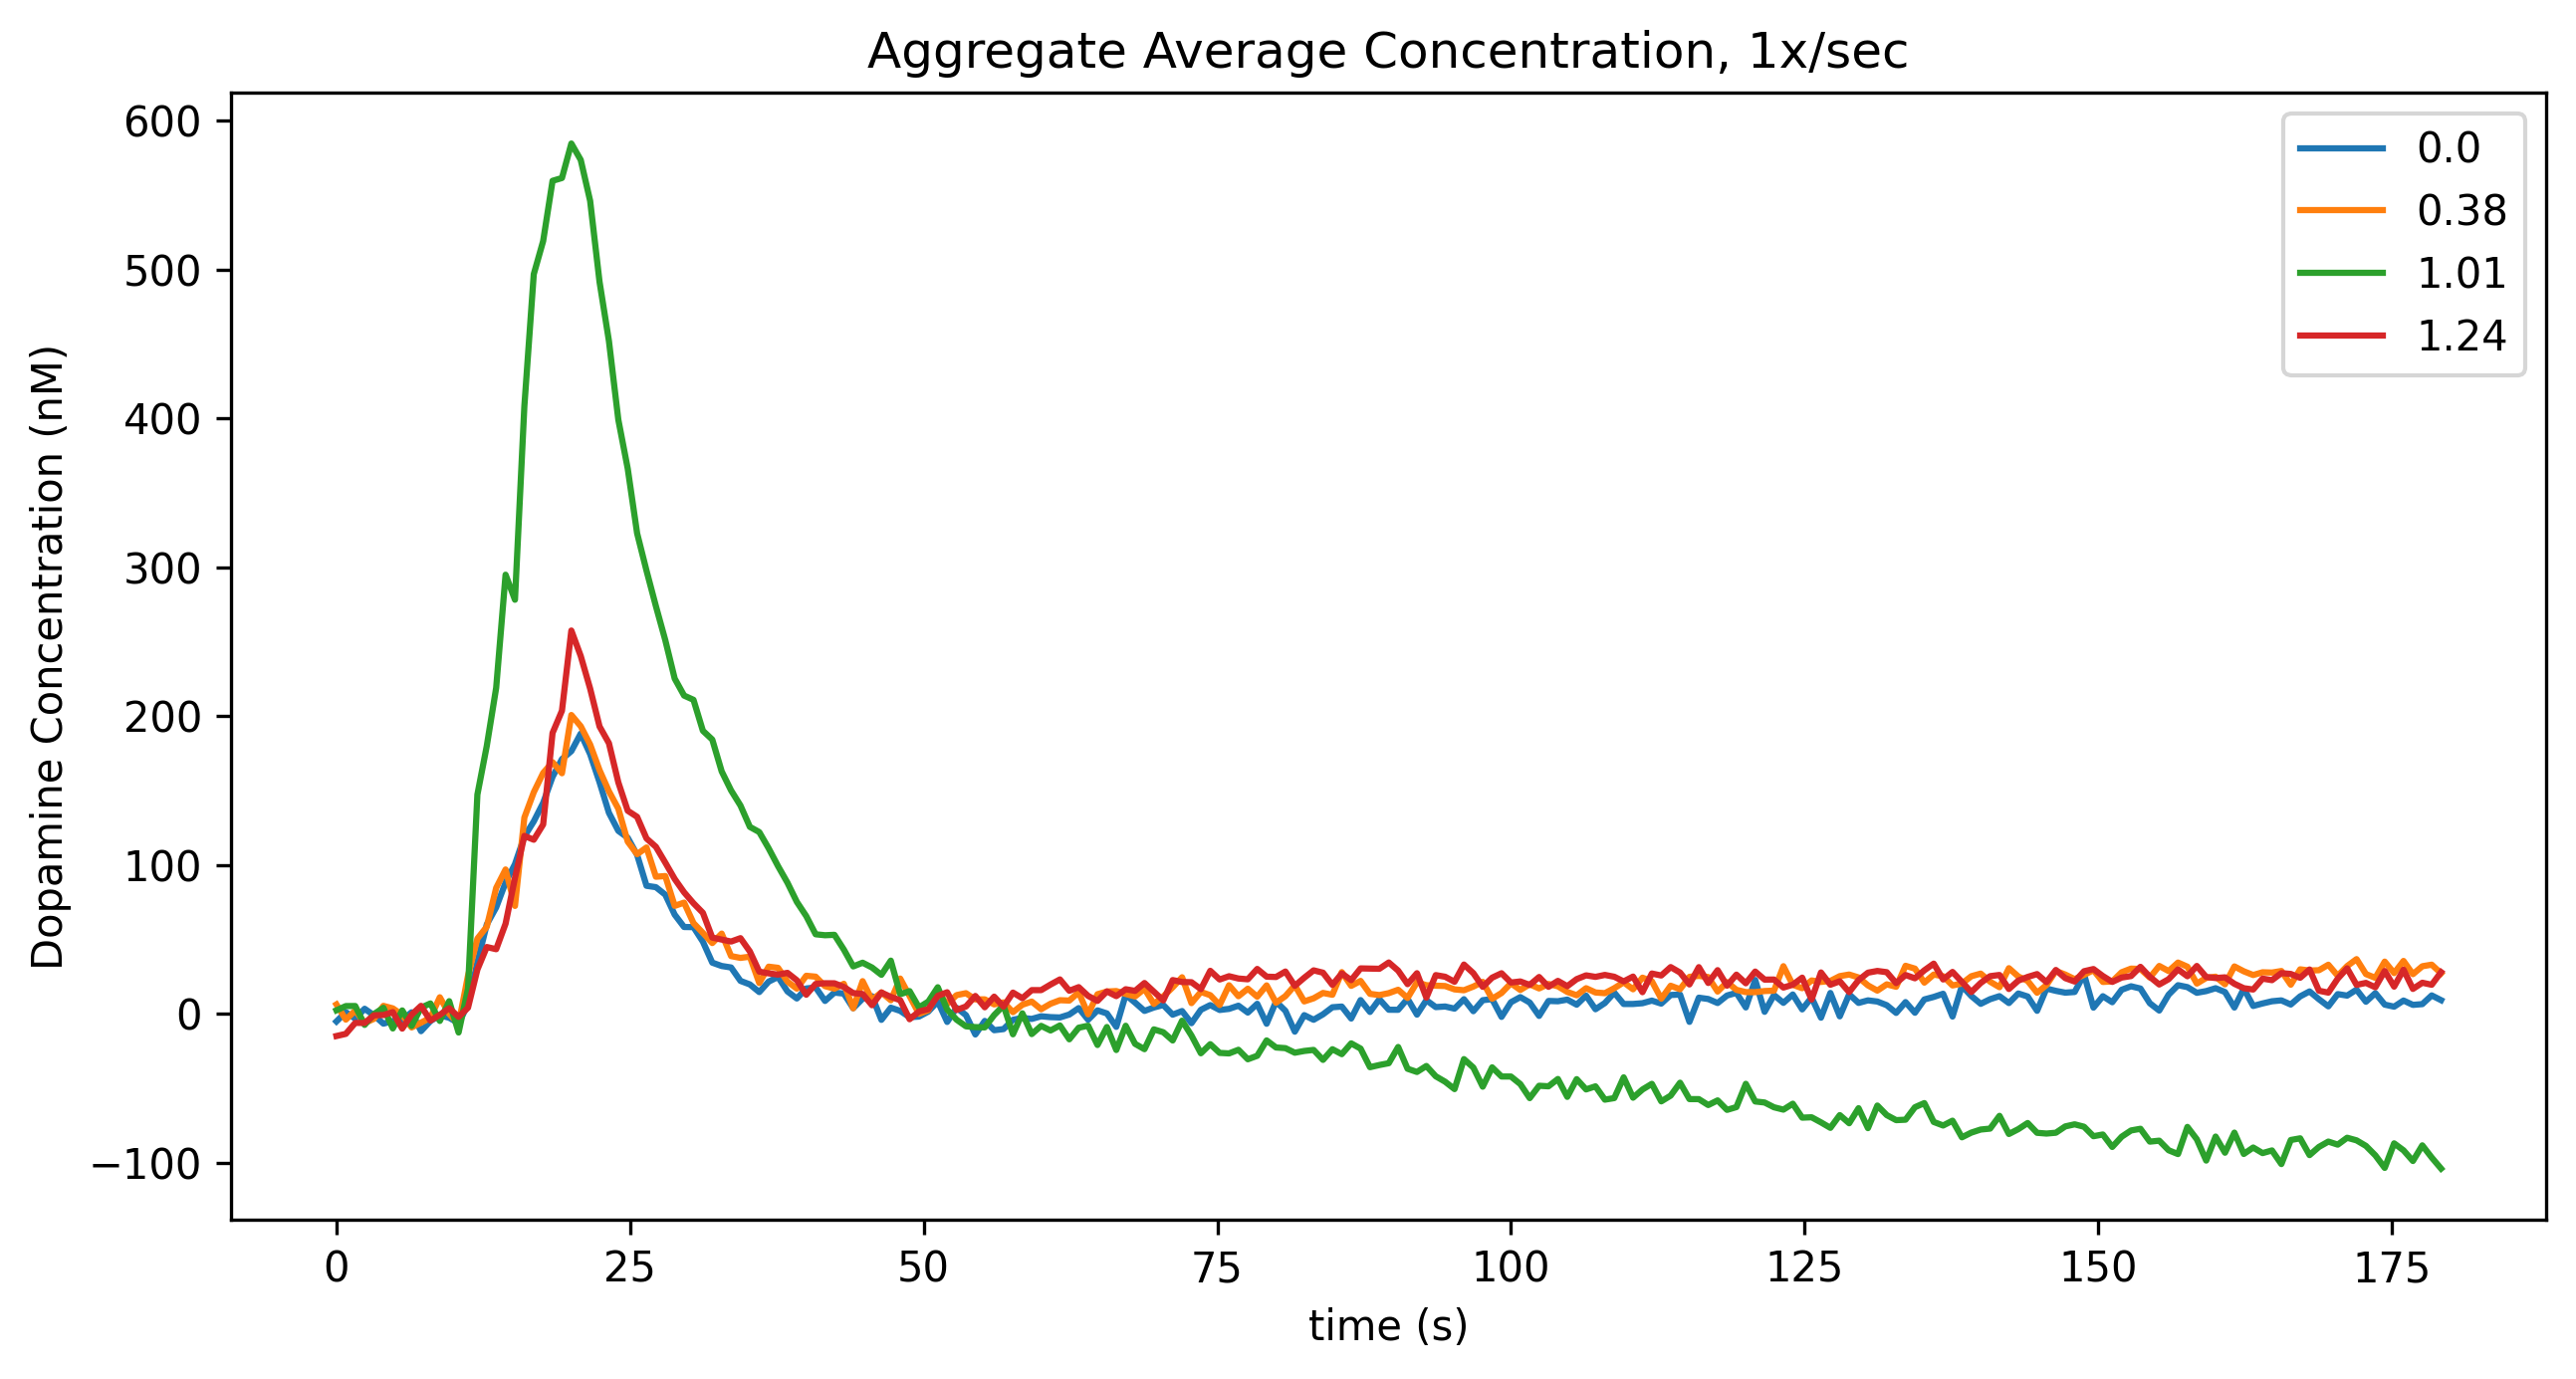

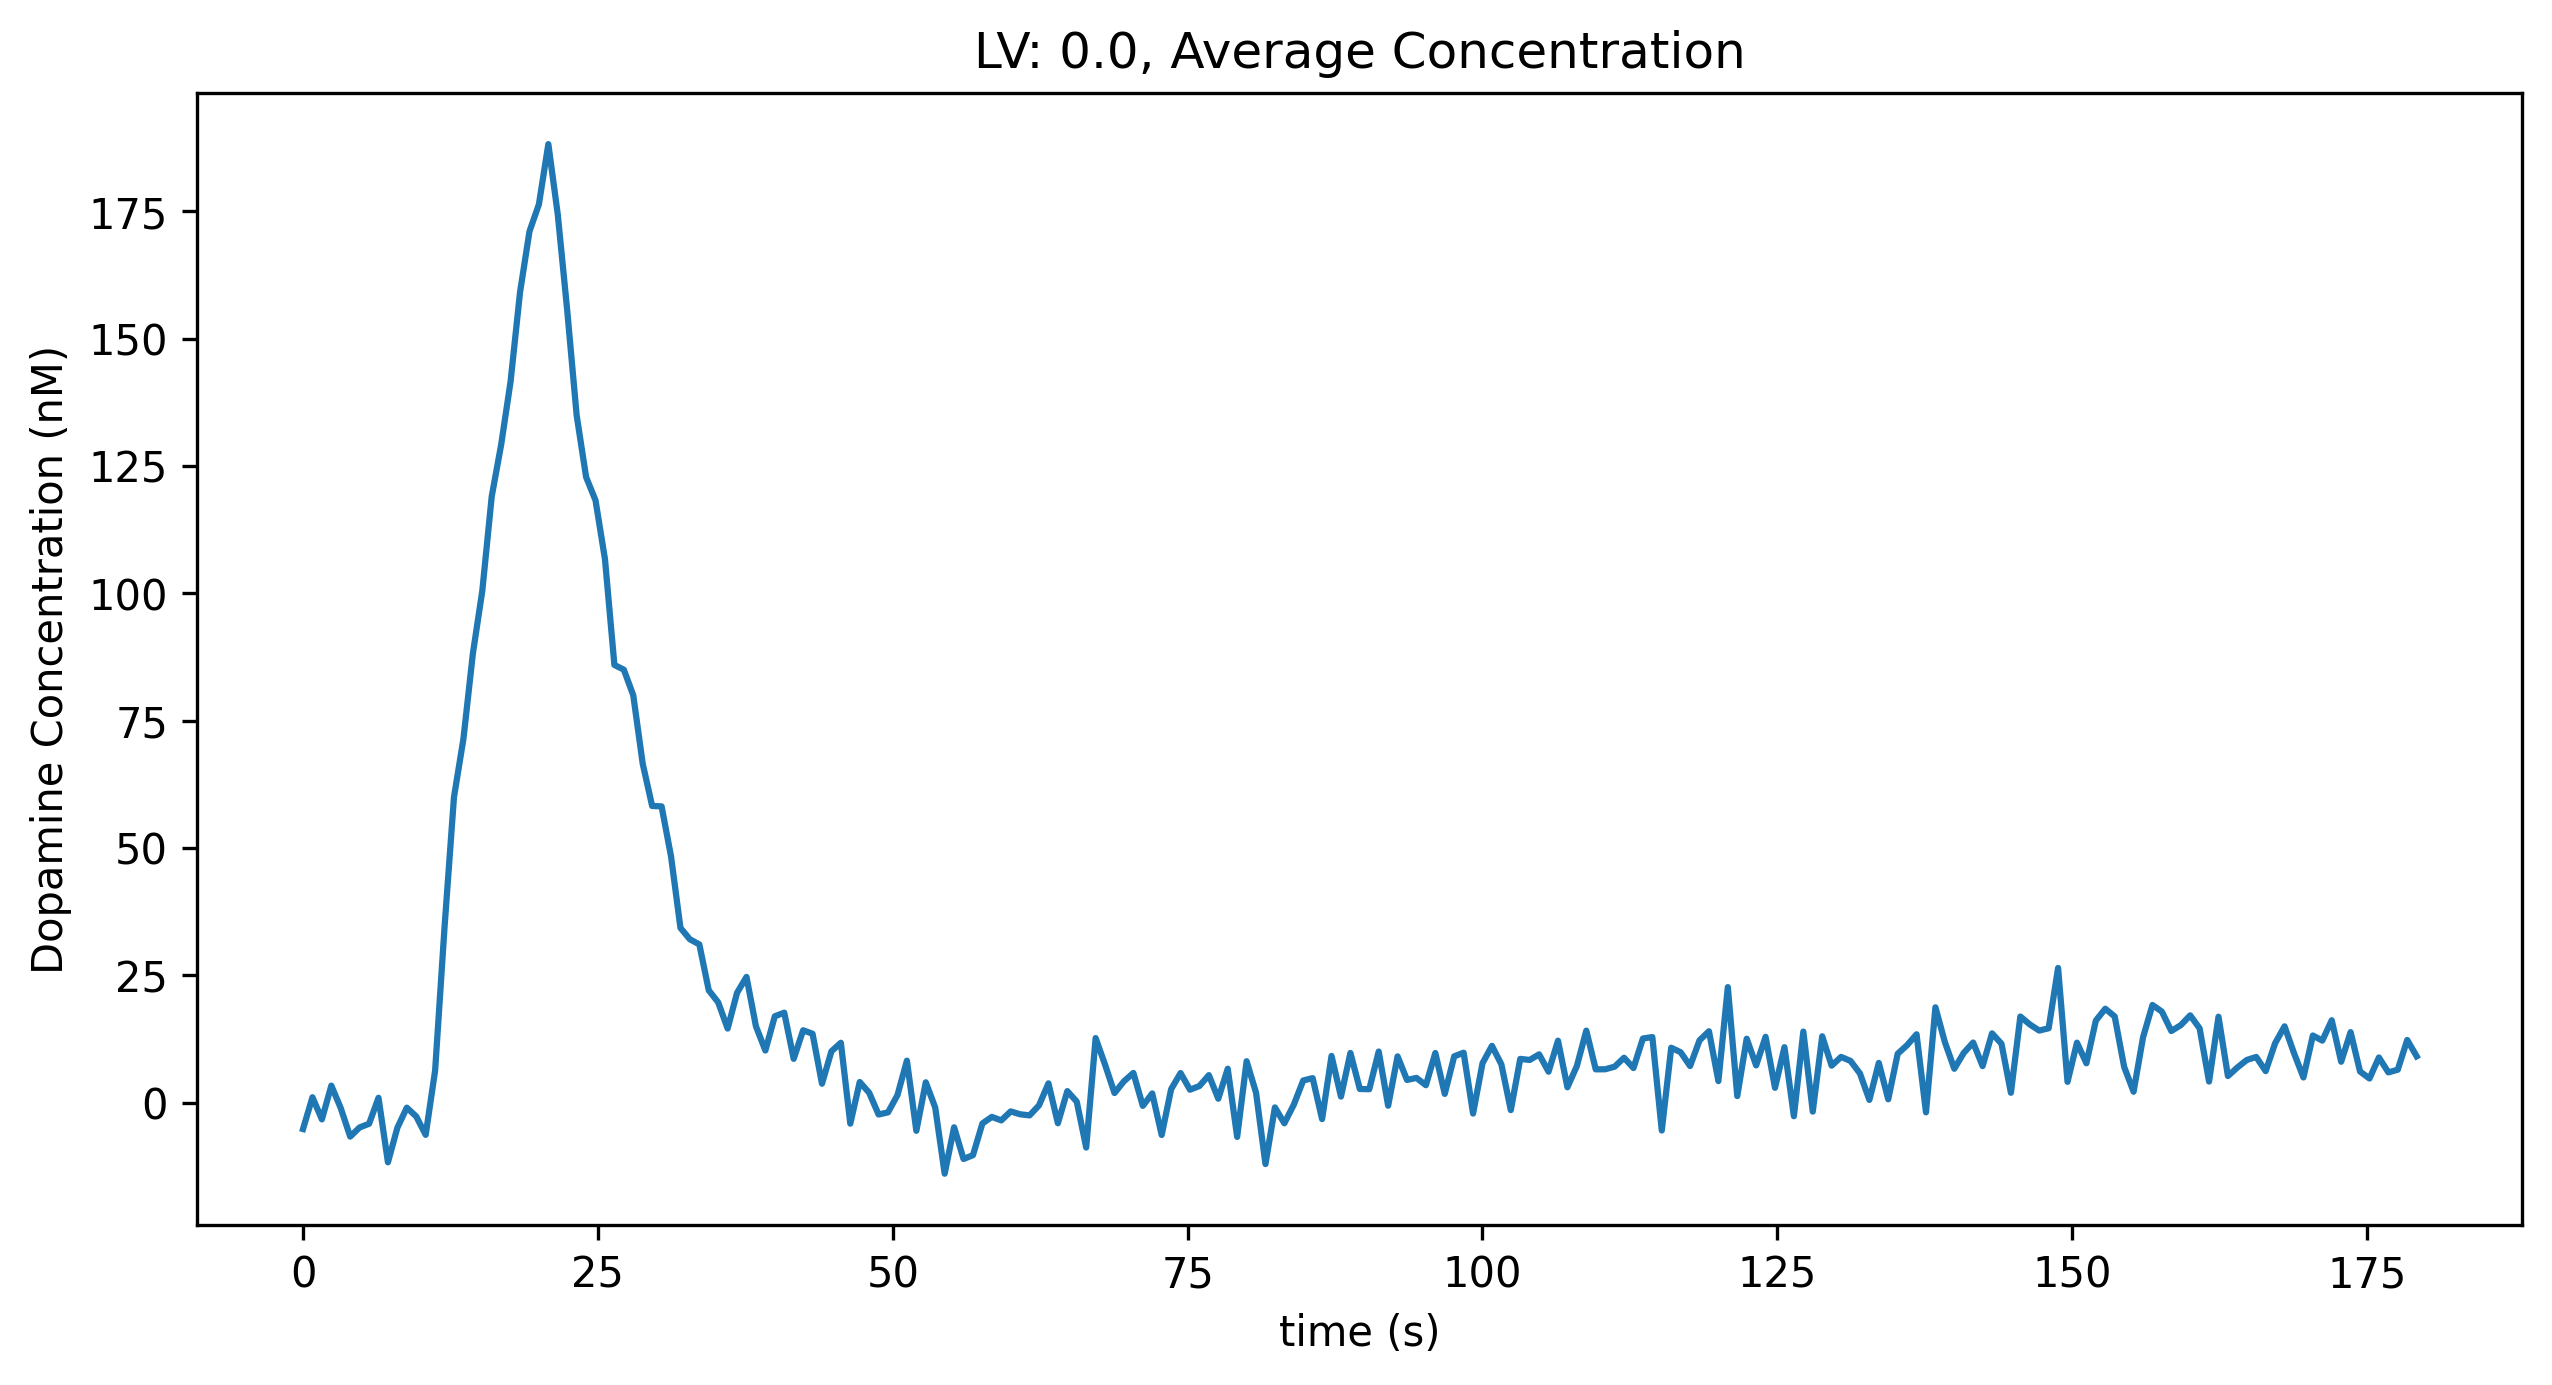

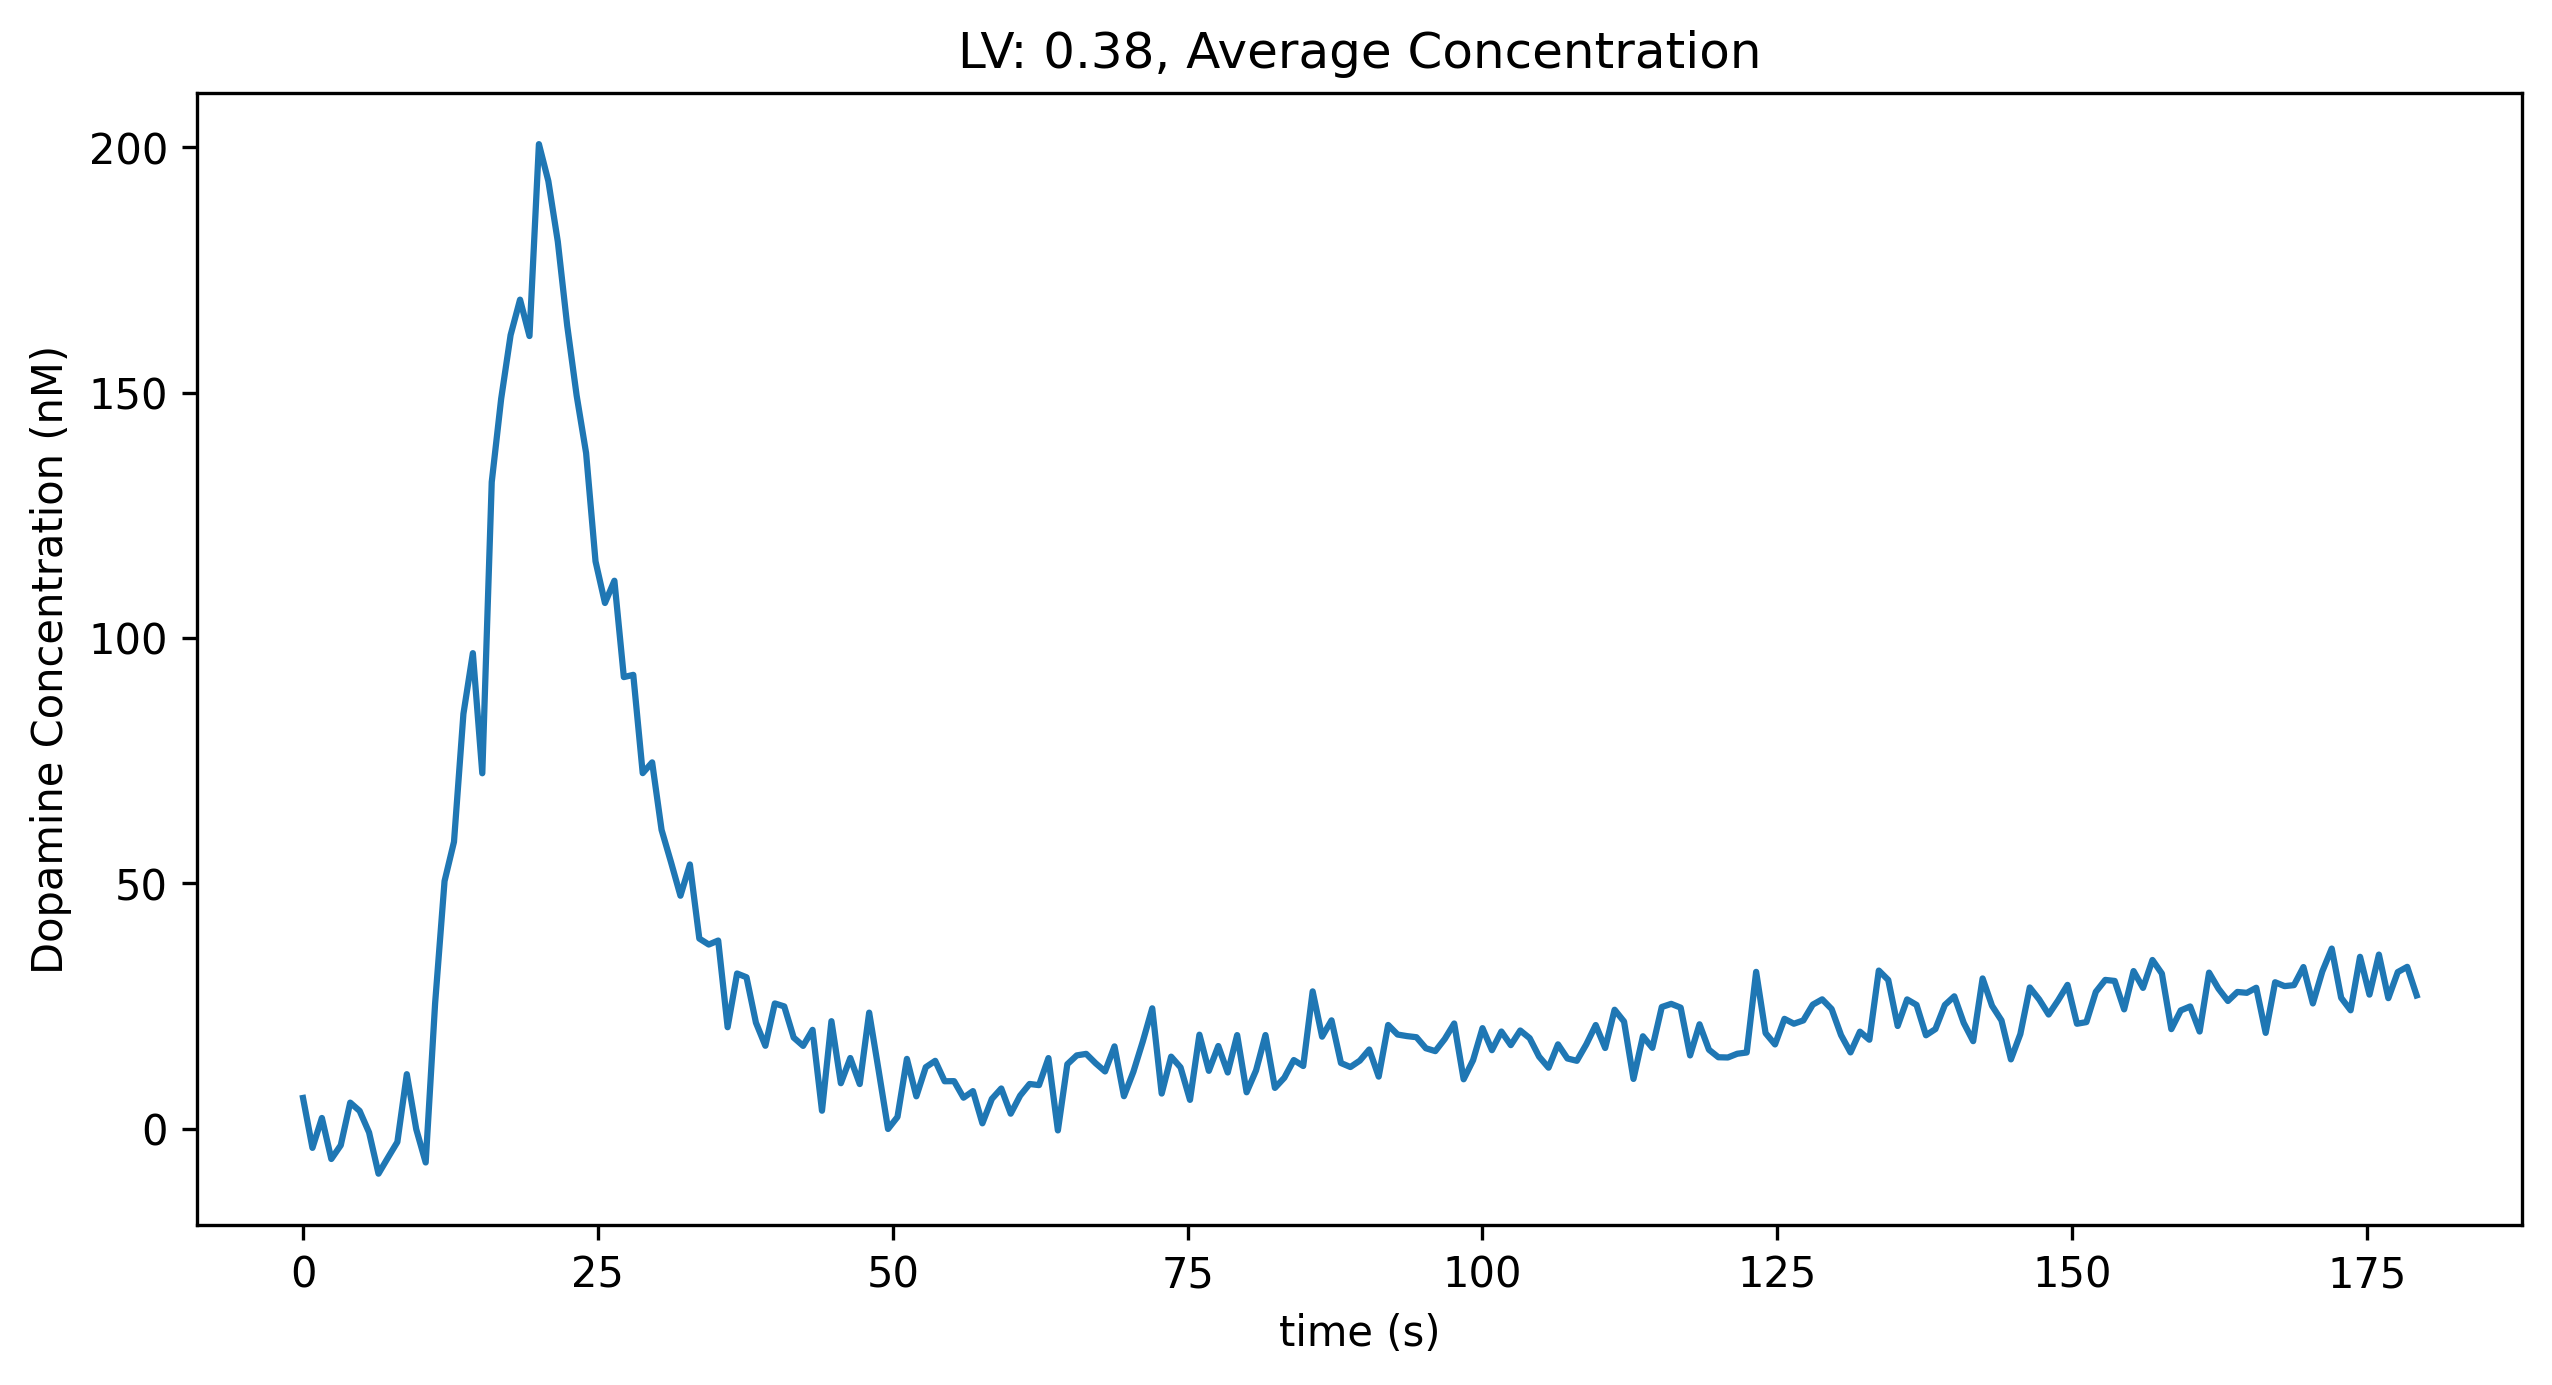

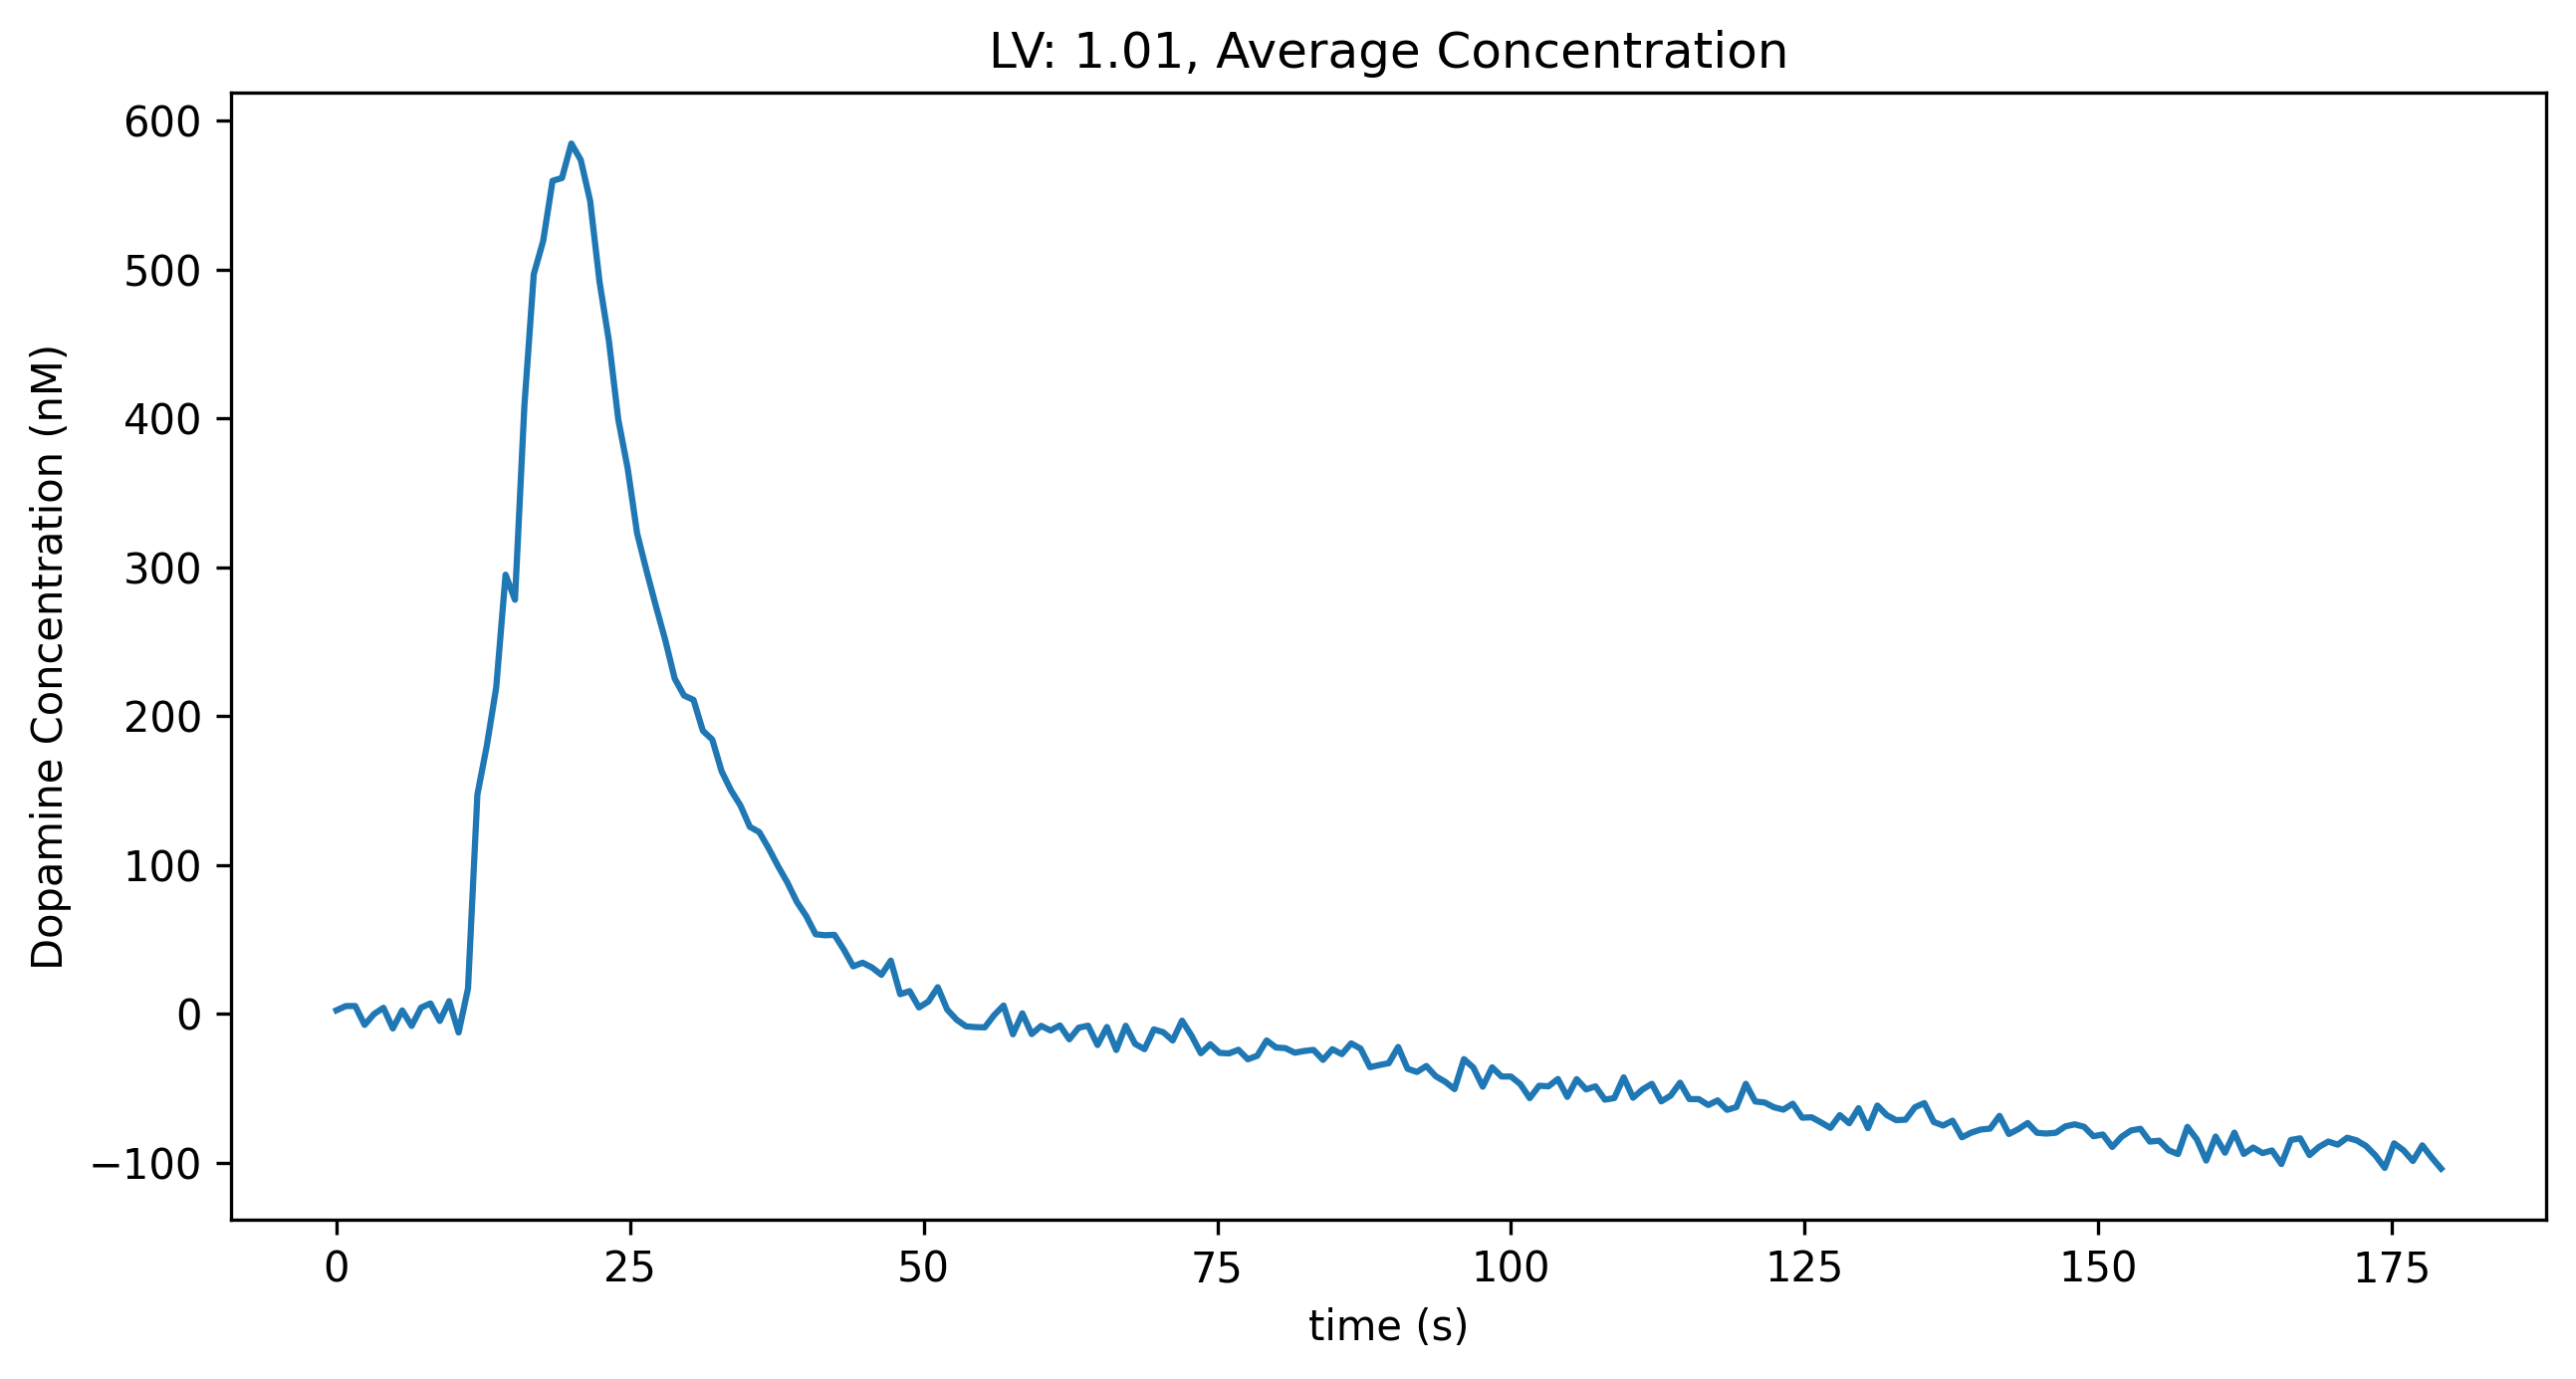

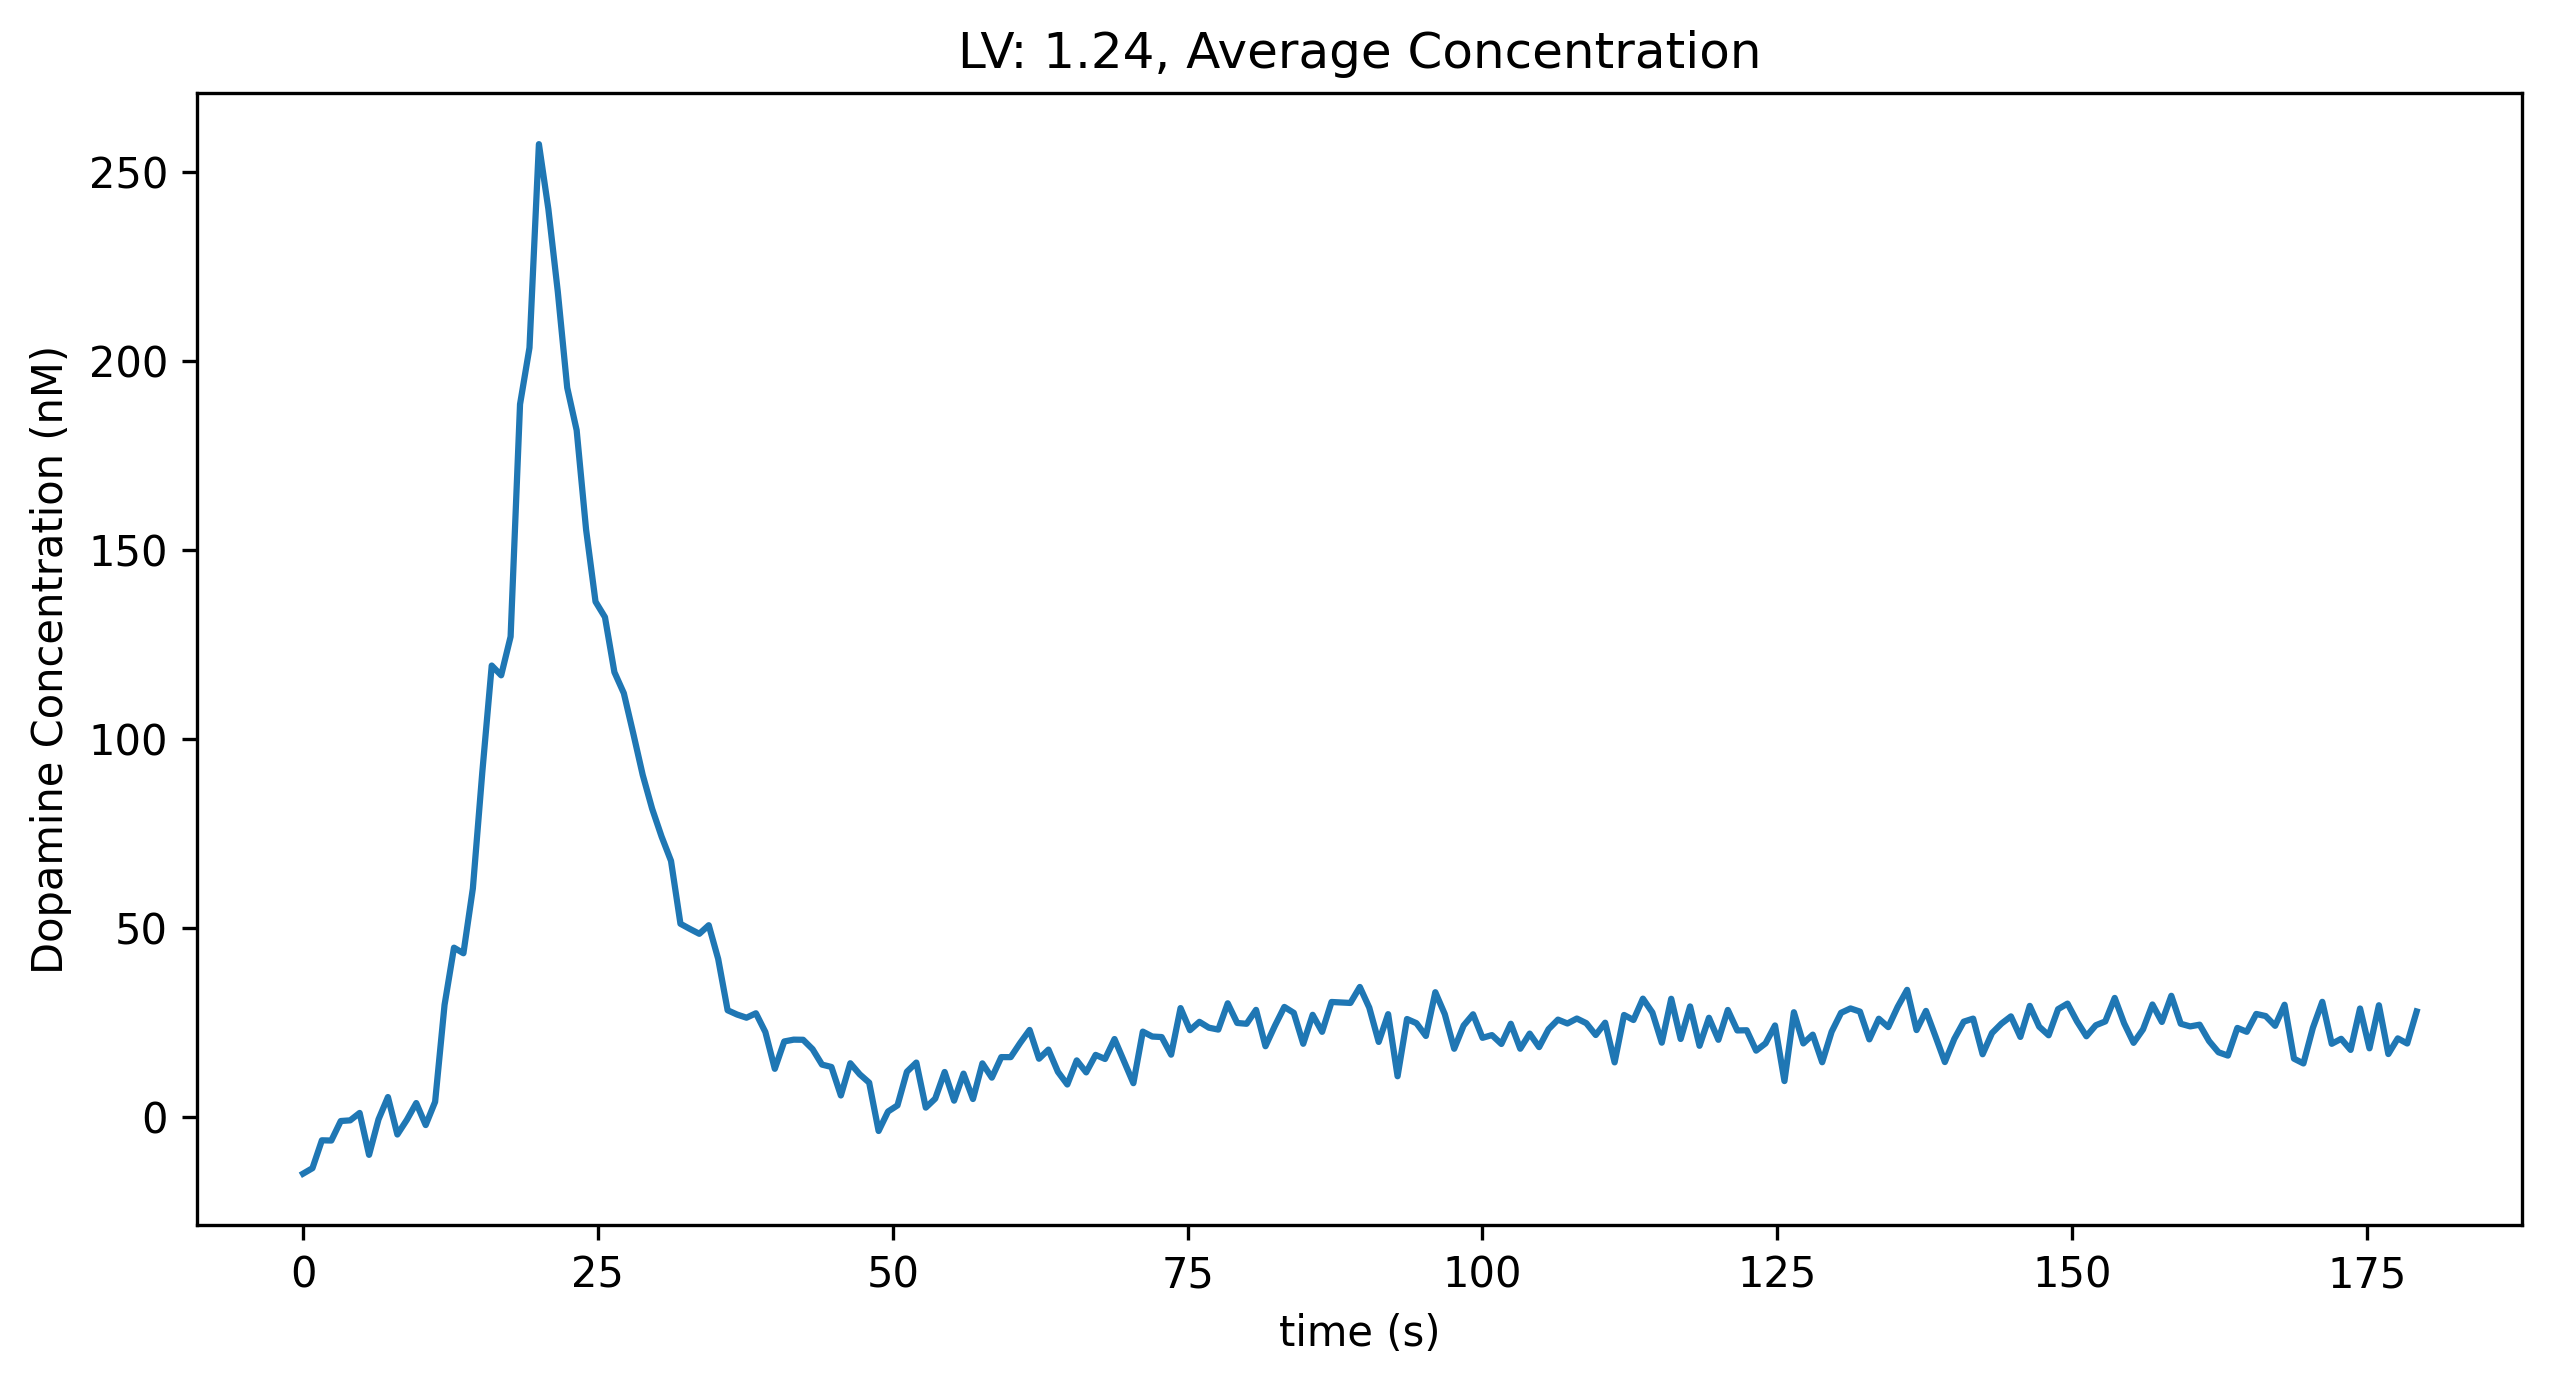

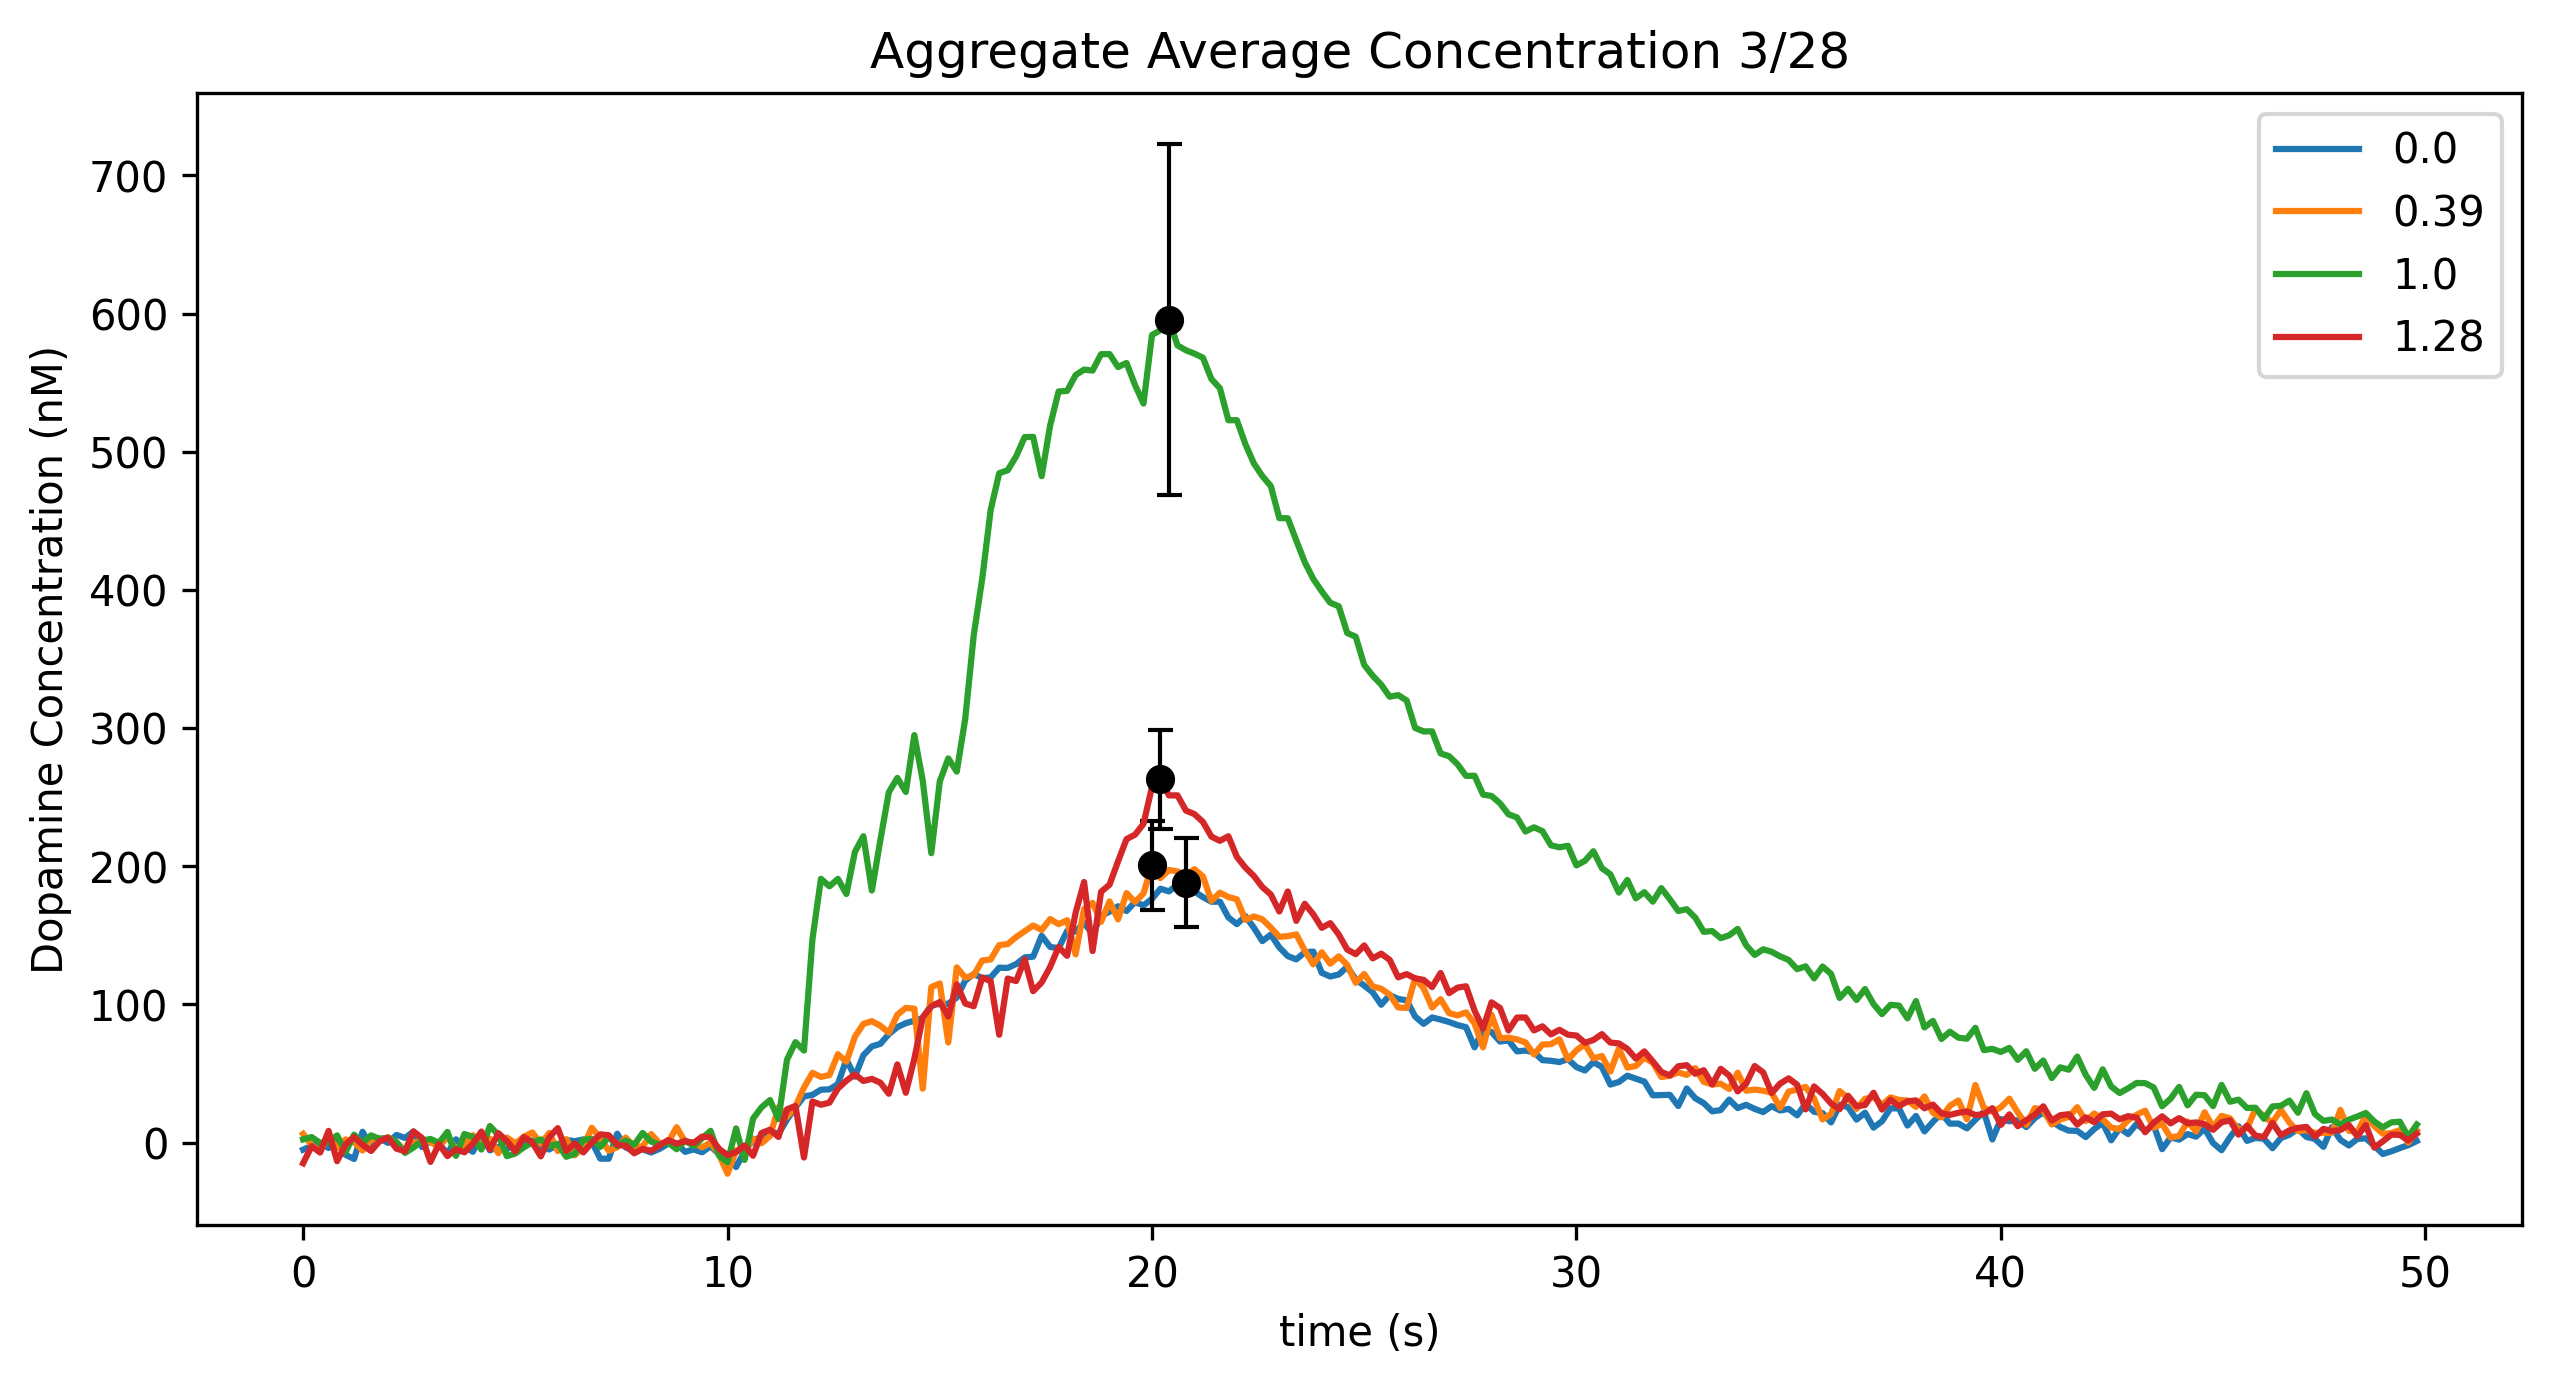

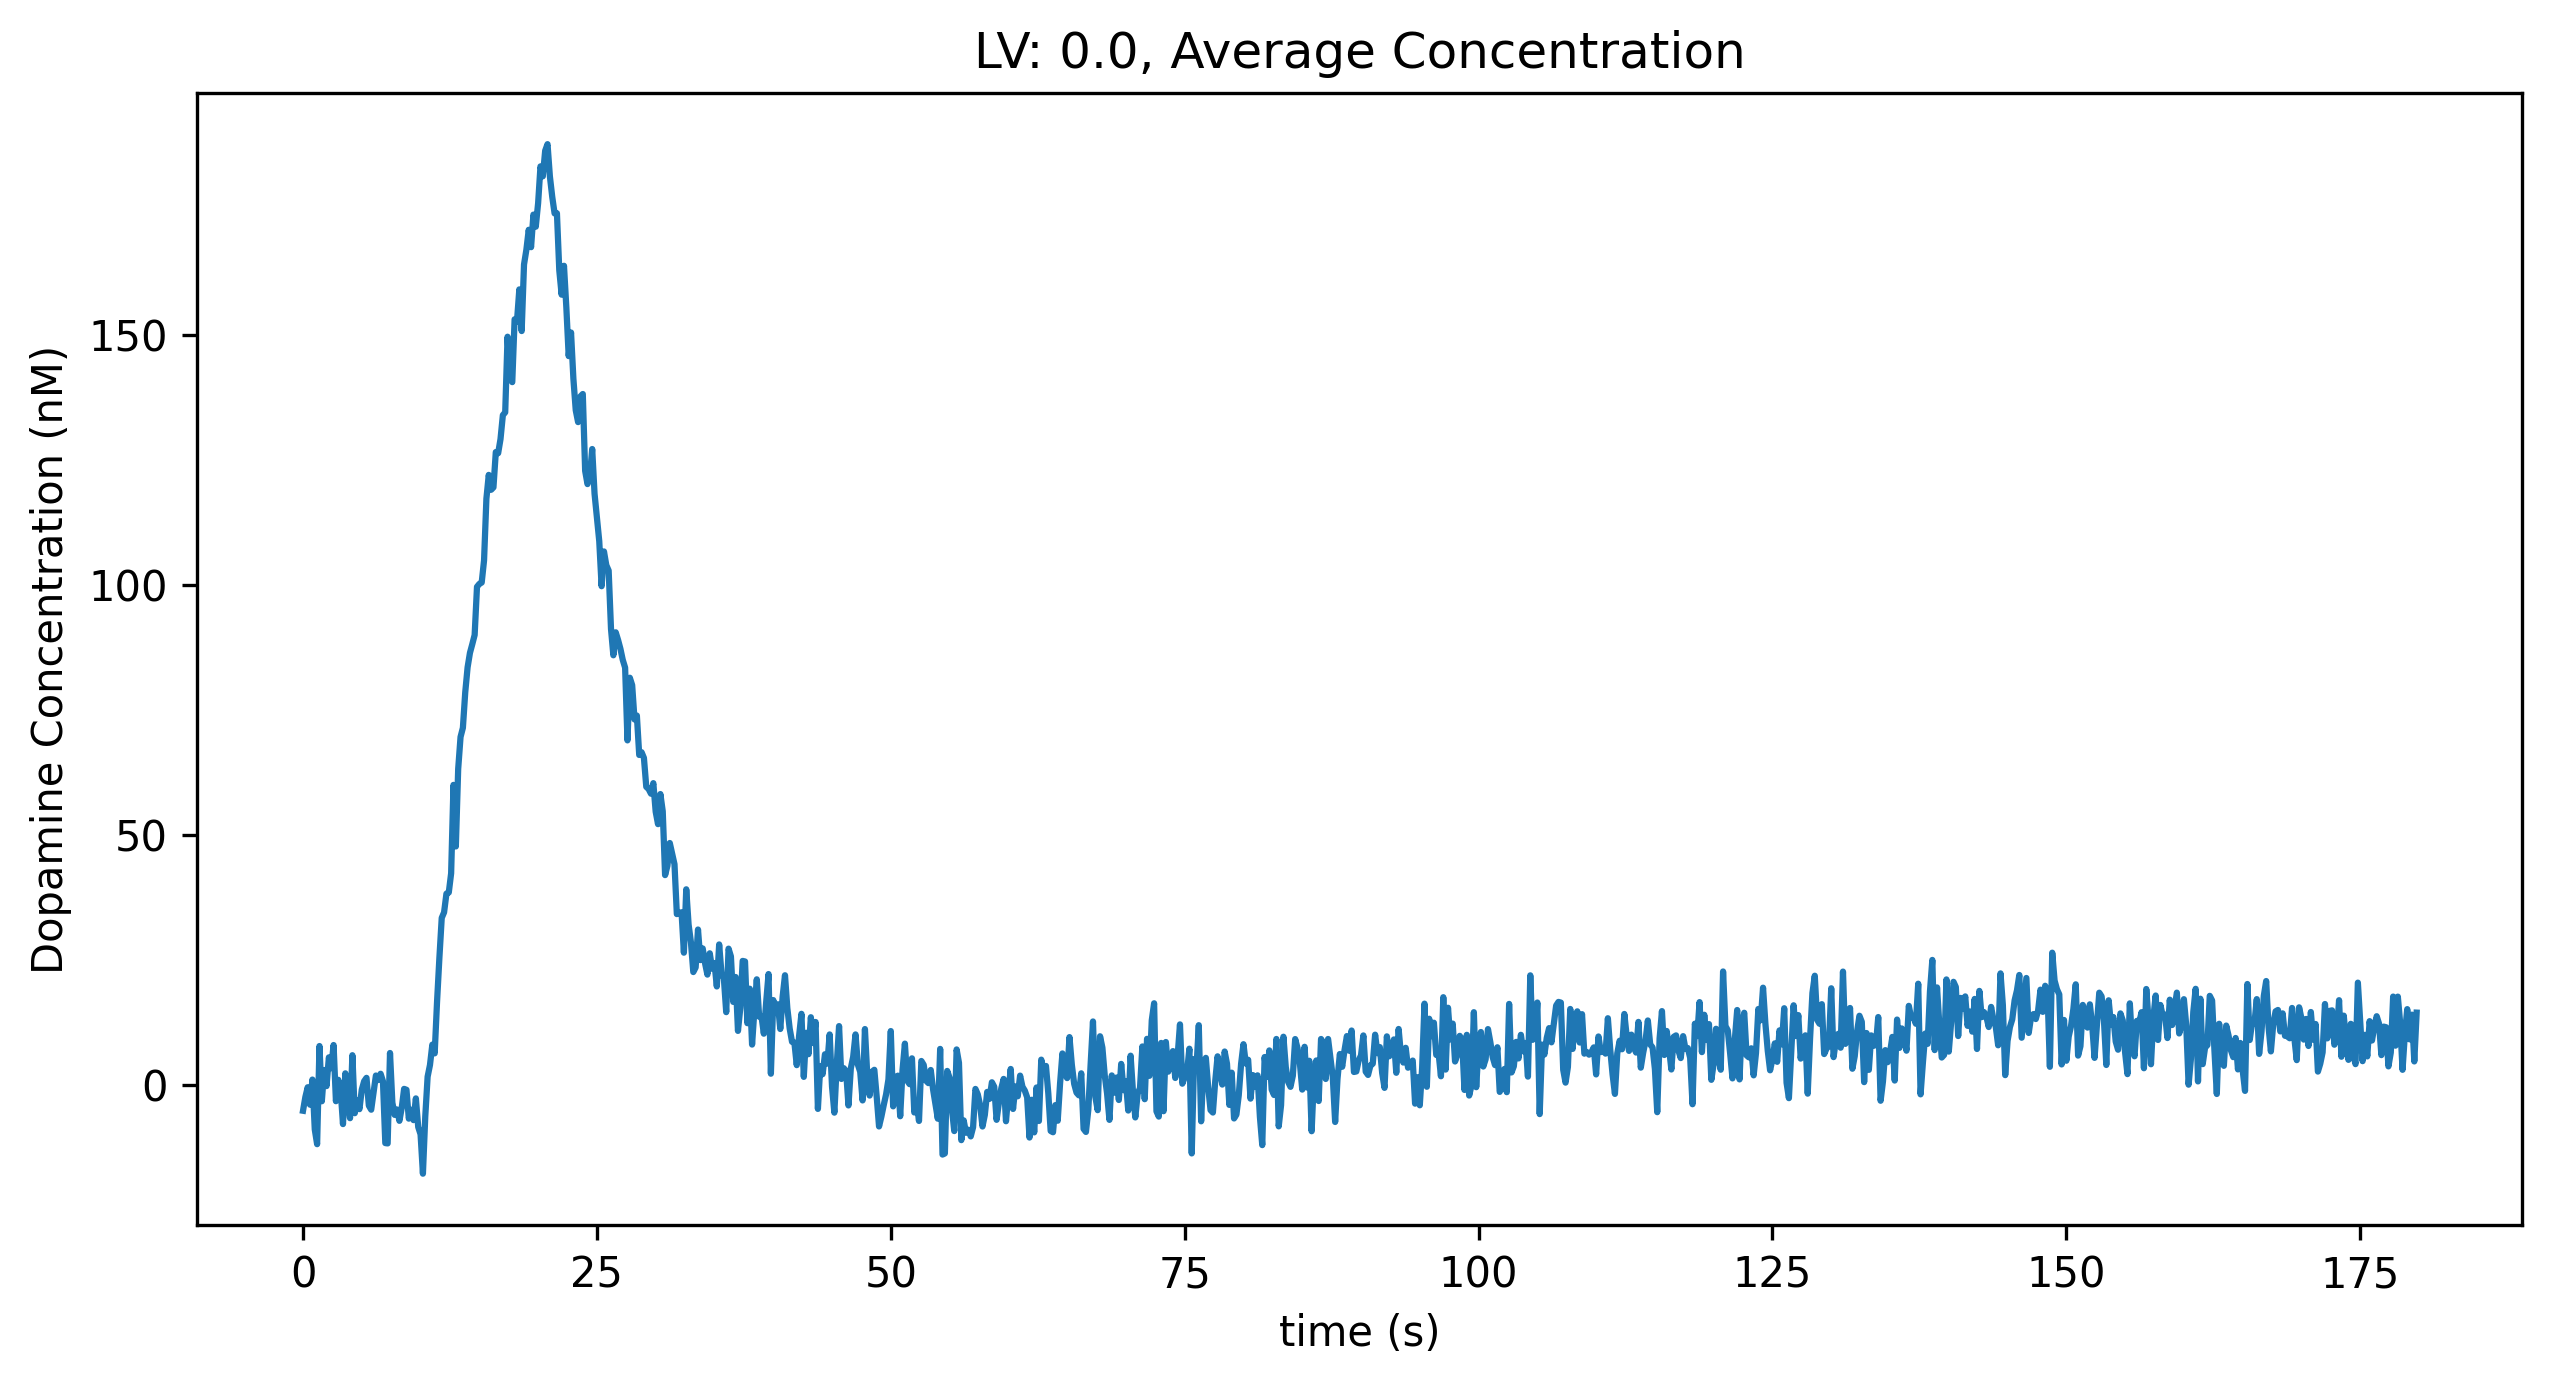

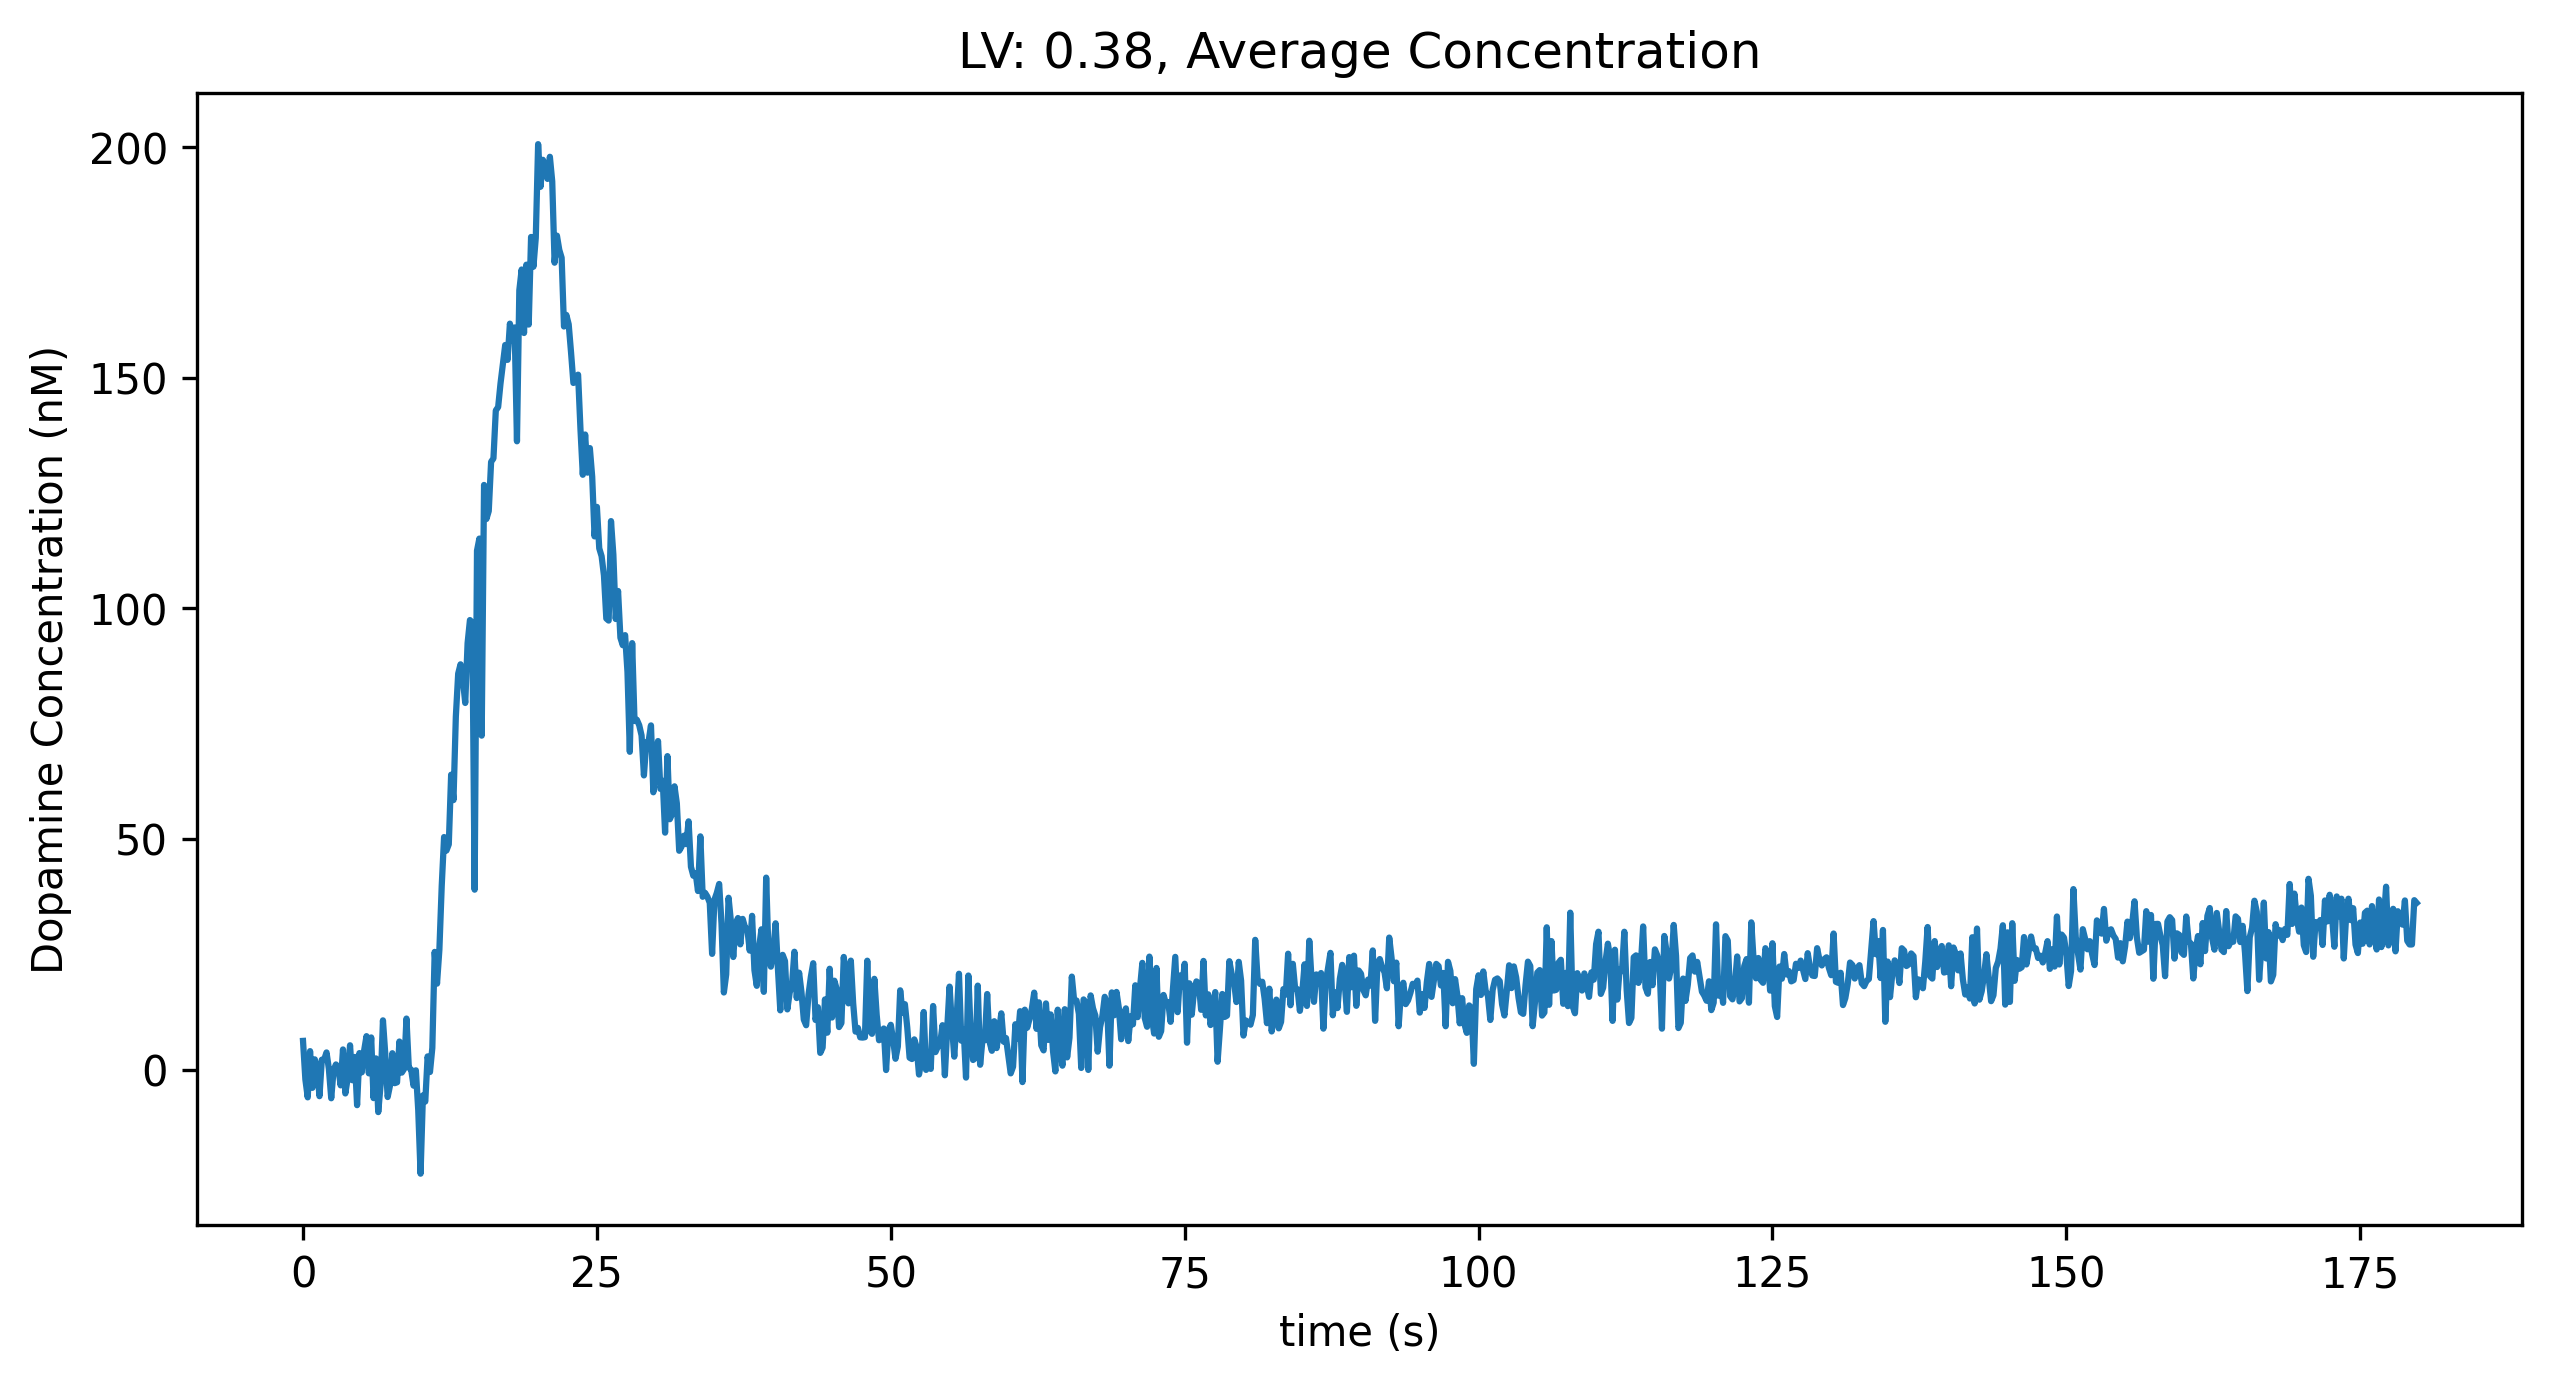

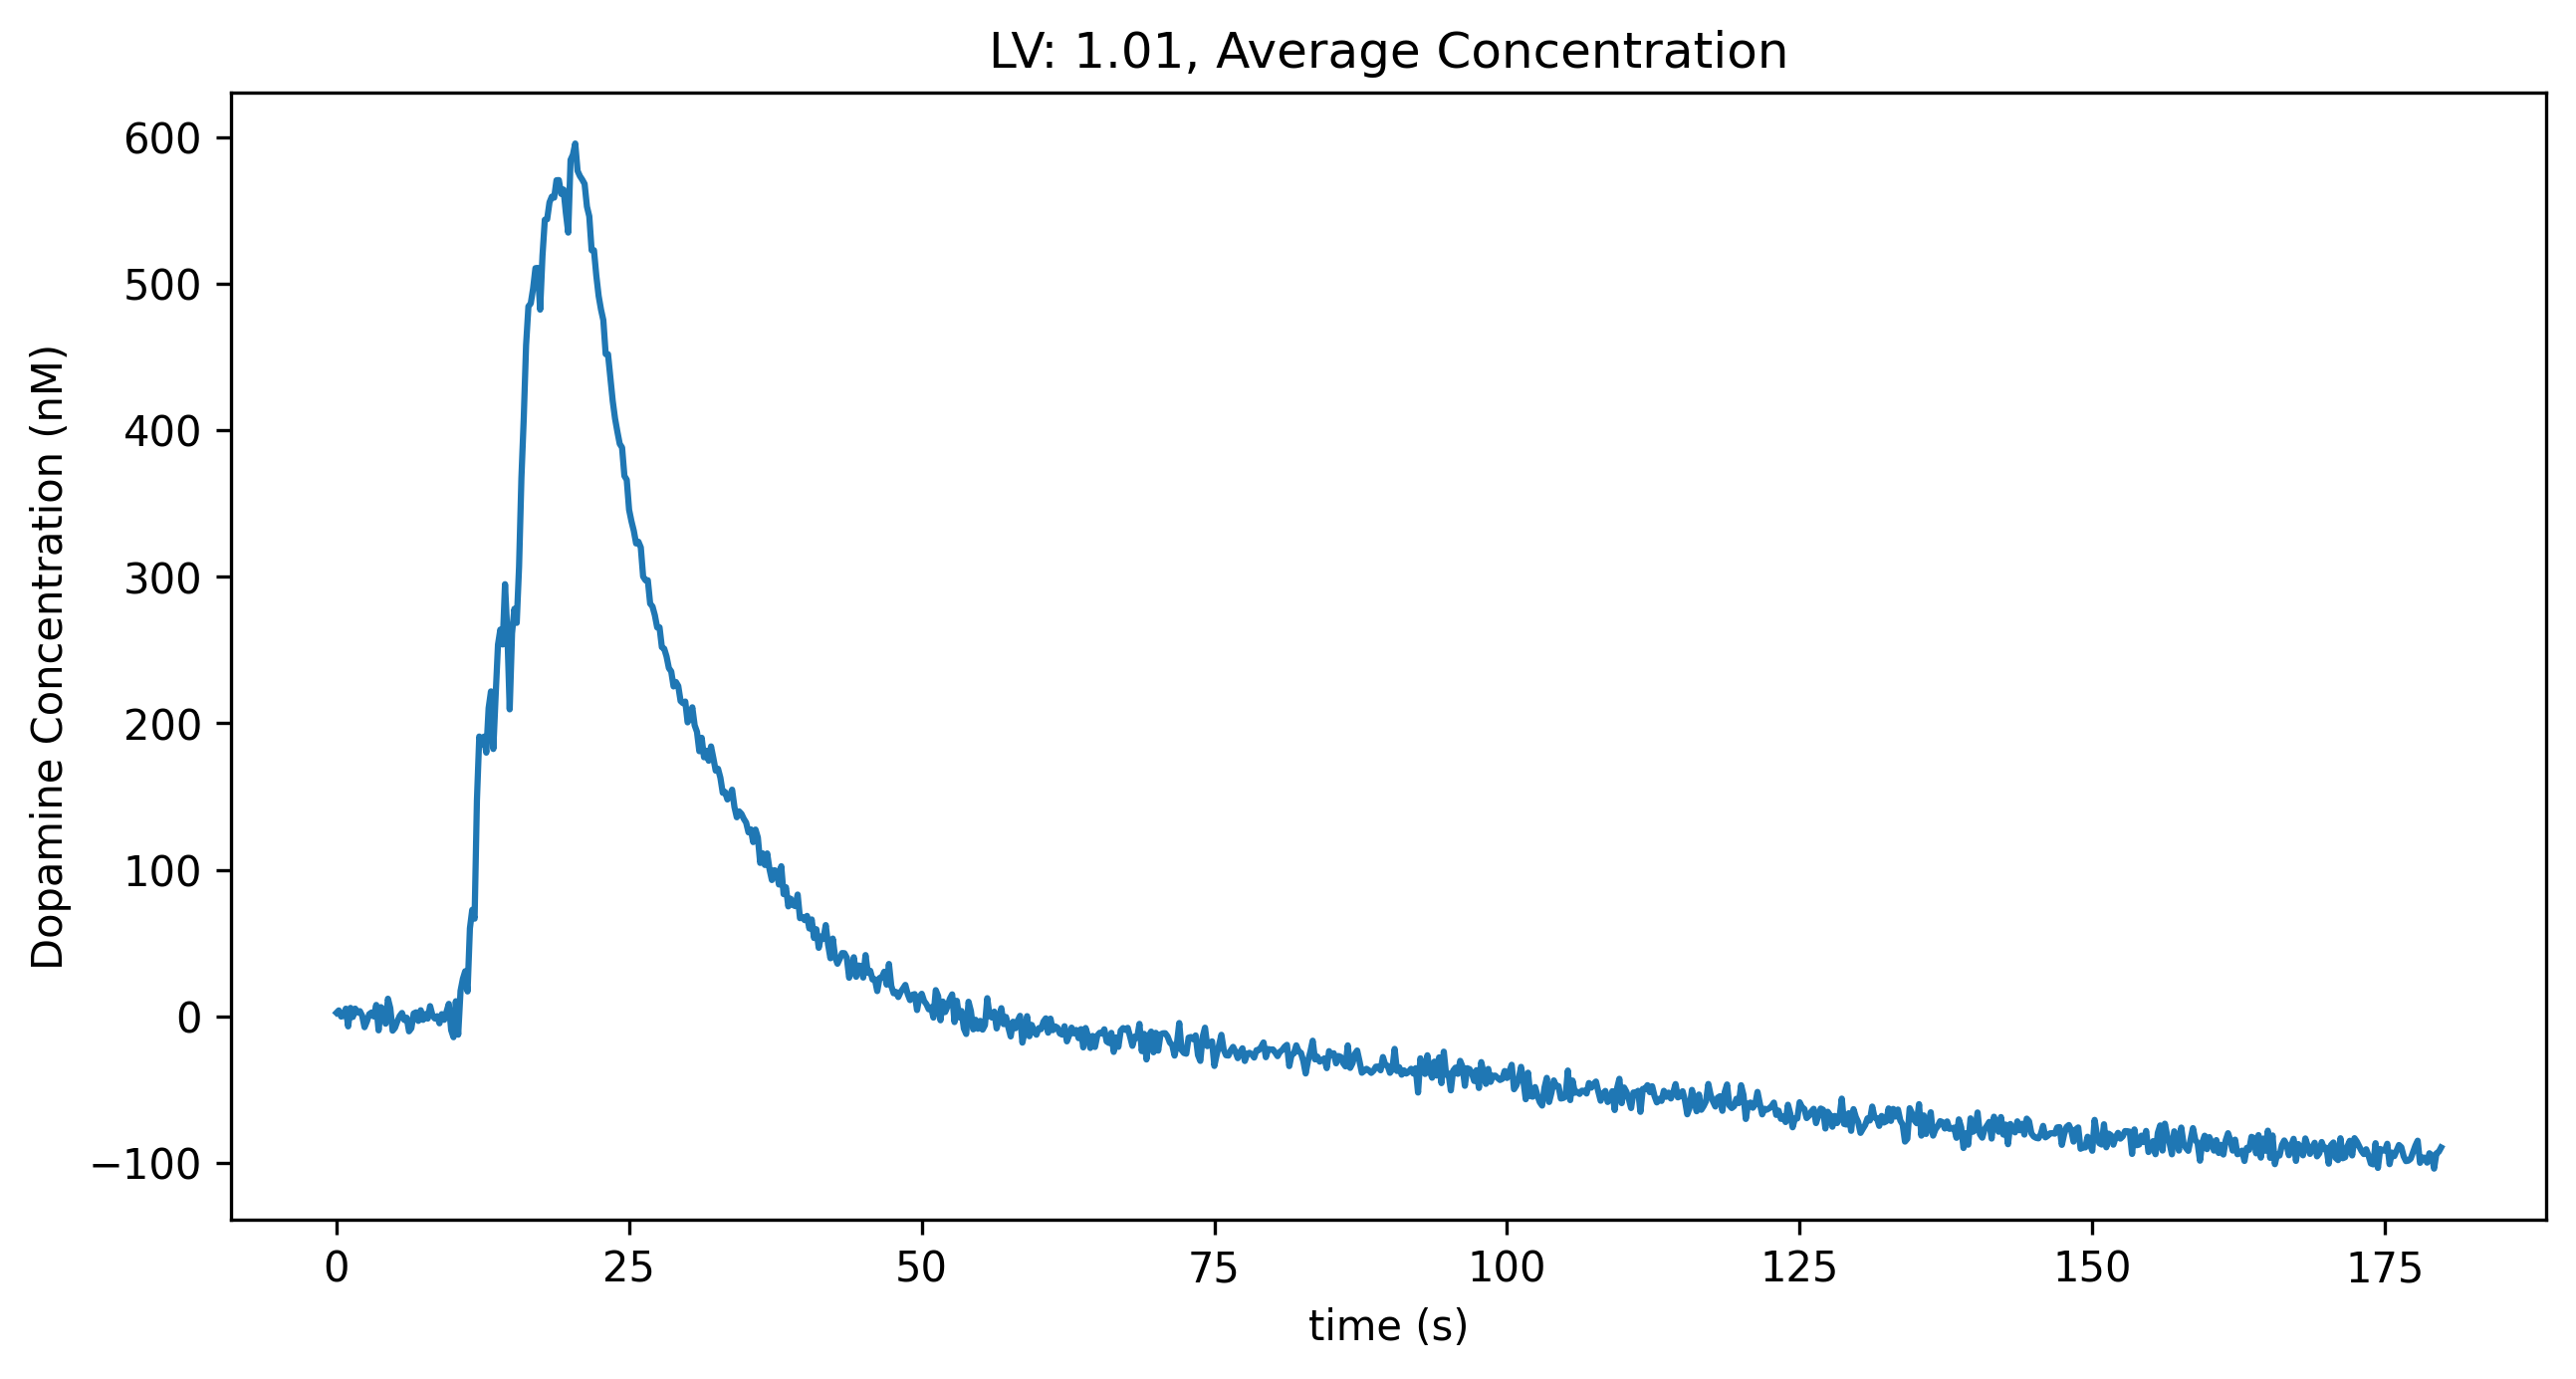

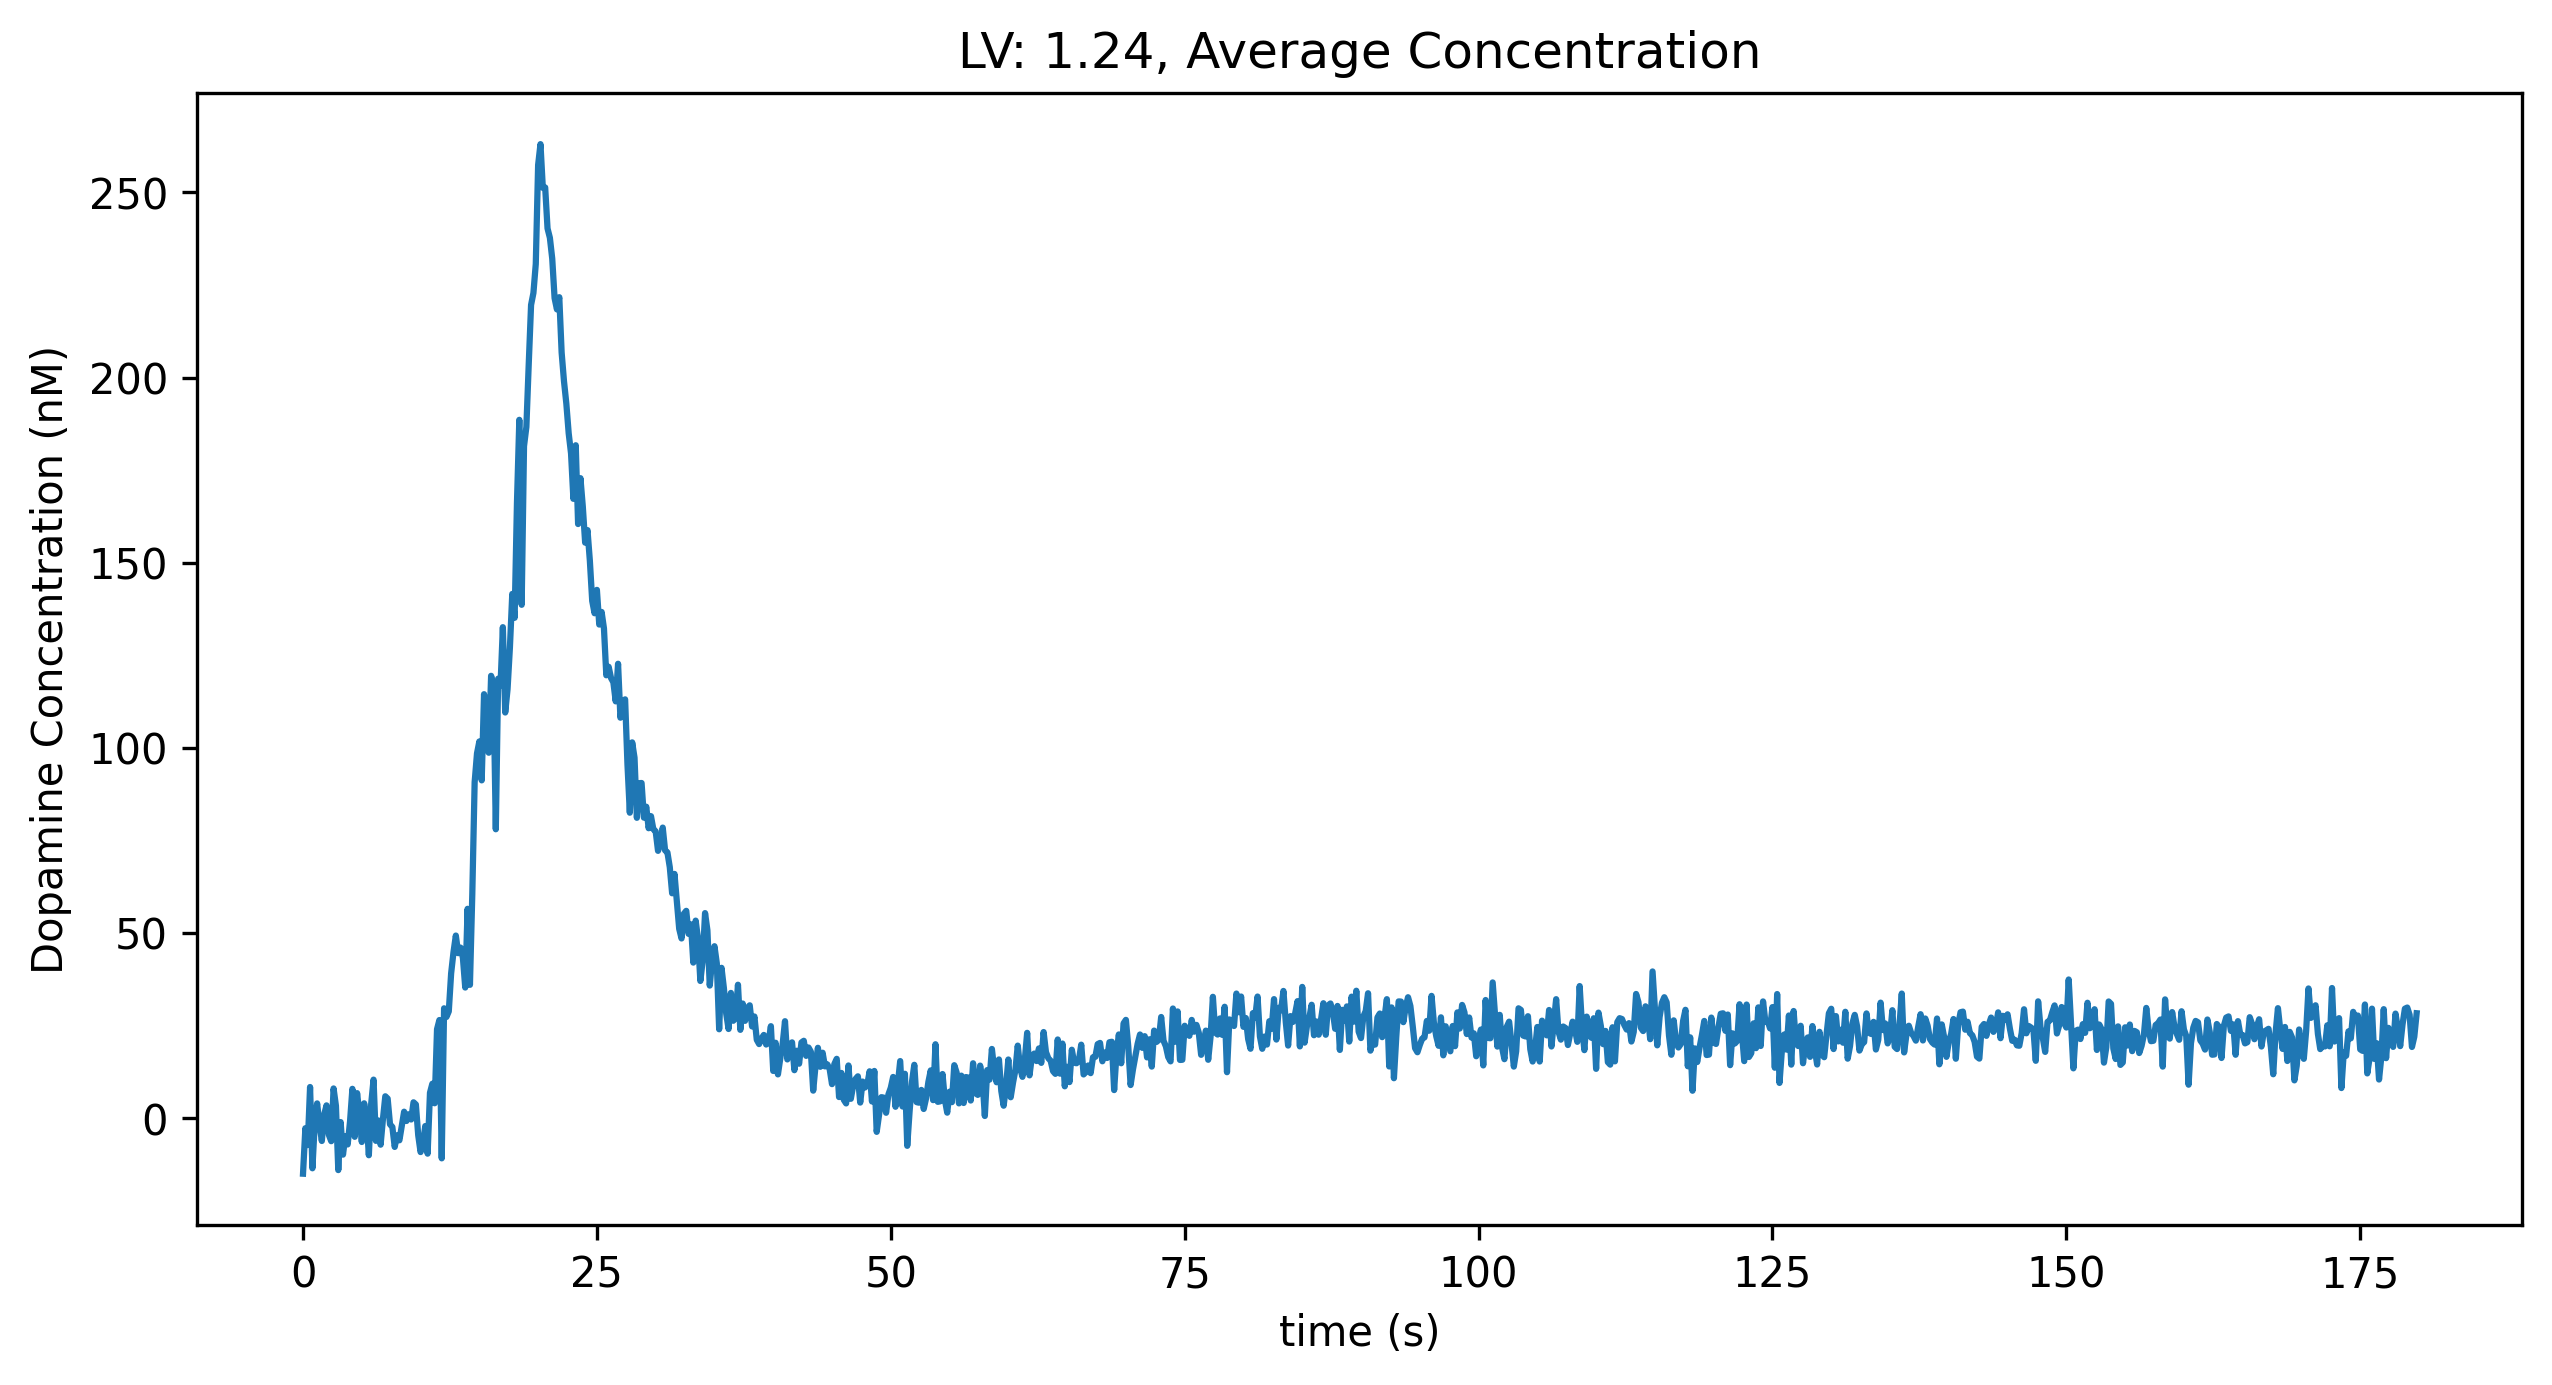

In [ ]:
#20HZ dop 5 trials per stim, 4 stims [0.00, 0.38, 1.01, 1.24]LV
Dop_20_328 = np.genfromtxt('./Experiment32822/20220328 data.csv', delimiter=',')[2:]
Dop_20_timing = Dop_20_328[:,0]
Dop_20_328 = Dop_20_328[:, 1:]
Dop_10_328 = np.genfromtxt('./Experiment32822/10_20220328 data.csv', delimiter=',')[2:]
Dop_10_timing = Dop_10_328[:,0]
Dop_10_328 = Dop_10_328[:, 1:]

DopAvg = []
for i in range(0, 4):
    x = np.zeros(len(Dop_10_328[:,i]))
    for j in range(0,5):
        x += Dop_10_328[:,i*5 + j]
    DopAvg.append(x/5)

tar = 4
time_compressed = []
t_c = []
errX_TOT = []
errY_TOT = []
for i in range(len(DopAvg)):
    time_comp_s = []
    #ER_xS = []
    #ER_S = []
    for j in range(len(DopAvg[i])):
        #if np.argmax(DopAvg[i] == j):
        #    ER_xS.append(Dop_20_timing[j])
        #    ER_S.append(DopAvg[i][j])
        if j%tar == 0:
            if len(t_c) < len(DopAvg[i])/tar:
                t_c.append(Dop_10_timing[j])
            time_comp_s.append(DopAvg[i][j])
       # if j%(10*tar) == 0:
           # ER_xS.append(Dop_20_timing[j])
           # ER_S.append(DopAvg[i][j])
    errX_TOT.append(np.argmax(DopAvg[i])/5)
    errY_TOT.append(np.max(DopAvg[i]))
    time_compressed.append(time_comp_s)
    
figure, graph = plt.subplots()


for i in range(len(time_compressed)):
    graph.plot(t_c, time_compressed[i])
    graph.set_title(f'Aggregate Average Concentration, 1x/sec')
    graph.set_xlabel('time (s)')
    graph.set_ylabel('Dopamine Concentration (nM)')
plt.legend(LV_20)
plt.show()


for i in range(len(time_compressed)):
    figure, graph = plt.subplots()
    graph.plot(t_c, time_compressed[i])
    graph.set_title(f'LV: {LV_20[i]}, Average Concentration')
    graph.set_xlabel('time (s)')
    graph.set_ylabel('Dopamine Concentration (nM)')
    plt.show()


figure, graph = plt.subplots()

for i in range(len(DopAvg)):
    graph.plot(Dop_10_timing[0:250], DopAvg[i][0:250])
    y_err = 2*np.std(DopAvg[i])/np.sqrt(5)
    graph.errorbar(errX_TOT[i], errY_TOT[i], yerr = y_err, color = 'black', ecolor = 'black', elinewidth = 1, fmt = 'o', capsize = 3, capthick = 1,  )
    #graph.errorbar(Dop_10_timing[0:250], DopAvg[i][0:250], errorevery = 50, yerr = y_err, elinewidth = 2, capsize = 3, capthick = 1,  )
    graph.set_title(f'Aggregate Average Concentration 3/28')
    graph.set_xlabel('time (s)')
    graph.set_ylabel('Dopamine Concentration (nM)')
plt.legend(LV_10)
plt.savefig('./Graphs_exp/3-28_10hz_max_SD.png', bbox_inches='tight')


plt.show()
    

for i in range(len(DopAvg)):
    figure, graph = plt.subplots()
    graph.plot(Dop_20_timing, DopAvg[i])
    graph.set_title(f'LV: {LV_20[i]}, Average Concentration')
    graph.set_xlabel('time (s)')
    graph.set_ylabel('Dopamine Concentration (nM)')
    plt.show()

In [ ]:
#error bars:

for i in range(len(Dop_20_timing)):
    graph.plot(Dop_20_timing, DopAvg[i])
    graph.set_title(f'Aggregate Average Concentration 3/28')
    graph.set_xlabel('time (s)')
    graph.set_ylabel('Dopamine Concentration (nM)')
plt.legend(LV_20)
plt.show()

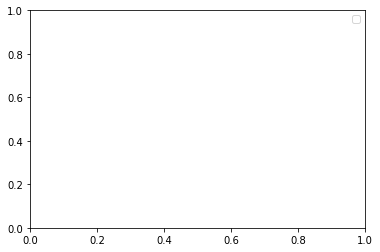

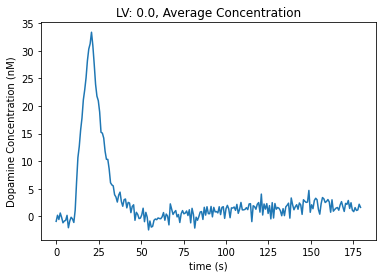

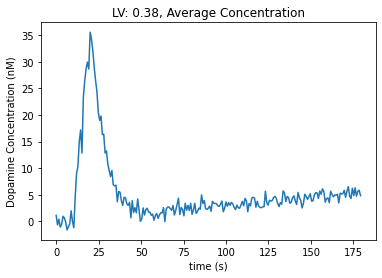

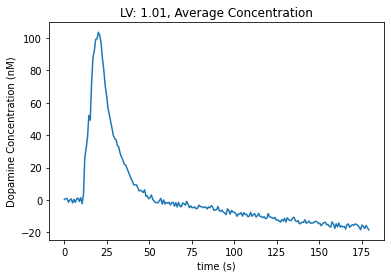

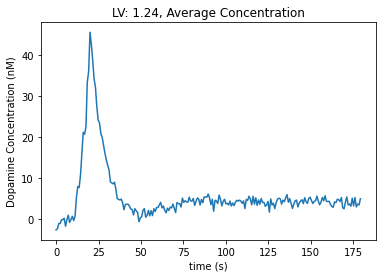

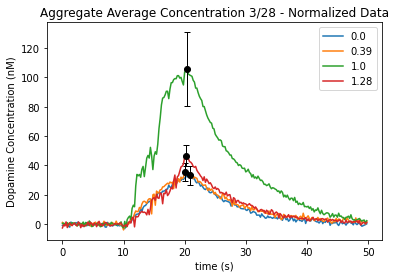

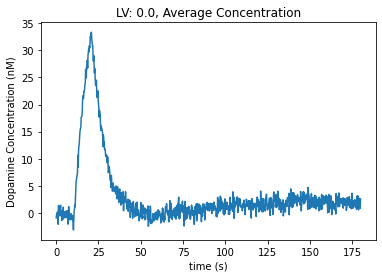

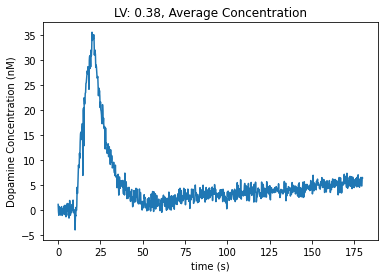

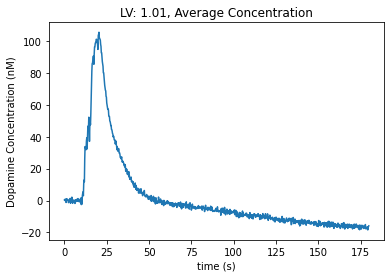

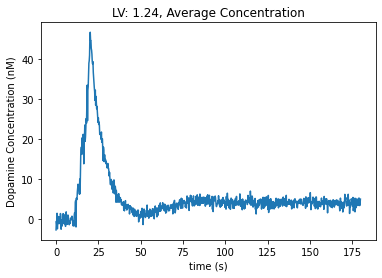

In [ ]:
#20HZ dop 5 trials per stim, 4 stims [0.00, 0.38, 1.01, 1.24]LV
Dop_20_328 = np.genfromtxt('./Experiment32822/20220328 data.csv', delimiter=',')[2:]
Dop_20_timing = Dop_20_328[:,0]
Dop_20_328 = Dop_20_328[:, 21:]
Dop_10_328 = np.genfromtxt('./Experiment32822/10_20220328 data.csv', delimiter=',')[2:]
Dop_10_timing = Dop_10_328[:,0]
Dop_10_328 = Dop_10_328[:, 21:]

DopAvg = []
for i in range(0, 4):
    x = np.zeros(len(Dop_10_328[:,i]))
    for j in range(0,5):
        x += Dop_10_328[:,i*5 + j]
    DopAvg.append(x/5)
    
tar = 4
time_compressed = []
t_c = []
errX_TOT = []
errY_TOT = []
for i in range(len(DopAvg)):
    time_comp_s = []
    #ER_xS = []
    #ER_S = []
    for j in range(len(DopAvg[i])):
        #if np.argmax(DopAvg[i] == j):
        #    ER_xS.append(Dop_20_timing[j])
        #    ER_S.append(DopAvg[i][j])
        if j%tar == 0:
            if len(t_c) < len(DopAvg[i])/tar:
                t_c.append(Dop_10_timing[j])
            time_comp_s.append(DopAvg[i][j])
       # if j%(10*tar) == 0:
           # ER_xS.append(Dop_20_timing[j])
           # ER_S.append(DopAvg[i][j])
    errX_TOT.append(np.argmax(DopAvg[i])/5)
    errY_TOT.append(np.max(DopAvg[i]))
    time_compressed.append(time_comp_s)
    

for i in range(len(time_compressed)):
    graph.plot(t_c, time_compressed[i])
    graph.set_title(f'Aggregate Average Concentration, 1x/sec')
    graph.set_xlabel('time (s)')
    graph.set_ylabel('Dopamine Concentration (nM)')
plt.legend(LV_20)
plt.show()


for i in range(len(time_compressed)):
    figure, graph = plt.subplots()
    graph.plot(t_c, time_compressed[i])
    graph.set_title(f'LV: {LV_20[i]}, Average Concentration')
    graph.set_xlabel('time (s)')
    graph.set_ylabel('Dopamine Concentration (nM)')
    plt.show()


figure, graph = plt.subplots()

for i in range(len(DopAvg)):
    graph.plot(Dop_10_timing[0:250], DopAvg[i][0:250])
    y_err = np.std(DopAvg[i])
    graph.errorbar(errX_TOT[i], errY_TOT[i], yerr = y_err, color = 'black', ecolor = 'black', elinewidth = 1, fmt = 'o', capsize = 3, capthick = 1,  )
    #graph.errorbar(Dop_20_timing[0:250], DopAvg[i][0:250], errorevery = 50, yerr = y_err, elinewidth = 2, capsize = 3, capthick = 1,  )
    graph.set_title(f'Aggregate Average Concentration 3/28 - Normalized Data')
    graph.set_xlabel('time (s)')
    graph.set_ylabel('Dopamine Concentration (nM)')
plt.legend(LV_10)
plt.savefig('./Graphs_exp/3-28_10Hz_Normalized_max_SD.png', bbox_inches='tight')
plt.show()

for i in range(len(DopAvg)):
    figure, graph = plt.subplots()
    graph.plot(Dop_20_timing, DopAvg[i])
    graph.set_title(f'LV: {LV_20[i]}, Average Concentration')
    graph.set_xlabel('time (s)')
    graph.set_ylabel('Dopamine Concentration (nM)')
    plt.show()

# Experiment 3/18 with and without normalization

[[  1.      2.      3.    ...   3.      4.      5.   ]
 [-31.1    -1.4    -2.24  ...  -0.923  -0.288  -0.452]
 [ 10.7    13.4   -25.1   ...  -0.333  -0.11   -0.837]
 ...
 [-64.2   -15.2   -12.1   ...  -2.81   -1.2    -0.454]
 [-53.    -29.5   -16.4   ...  -3.64   -0.796  -0.322]
 [-67.1   -24.8   -13.5   ...  -3.32   -1.8    -0.429]]
138.0


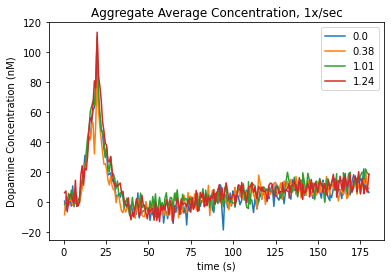

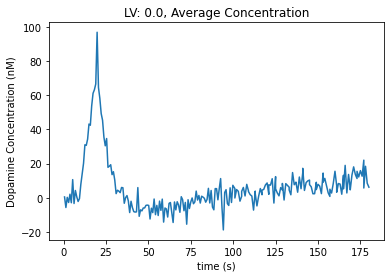

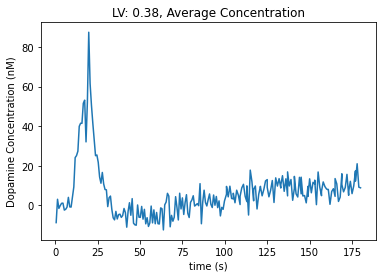

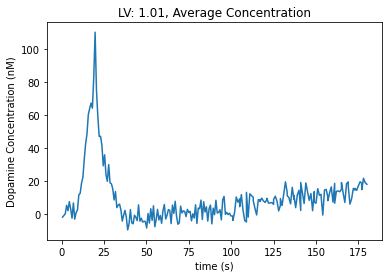

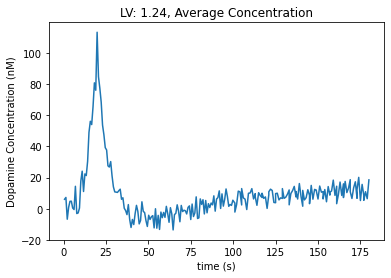

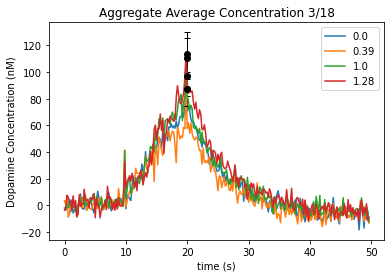

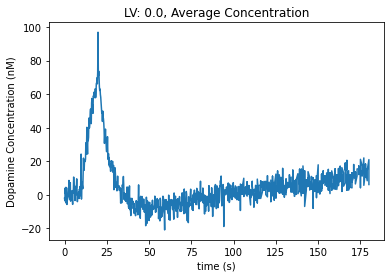

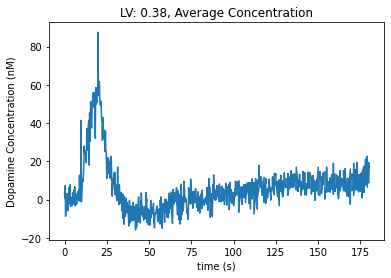

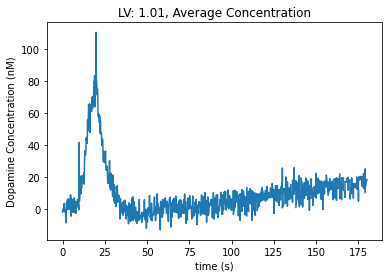

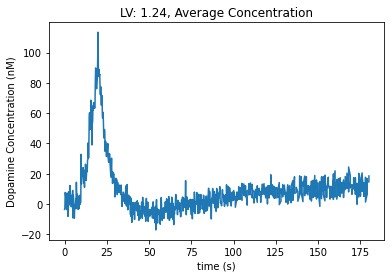

In [ ]:
#20HZ dop 5 trials per stim, 4 stims [0.00, 0.38, 1.01, 1.24] LV
Dop_20_318 = np.genfromtxt('./Experiment31822/20220318 data.csv', delimiter=',')[2:]
Dop_20_timing = Dop_20_318[:,0]
Dop_20_318 = Dop_20_318[:, 1:]
print(Dop_20_318)
Dop_10_318 = np.genfromtxt('./Experiment31822/10_20220318 data.csv', delimiter=',')[2:]
Dop_10_timing = Dop_10_318[:,0]
Dop_10_318 = Dop_10_318[:, 1:]

print(max(Dop_10_318[:, 10]))
DopAvg = []
for i in range(0, 4):
    x = np.zeros(len(Dop_10_318[:,i]))
    for j in range(0,5):
        x += Dop_10_318[:,i*5 + j]
    DopAvg.append(x/5)

tar = 4
time_compressed = []
t_c = []
errX_TOT = []
errY_TOT = []
for i in range(len(DopAvg)):
    time_comp_s = []
    #ER_xS = []
    #ER_S = []
    for j in range(len(DopAvg[i])):
        #if np.argmax(DopAvg[i] == j):
        #    ER_xS.append(Dop_20_timing[j])
        #    ER_S.append(DopAvg[i][j])
        if j%tar == 0:
            if len(t_c) < len(DopAvg[i])/tar:
                t_c.append(Dop_10_timing[j])
            time_comp_s.append(DopAvg[i][j])
       # if j%(10*tar) == 0:
           # ER_xS.append(Dop_20_timing[j])
           # ER_S.append(DopAvg[i][j])
    errX_TOT.append(np.argmax(DopAvg[i])/5)
    errY_TOT.append(np.max(DopAvg[i]))
    time_compressed.append(time_comp_s)
    
        
figure, graph = plt.subplots()


for i in range(len(time_compressed)):
    graph.plot(t_c, time_compressed[i])
    graph.set_title(f'Aggregate Average Concentration, 1x/sec')
    graph.set_xlabel('time (s)')
    graph.set_ylabel('Dopamine Concentration (nM)')
plt.legend(LV_20)
plt.show()


for i in range(len(time_compressed)):
    figure, graph = plt.subplots()
    graph.plot(t_c, time_compressed[i])
    graph.set_title(f'LV: {LV_20[i]}, Average Concentration')
    graph.set_xlabel('time (s)')
    graph.set_ylabel('Dopamine Concentration (nM)')
    plt.show()


figure, graph = plt.subplots()

for i in range(len(DopAvg)):
    graph.plot(Dop_10_timing[0:250], DopAvg[i][0:250])
    y_err = 2*np.std(DopAvg[i])/np.sqrt(5)
    graph.errorbar(errX_TOT[i], errY_TOT[i], yerr = y_err, color = 'black', ecolor = 'black', elinewidth = 1, fmt = 'o', capsize = 3, capthick = 1,  )
    #graph.errorbar(Dop_20_timing[0:250], DopAvg[i][0:250], errorevery = 50, yerr = y_err, elinewidth = 2, capsize = 3, capthick = 1,  )
    graph.set_title(f'Aggregate Average Concentration 3/18')
    graph.set_xlabel('time (s)')
    graph.set_ylabel('Dopamine Concentration (nM)')
plt.legend(LV_10)
plt.savefig('./Graphs_exp/3-18_10hz_max_95percent.png', bbox_inches='tight')
plt.show()
    

for i in range(len(DopAvg)):
    figure, graph = plt.subplots()
    graph.plot(Dop_20_timing, DopAvg[i])
    graph.set_title(f'LV: {LV_20[i]}, Average Concentration')
    graph.set_xlabel('time (s)')
    graph.set_ylabel('Dopamine Concentration (nM)')
    plt.show()